In [2]:
from importlib import reload # to reload modules
import numpy as np # NumPy
import matplotlib.pylab as plt # Matplotlib plots
import matplotlib.patches as mpatches
import matplotlib.patheffects as path_effects
from matplotlib.patches import Rectangle
import matplotlib.colors as colors
import mpl_scatter_density  # density scatter plots
import pandas as pd # Pandas
import pickle
import logging
from IPython.display import Image, SVG

import os # read directories etc.
from scipy.optimize import curve_fit
from scipy.stats import chisquare, goodness_of_fit, skew, skewtest

# import pylandau  # Landau Gaussian convolution

# from importlib import reload # to reload modules
# import modules.LoadBatch
# reload(modules.LoadBatch)
from modules.LoadBatch import *
from modules.SensorClasses import Batch, Sensor, Oscilloscope
from modules.SingleBatch import analysis_batch

### All the steps of the analysis put together and logically sequenced

In [3]:
### set logs level
logging.basicConfig(level=logging.INFO, format='[%(levelname)s] -\t %(message)s')

# Generic bins options, Batches import
the Batch objects are created by "logbook reader", it reads the .csv containing all the information about the batches (temperature, runs, angles, sensors etc.). Next I put all of the Batches into a dictionary for easier access

In [4]:
### Load the dictionary of sensor names and runs
# dict_of_batches = read_pickle("./files/dict_of_batches.pickle")
with open("./files/dict_of_batches.pickle", 'rb') as f:
    dict_of_batches = pickle.load(f)

logging.info(f"dictionary of the batches: \n{dict_of_batches.keys()}")

[INFO] -	 dictionary of the batches: 
dict_keys([199, 100, 101, 201, 202, 203, 301, 401, 402, 403, 204, 406, 407, 408, 409, 410, 411, 205, 206, 413, 414, 501, 502, 504, 505, 601, 602, 603, 604, 605, 701, 702, 801, 802, 901, 902, 1001, 1002, 1101, 1102, 1201, 1202, 5031, 5032])


# Plot a single batch 
and a single oscilloscope

In [5]:
### show all information about the batch
this_batch = 401
S = 'S1'
### save into more detailed analysis instead of presentation
pres_path = f"/home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/{this_batch}/detailed_analysis/"
if not os.path.exists(pres_path):
    os.mkdir(pres_path)
    
### use this directory instead: presentation path
# pres_path = '/home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/Presentations/2024-04-03 HGTD TestBeam meeting'
print("SAVE directory:", pres_path)

display(dict_of_batches[this_batch].__dict__)

### show all informations about each sensor
temp_dict = {}
for ch, sensor in dict_of_batches[this_batch].S[S].channels.items():
#     print(f"{S}, {ch}:", sensor.__dict__)
    temp_dict[(S,ch)] = sensor.__dict__
temp_df = pd.DataFrame(temp_dict)

display(temp_df)

SAVE directory: /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/401/detailed_analysis/


{'batch_number': 401,
 'angle': 0.0,
 'humidity': 0.0,
 'temperature': -30.555555555555557,
 'S': {'S1': <modules.SensorClasses.Oscilloscope at 0x7f3dff4ce4d0>,
  'S2': <modules.SensorClasses.Oscilloscope at 0x7f3dff4ce8f0>}}

S1                                                      
                     Ch1               Ch2               Ch3               Ch4
name                 MCP  USTC2.1-W17-P6-A  USTC2.1-W17-P6-A  IMEv3-W12-C3-1-4
board           no_board            CERN-3            CERN-3            CERN-1
dut_position         5.0               3.0               3.0                 1
fluence                0                 0                 0                 0
transimpedance        -1              4700              4700              4700
voltage             2500               -80               -80               -80
current         0.000069               0.0               0.0          0.000003

## Load the batch
set general variables for the whole batch

In [6]:
SAVE = False

colormap = ['k','b','g','r']
threshold_charge = 4 #fC
DUTs = (3,)
### print all of the DUTs in a string ("1-2-3")
duts_string = "-".join(str(dut) for dut in DUTs)
print("DUTs:", duts_string, "Batch: ", this_batch)

df = load_batch(this_batch,S)
print(f'MCP: {dict_of_batches[this_batch].S[S].channels["Ch1"].voltage} V, angle: {dict_of_batches[this_batch].angle}°', 'temperature:%.2f°C'%dict_of_batches[this_batch].temperature)

# these_bins = bins1
these_bins = bins_dict[this_batch]
time_bins = 5000
charge_bins = 500

use_for_geometry_cut = 'pulseheight'#'time'


[INFO] -	 Loading batch 401 	 Oscilloscope S1


DUTs: 3 Batch:  401
MCP: 2500 V, angle: 0.0° temperature:-30.56°C


## 2D Tracks

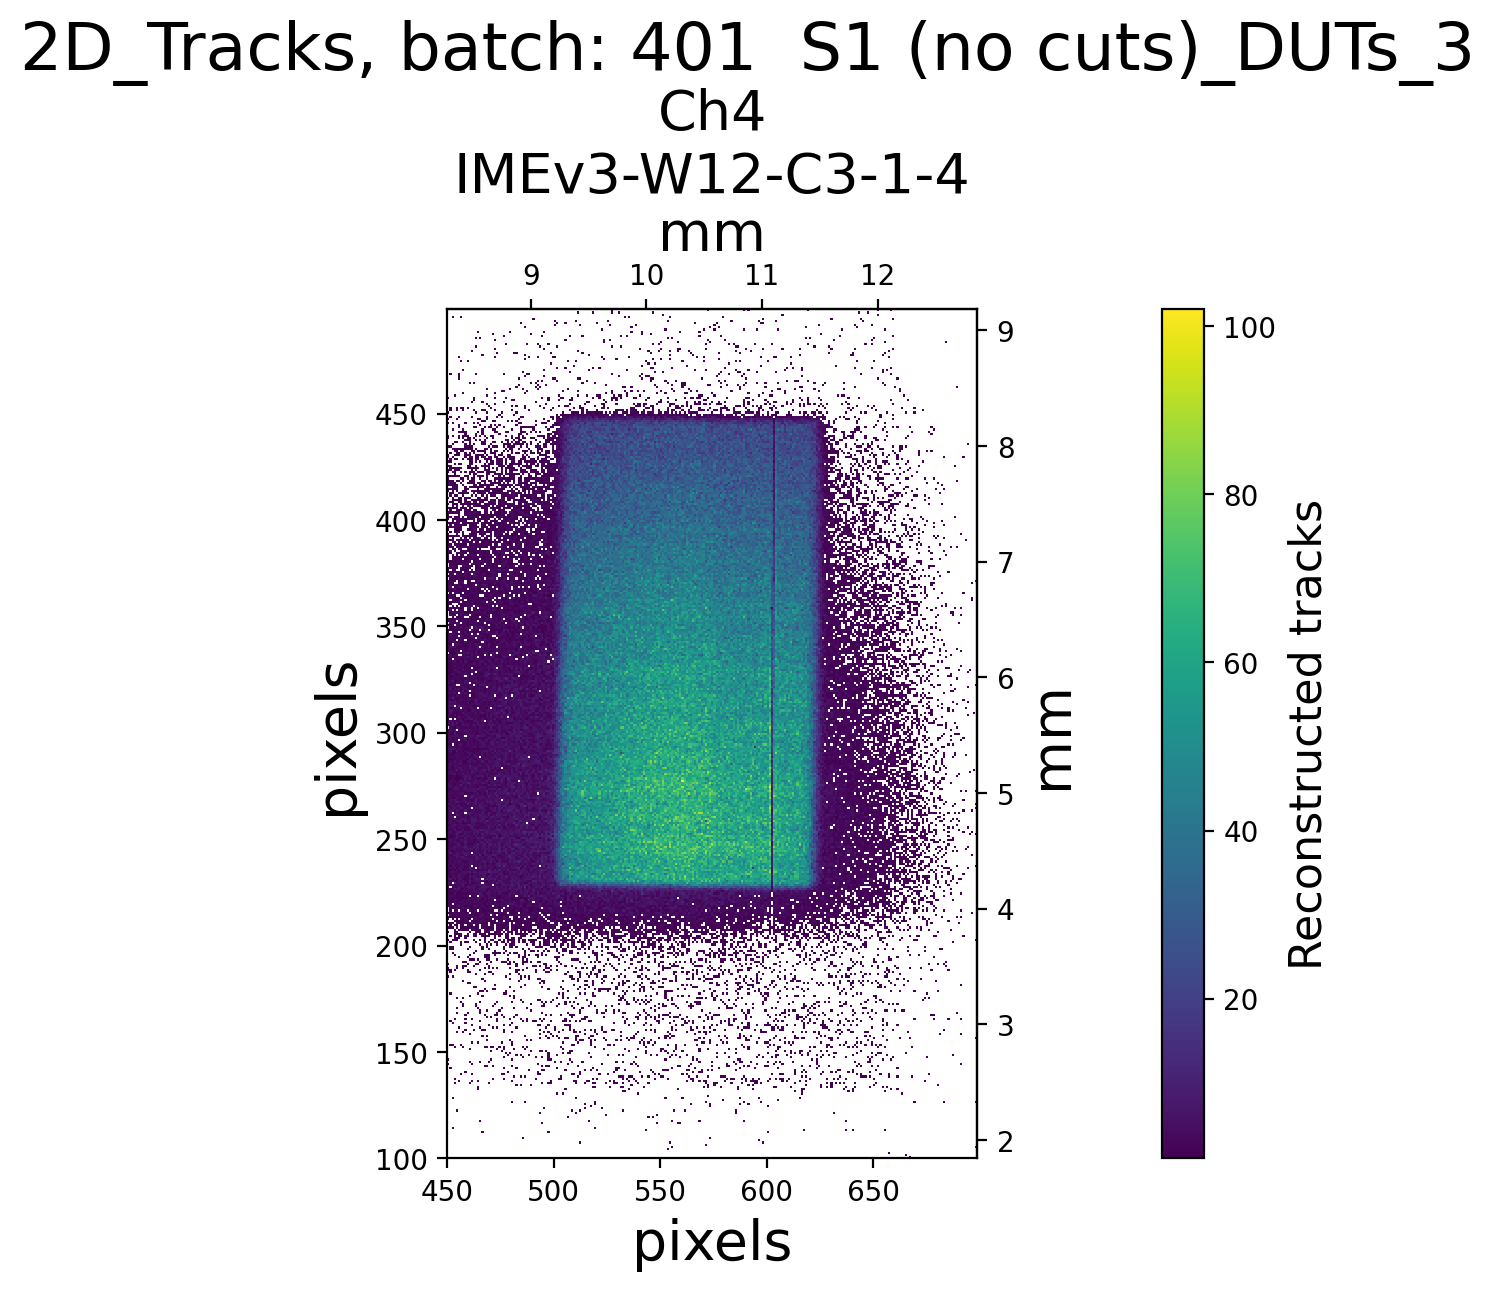

In [7]:
fig,axes = plot(df,"2D_Tracks", dict_of_batches[this_batch], S, bins=these_bins,
     n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} (no cuts)_DUTs_{duts_string}', savefig_path=pres_path, fmt='png')


## 1D Projection of the tracks


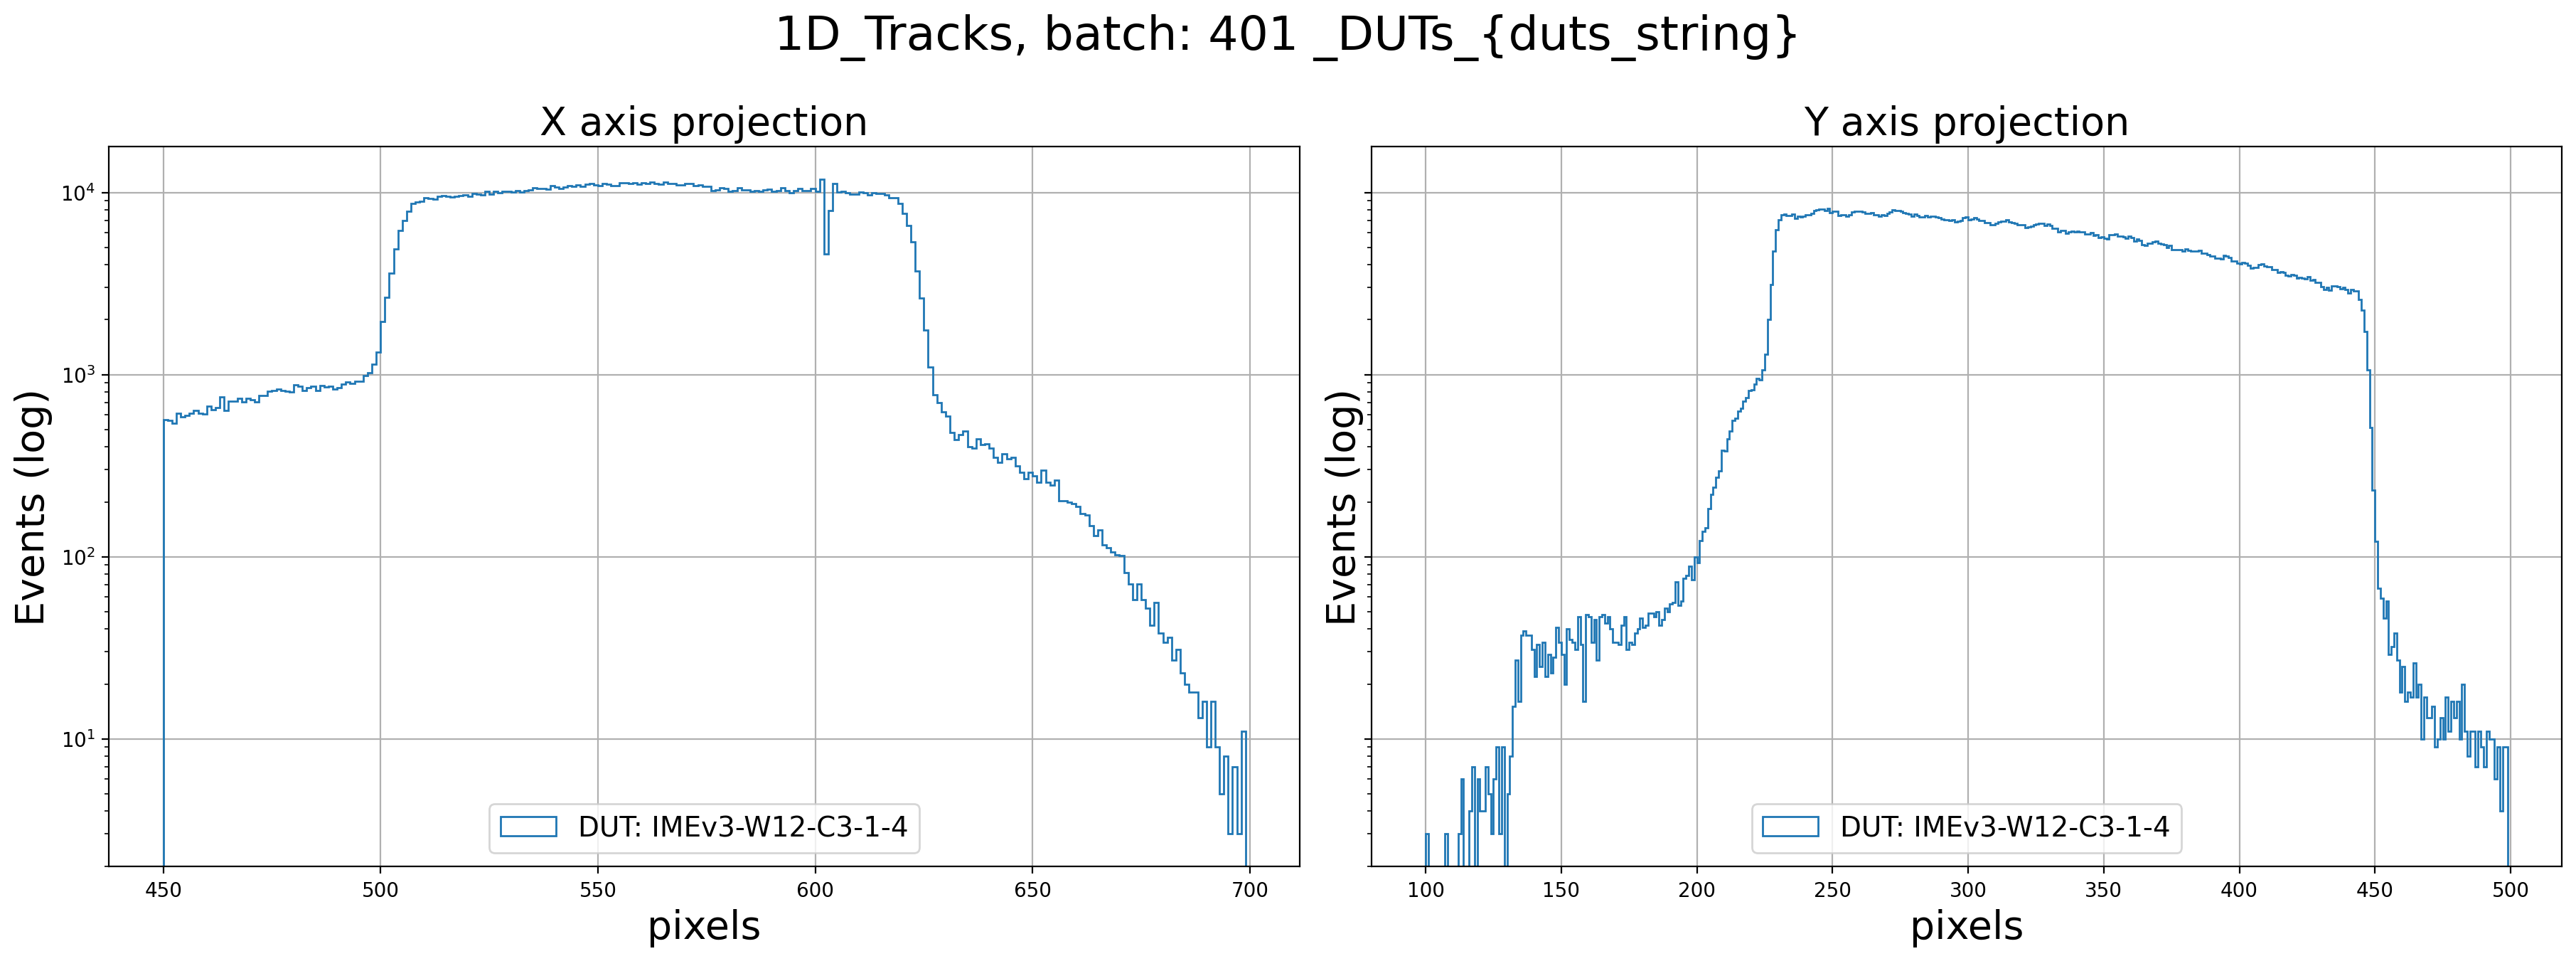

In [8]:
fig, axes = plot(df,"1D_Tracks", dict_of_batches[this_batch], S, bins=these_bins,
     n_DUT=DUTs, savefig=SAVE, savefig_path=pres_path, savefig_details="_DUTs_{duts_string}", fmt='png', title_position=1.1)
for ax in axes:
    ax.legend(fontsize=14, loc='lower center')


# PulseHeight vs $\Delta$t plot
Using:  
https://github.com/astrofrog/mpl-scatter-density

/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/marcello/.local/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


(<Figure size 2400x2400 with 2 Axes>,
 array([<ScatterDensityAxesSubplot:title={'center':'DUT: IMEv3-W12-C3-1-4'}, xlabel='$\\Delta t$ [ps] (DUT 3 - MCP)', ylabel='PulseHeight [mV]'>],
       dtype=object))

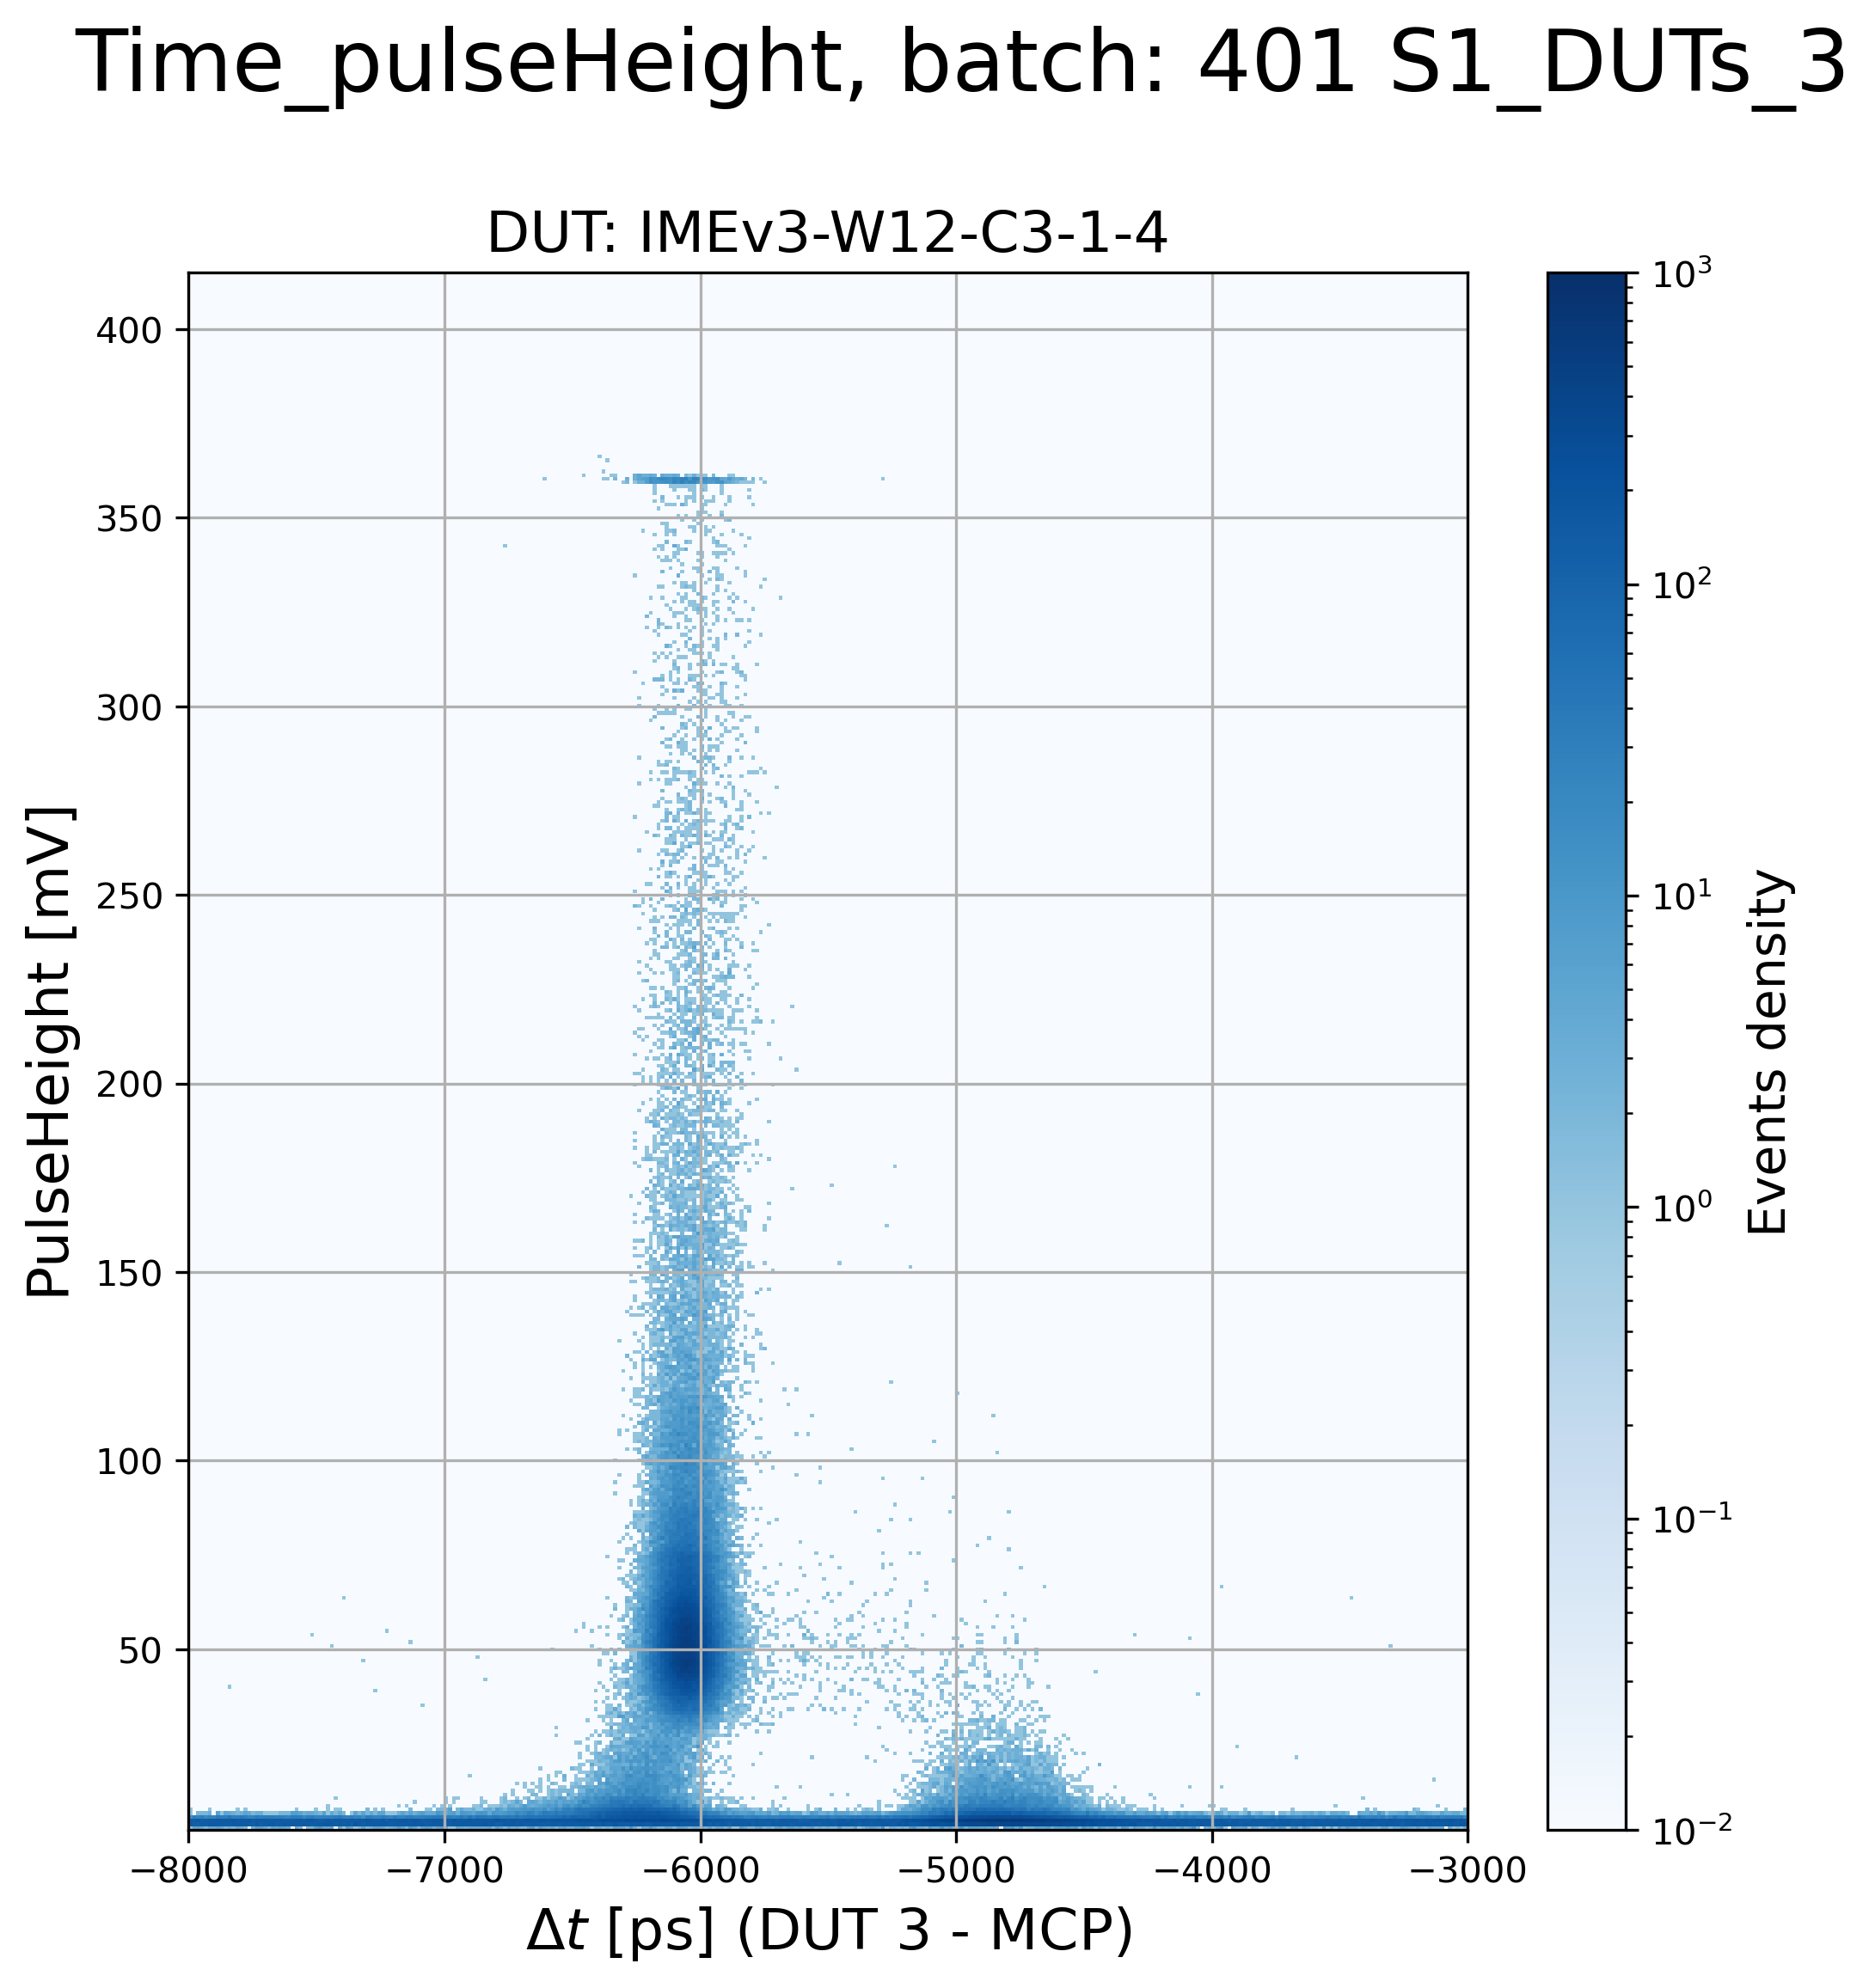

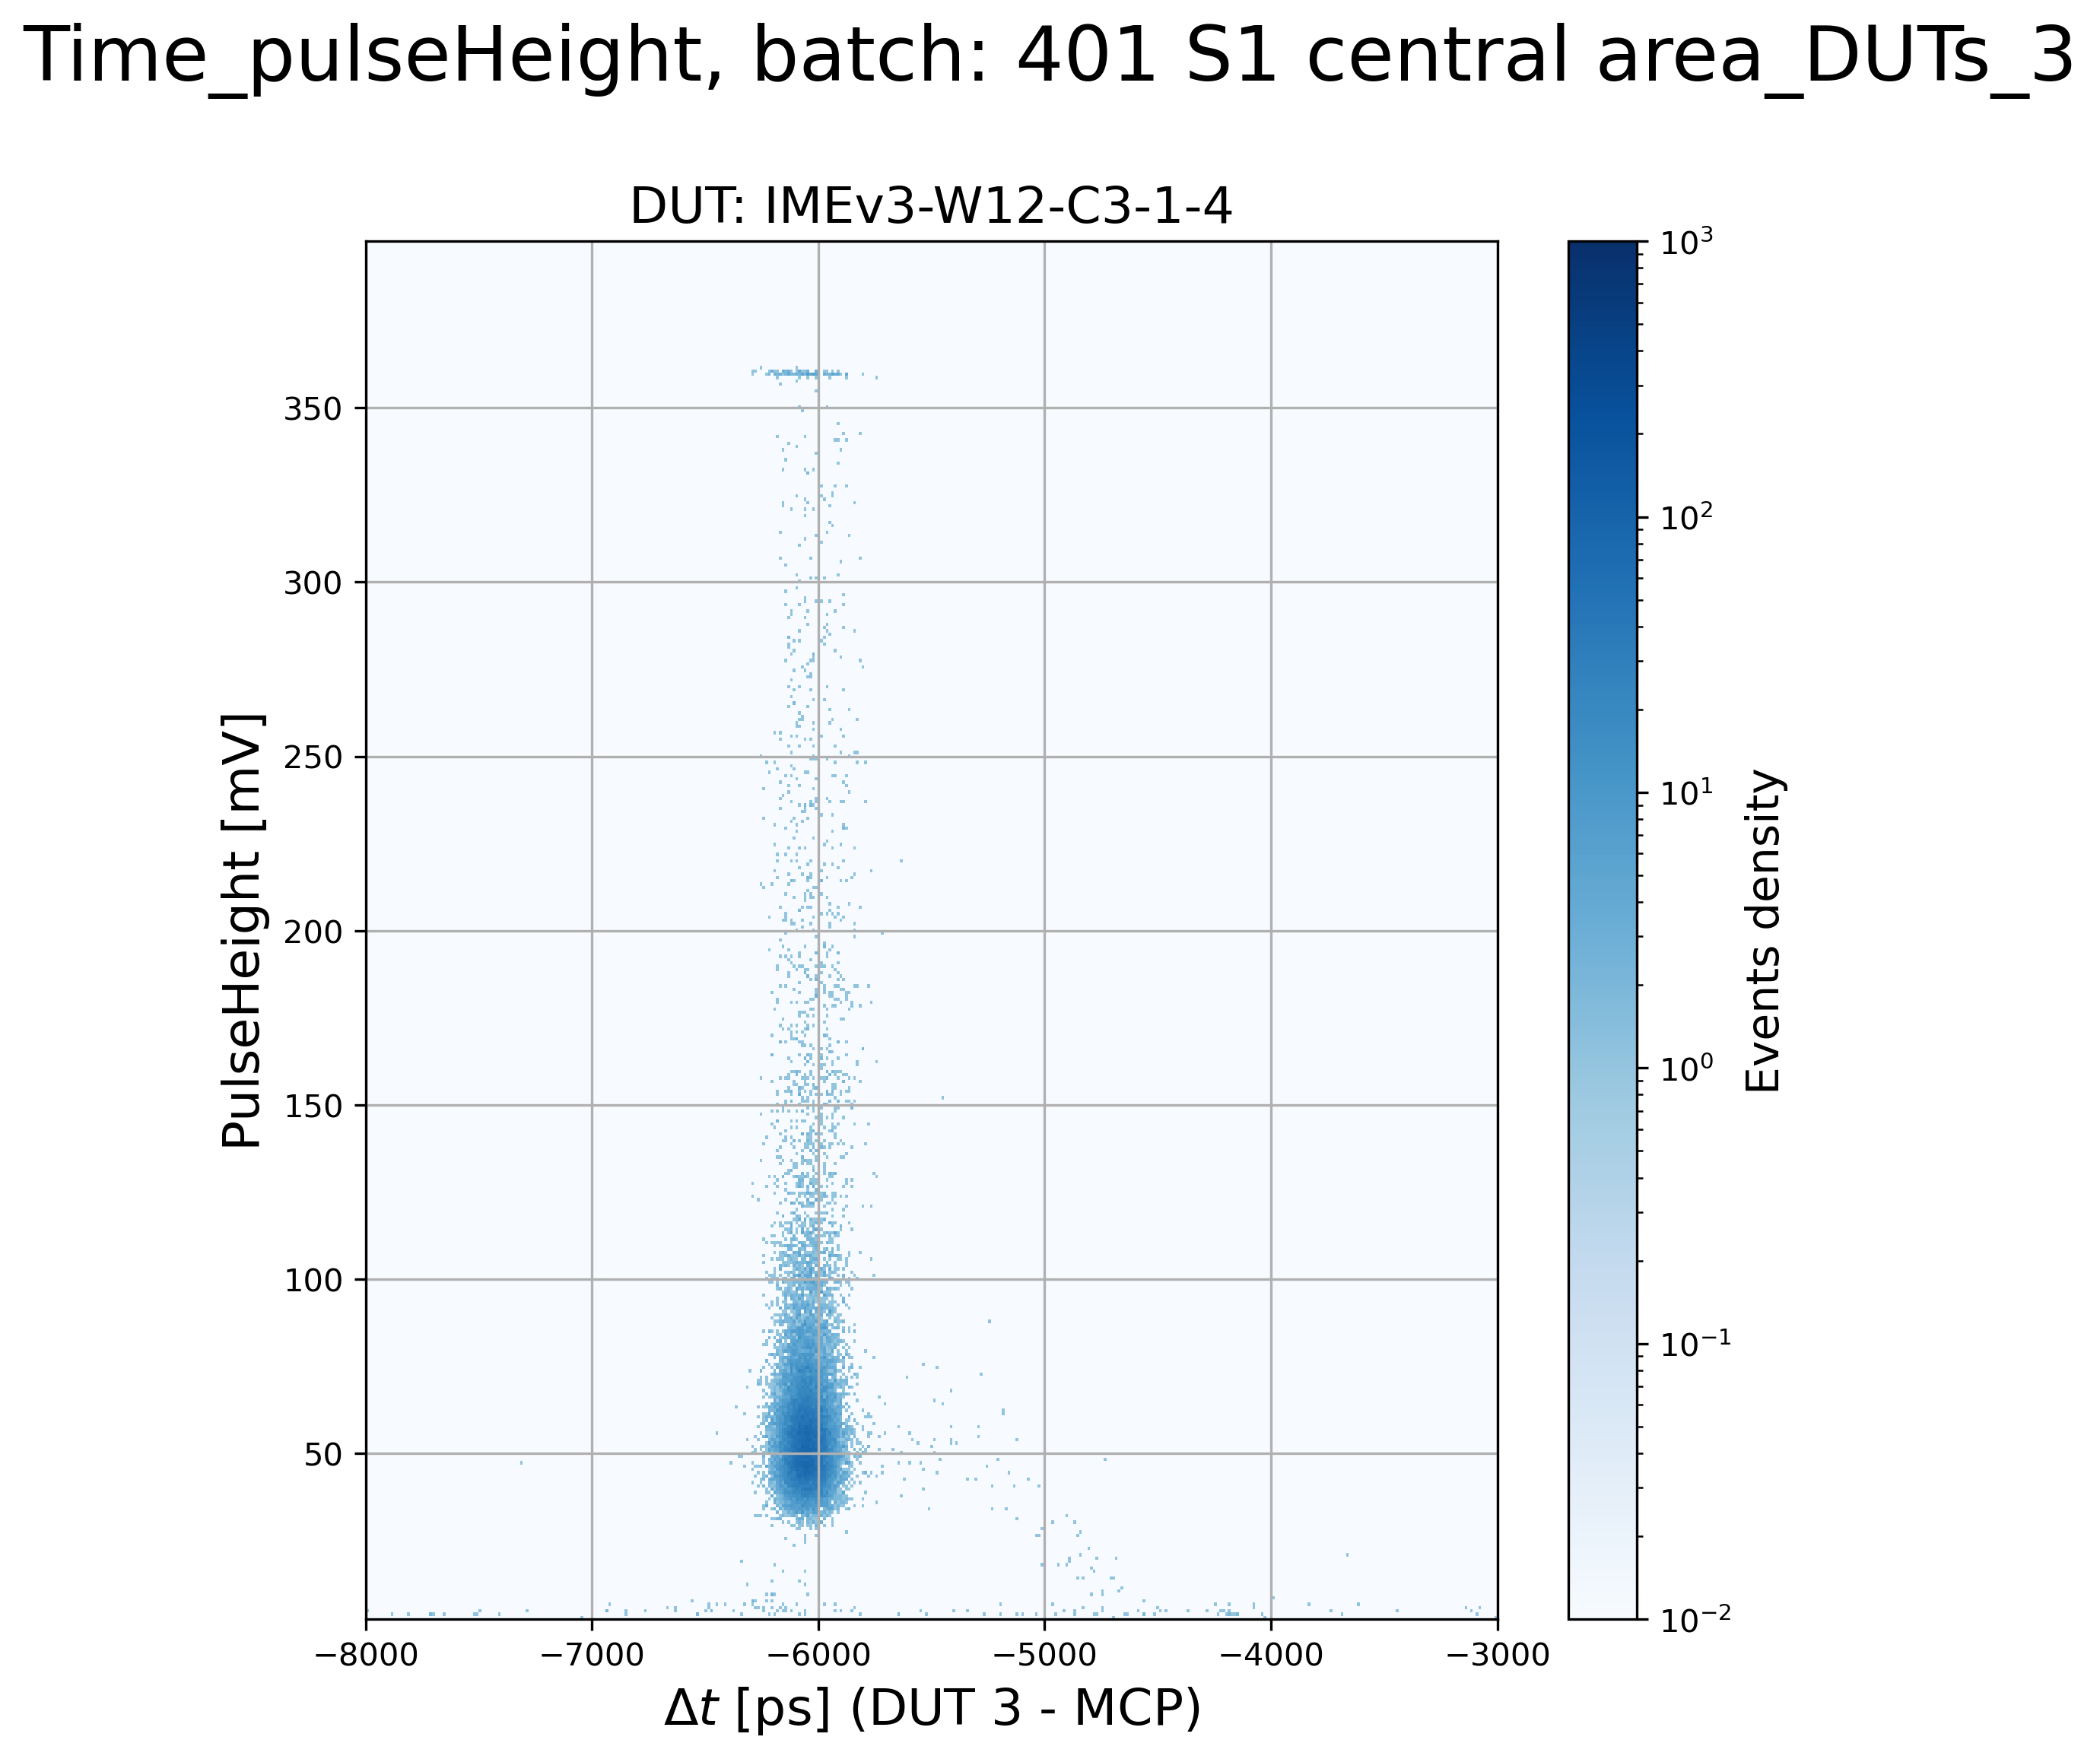

In [94]:
# I should probably calculate these ones later
# geo_cuts = [geometry_mask(df, DUT_number=dut, bins=these_bins, bins_find_min='rice', use=use_for_geometry_cut)[0] if dut in DUTs else None for dut in [1,2,3]]
central_sensor_area_cuts, central_sensor_area_info = zip(*[geometry_mask(df, DUT_number=dut, bins=these_bins, bins_find_min='rice', only_select='center', use='pulseheight')
                                                           if dut in DUTs else (None,None) for dut in [1,2,3]])
### delta time vs pulseHeight no info
plot(df, "Time_pulseHeight", dict_of_batches[this_batch], S, bins=time_bins, info=False, extra_info=False, title_position=1.0,
     n_DUT=DUTs, savefig=SAVE, savefig_details=f'{S}_DUTs_{duts_string}', savefig_path=pres_path, fmt='png')

plot(df, "Time_pulseHeight", dict_of_batches[this_batch], S, bins=time_bins, info=False, extra_info=False, mask=central_sensor_area_cuts, title_position=1.0,
     n_DUT=DUTs, savefig=SAVE, savefig_details=f'{S} central area_DUTs_{duts_string}', savefig_path=pres_path, fmt='png')

# PulseHeight distribution
to see where to apply a cut to the clean the data

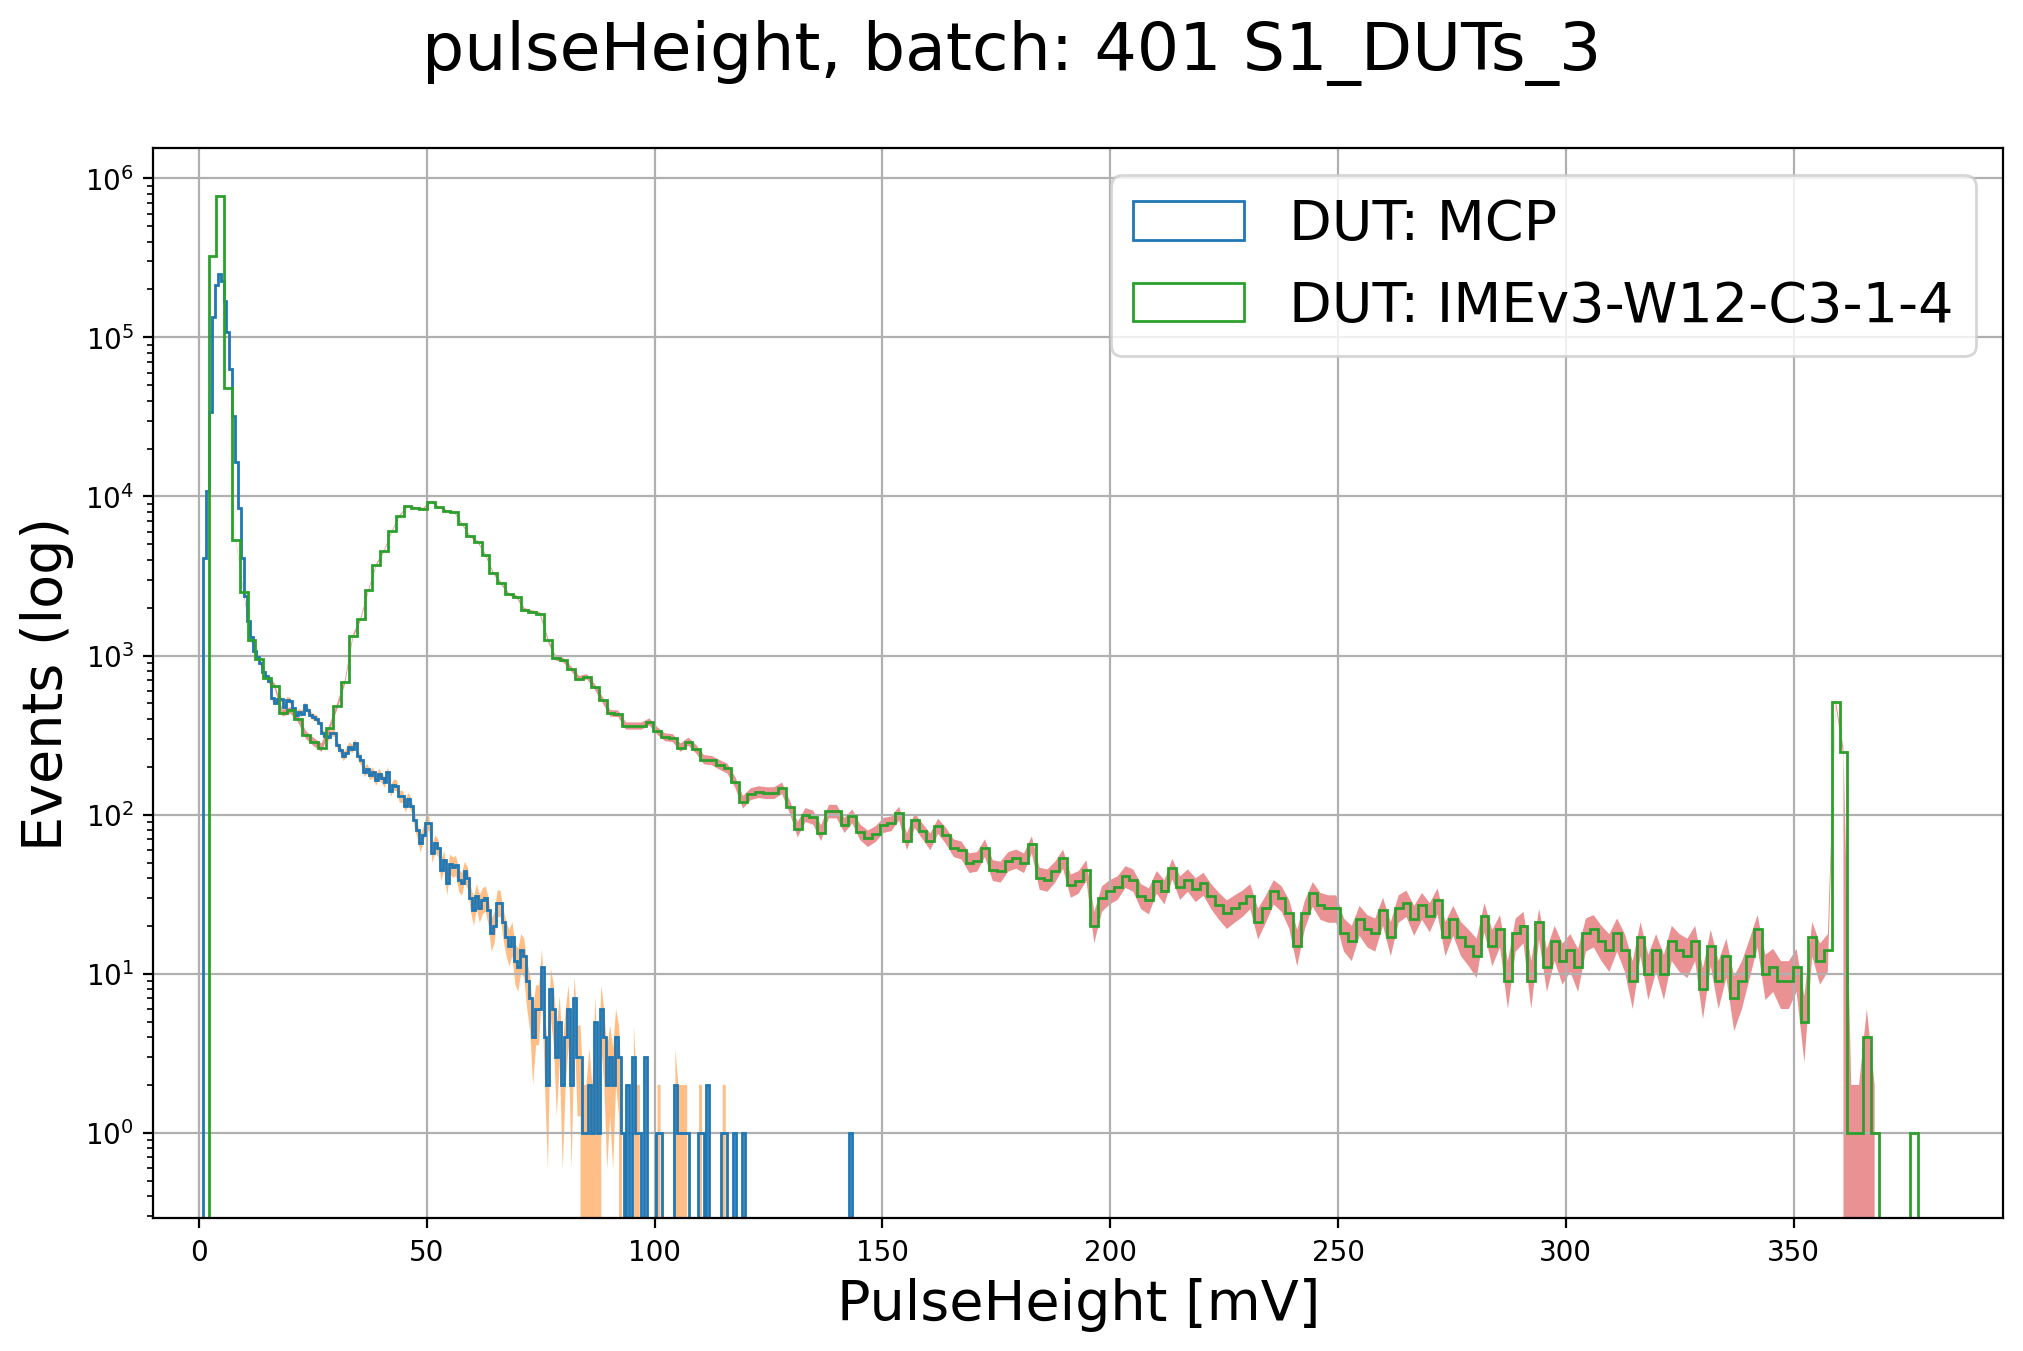

In [10]:
fig, ax = plot(df, "pulseHeight", dict_of_batches[this_batch], S, n_DUT=[0]+list(DUTs),
    savefig=SAVE, savefig_details=f'{S}_DUTs_{duts_string}', savefig_path=pres_path, fmt='png', title_position=1.1)
# ax.axvline(np.average(df['pedestal_1']) + 3*np.average(df['noise_1']))


### Calculate the mins in the pulseHeight cut


In [11]:
mins = [find_min_btw_peaks(df[f"pulseHeight_{dut}"], bins='rice', show_plot=False) if dut in DUTs else None for dut in [1,2,3]]
# mins.insert(0,None)     ### insert None as the 'peak' of the MCP
pulse_cuts_temp = [df[f'pulseHeight_{dut}']>mins[dut-1] if dut in DUTs else None for dut in [1,2,3]]
# mins

### Noise check
Check (event by event) that the pulseHeight is greater than pedestal + 3x noise

In [14]:
### I don't know what is this ???
# pulse_noise_cuts = [df[f"pedestal_{dut}"]+3*df[f"noise_{dut}"]<mins[dut-1]
#                if dut in DUTs else None for dut in [1,2,3]]

noise_cuts = [df[f"pulseHeight_{dut}"]>(df[f"pedestal_{dut}"]+3*df[f"noise_{dut}"])
              if dut in DUTs else None for dut in [1,2,3]]
pulse_cuts = [np.logical_and(pulse_cuts_temp[dut-1], noise_cuts[dut-1])
              if dut in DUTs else None for dut in [1,2,3]]

### Combine plots of pulseHeight and 2D Tracks after cut is applied

DUT_3


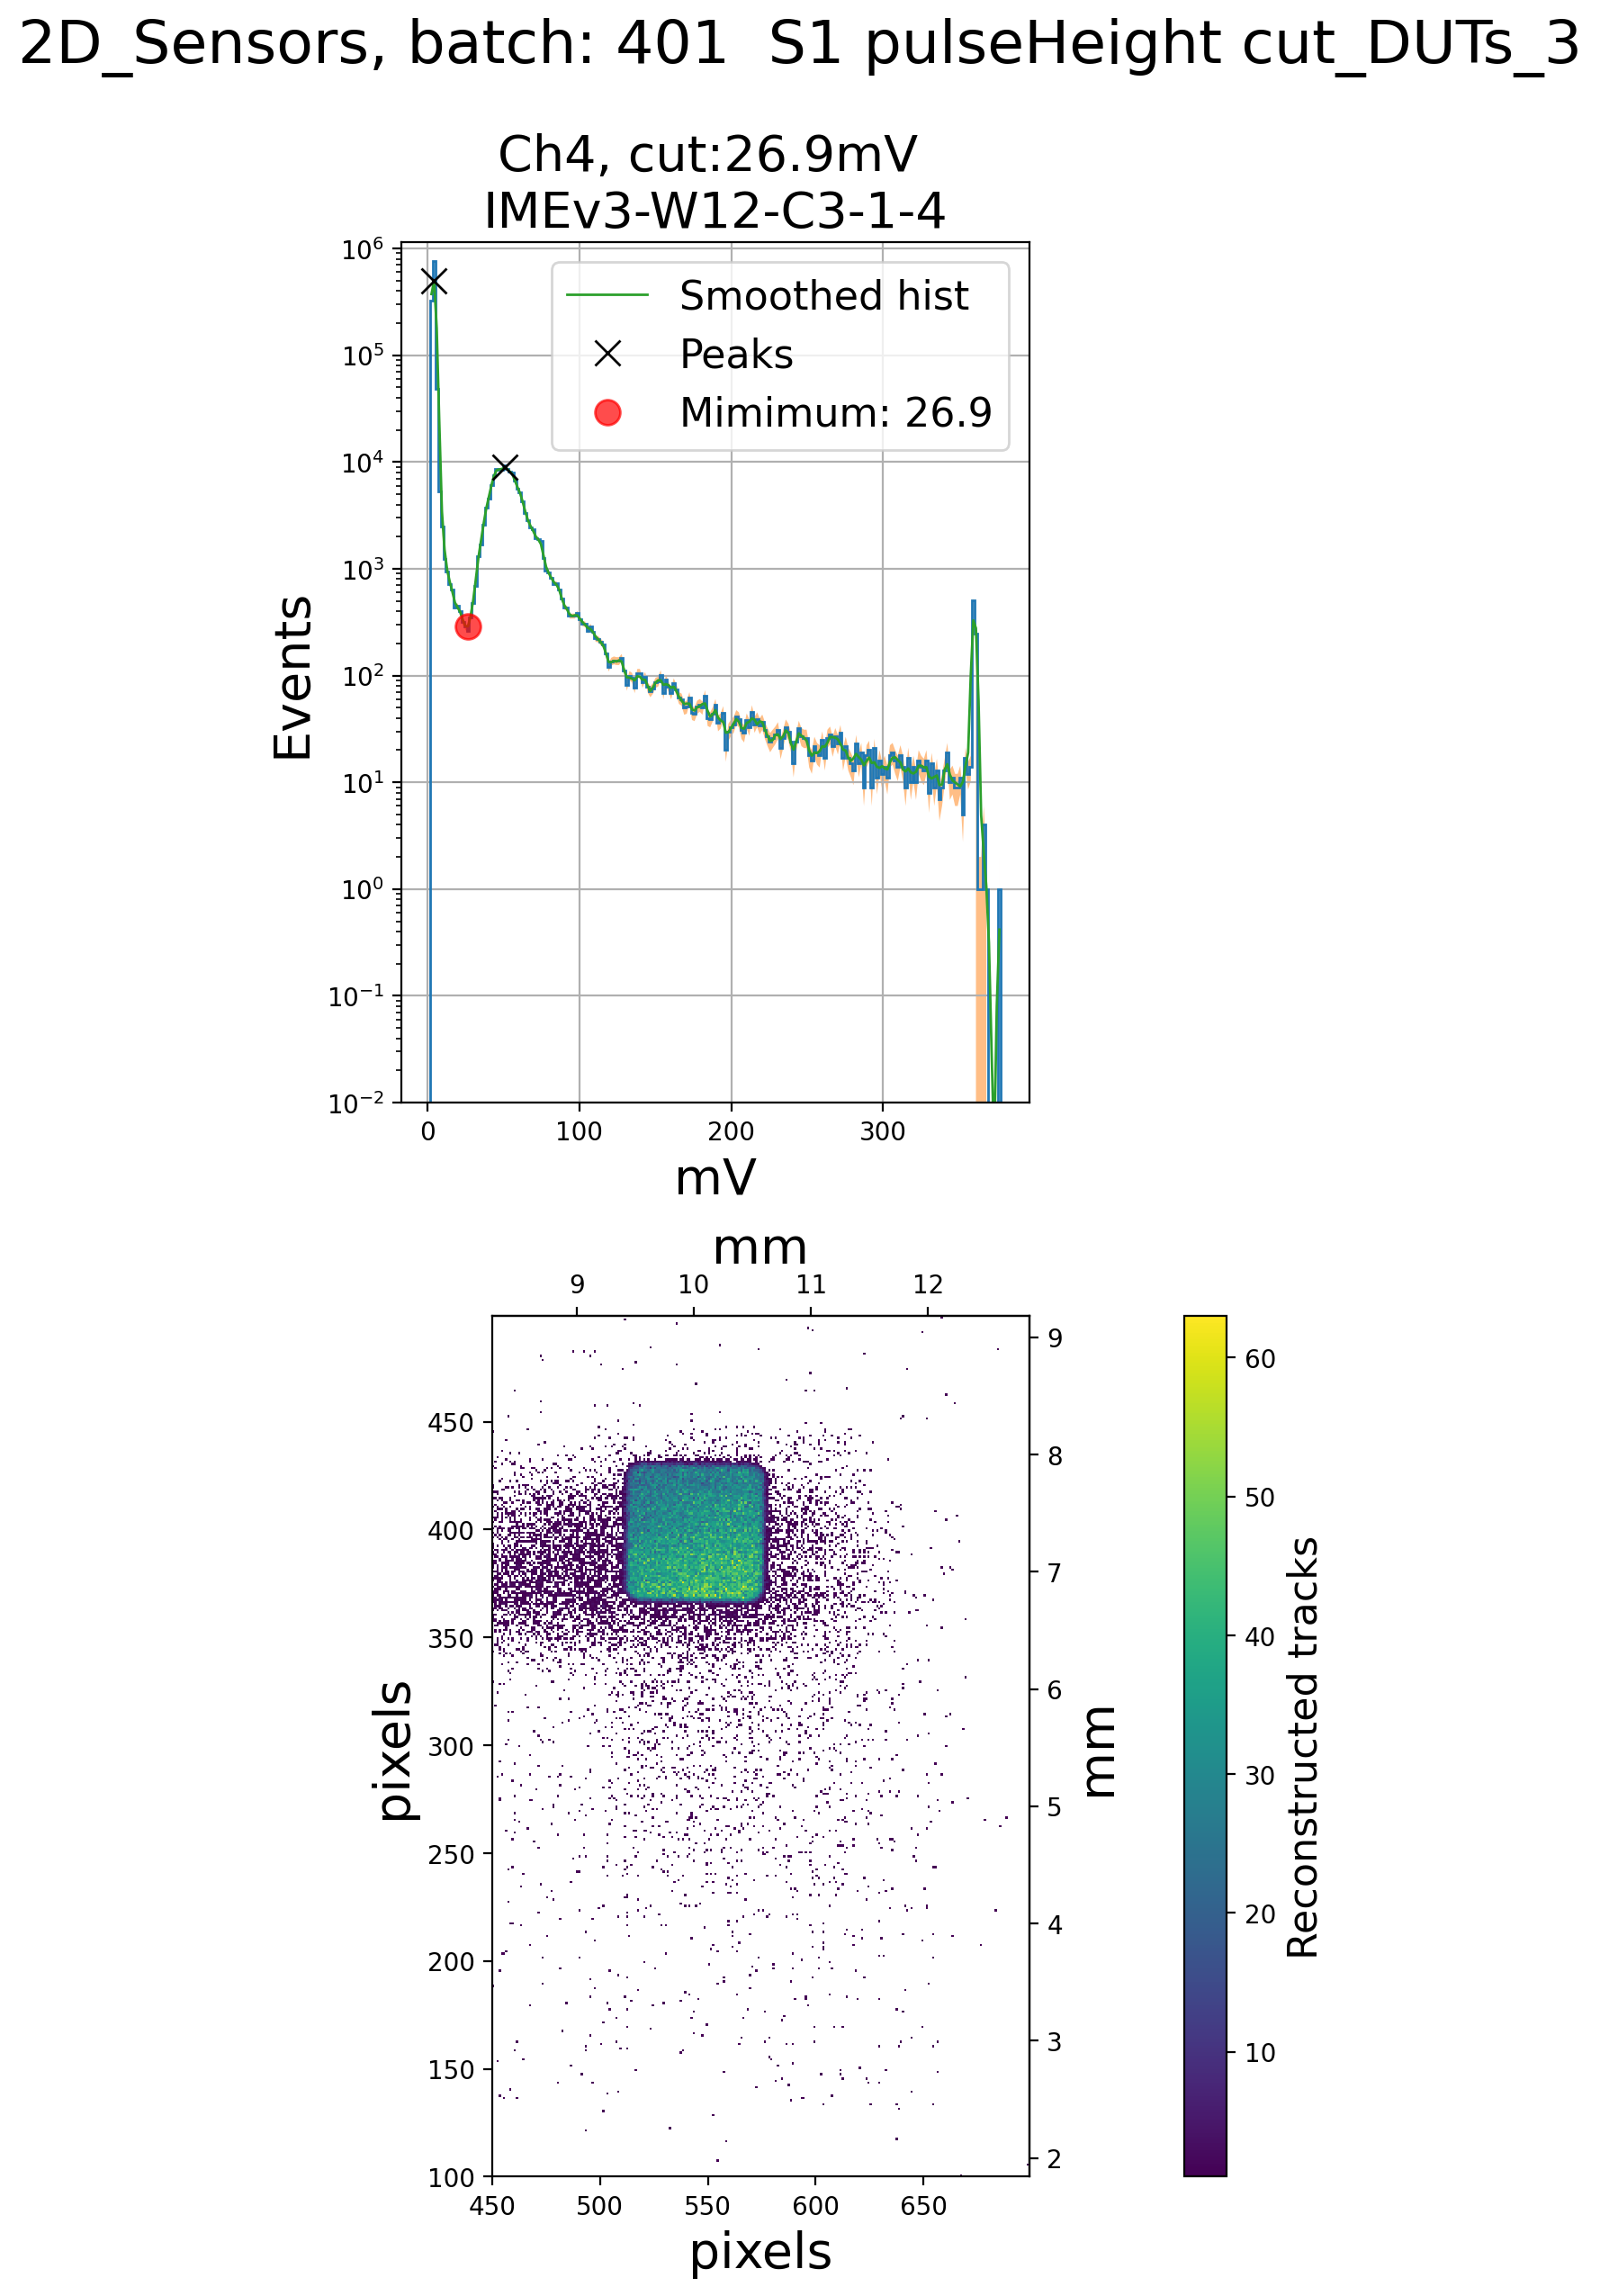

In [15]:
fig,axes = plot(df, "2D_Sensors", dict_of_batches[this_batch], S, bins=these_bins, n_DUT=DUTs, mask=noise_cuts,
     savefig=SAVE, savefig_details=f' {S} pulseHeight cut_DUTs_{duts_string}', savefig_path=pres_path, fmt='png')

# axes[0,0].set_xlim(0,300);

# Geometry cut
The goal is to find the 'area' of the sensor to select only events that pass thru that

### With the options to:
- selecting a slightly larger area to study the outer part
- selecting only the center, to get the clearest signal 

### Use the Tracks with a pulseHeight cut to define the 'edges' of the sensor

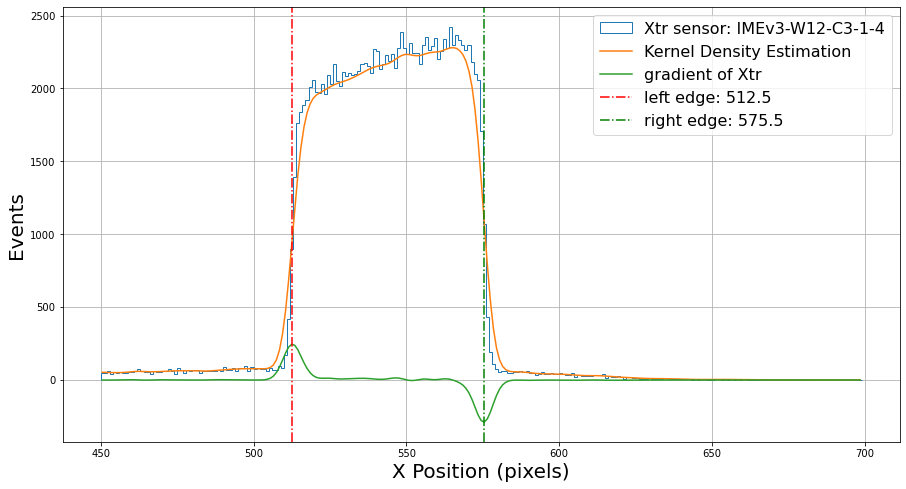

In [24]:
### I need to put all of this into the find_edges() so that they are the same
dut = 3
axis, XY_bins = 'X', 0
# axis, XY_bins = 'Y', 1

Tracks_cut = df[f'{axis}tr_{dut-1}'].loc[df[f"pulseHeight_{dut}"]>mins[dut-1]]
# Tracks_cut = df[f'{axis}tr_{dut-1}'].loc[time_cuts[dut-1]]  ### using time info


fig, ax = plt.subplots(figsize=(15,8))
hist, my_bins, _ = ax.hist(Tracks_cut, bins=these_bins[XY_bins], histtype='step', label=f"{axis}tr sensor: {dict_of_batches[this_batch].S[S].get_sensor(f'Ch{dut+1}').name}")

kde = gaussian_kde(Tracks_cut)
density_factor = sum(hist)*np.diff(my_bins)
bins_centers = (my_bins[1:]+my_bins[:-1])/2
values = time_limited_kde_evaluate(kde, bins_centers)*density_factor

ax.plot(bins_centers, values, label="Kernel Density Estimation")
ax.plot(bins_centers, np.gradient(values), label=f'gradient of {axis}tr')

left_edge = bins_centers[np.argmax(np.gradient(values))]
right_edge = bins_centers[np.argmin(np.gradient(values))]

ax.axvline(left_edge, color='r', linestyle='-.', label=f'left edge: {left_edge}')
ax.axvline(right_edge, color='g', linestyle='-.', label=f'right edge: {right_edge}')
# fig.suptitle("Find the edges of the sensor by applying pulseHeight cut (%.2f mV)"%mins[dut], fontsize=24, y=1.05)

ax.set_xlabel(f"{axis} Position (pixels)", fontsize=20)
ax.set_ylabel("Events", fontsize=20)
ax.grid('--')
ax.legend(fontsize=16, loc='best')

if SAVE:
    fig.savefig(os.path.join(pres_path,f"locating_edges_{axis}tr_batch_{this_batch}_{S}_DUT{dut}.svg"),bbox_inches='tight')

In [25]:
### calculate geometry cut (using pulseHeight)
# geo_cuts = [geometry_mask(df, DUT_number=dut, bins=these_bins, bins_find_min='rice', only_select='normal', use='pulseheight')[0] if dut in DUTs else None for dut in [1,2,3]]
# geo_infos = [geometry_mask(df, DUT_number=dut, bins=these_bins, bins_find_min='rice', only_select='normal', use='pulseheight')[1] if dut in DUTs else None for dut in [1,2,3]]

geo_cuts, geo_infos = zip(*[geometry_mask(df, DUT_number=dut, bins=these_bins, bins_find_min='rice', only_select='normal', use='pulseheight')
                            if dut in DUTs else (None,None) for dut in [1,2,3]])

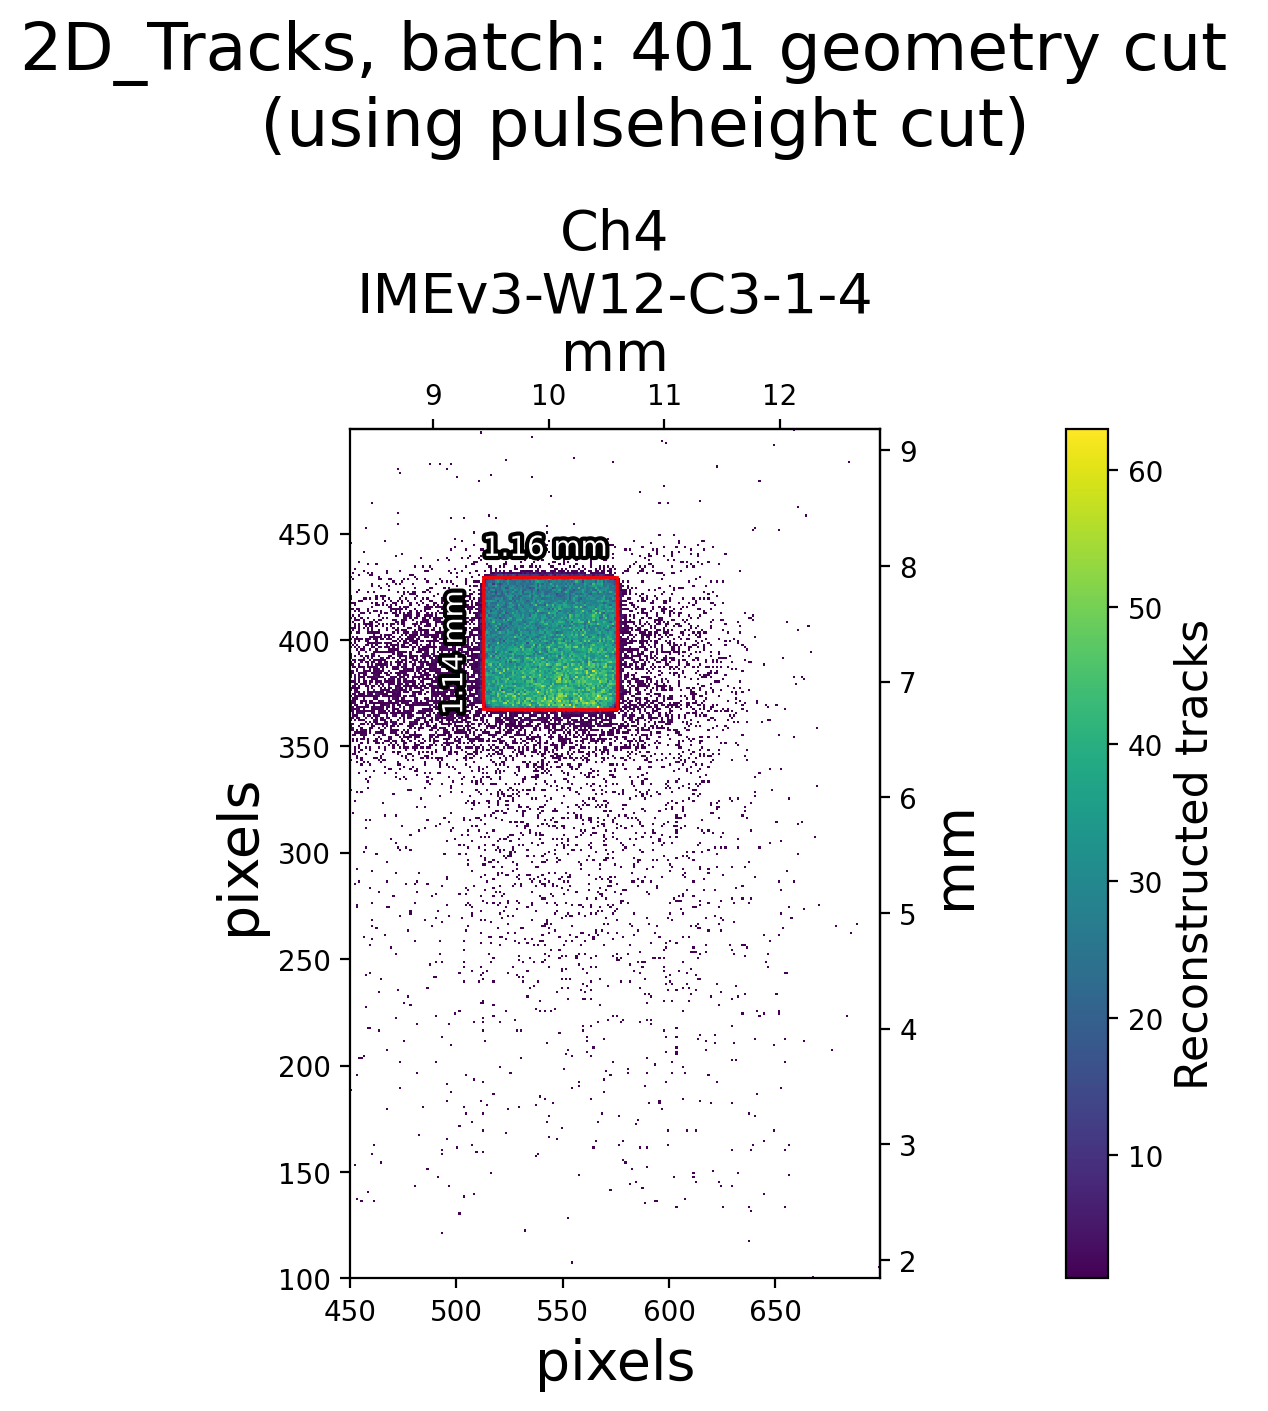

In [26]:
### All track using pulseHeight cut 

fig, axes = plot(df,"2D_Tracks", dict_of_batches[this_batch], S, bins=these_bins, mask=pulse_cuts,
     n_DUT=DUTs, savefig=False, savefig_details='geometry cut \n (using pulseheight cut)', savefig_path=pres_path, fmt='png', title_position=1.15)

for i,dut in enumerate(DUTs):
    axes[i].add_patch(rectangle_from_geometry_cut(**geo_infos[dut-1]))
    sensor_width = (geo_infos[dut-1]['right_edge']-geo_infos[dut-1]['left_edge'])*PIXEL_SIZE
    text = axes[i].text(x=geo_infos[dut-1]['left_edge'], y=geo_infos[dut-1]['top_edge']+10, s='%.2f mm'%sensor_width, color='white')
    text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])
    sensor_height = (geo_infos[dut-1]['top_edge']-geo_infos[dut-1]['bottom_edge'])*PIXEL_SIZE
    text = axes[i].text(x=geo_infos[dut-1]['left_edge']-20, y=geo_infos[dut-1]['bottom_edge'], s='%.2f mm'%sensor_height, color='white', rotation='vertical')
    text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])
    
if SAVE:
    fig.savefig(os.path.join(pres_path,f"2D_Tracks_{this_batch}_{S} highlight geometry cut (using pulseHeight)_DUTs_{duts_string}.png"), bbox_inches='tight')
     

In [27]:
# ### All tracks with time cut

# fig, axes = plot(df,"2D_Tracks", dict_of_batches[this_batch], S, bins=these_bins, mask=time_cuts,
#      n_DUT=DUTs, savefig=SAVE, savefig_details=' (with time cut)', savefig_path=pres_path, fmt='png')

# Time cut
Fit the $\Delta t$ with a gaussian, pick some  n*$\sigma$ interval and select events only in this window apply the fit from -20ns to +20ns so that the background is more flat
<!-- - also add full time range -->

#### Gaussian:
$$
\Large
f(x,A,\mu,\sigma,BG) = A \cdot e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma} \right)^2} + BG
$$

- $A:  \quad $ Amplitude (n° of events)
- $\mu: \quad $ Mean of the gaussian
- $\sigma: \quad $ Standard deviation
- $BG: \quad $  Flat background

In [28]:
### calculate the time cuts
time_cuts = [time_mask(df, dut, bins=time_bins, show_plot=False, sigmas=3)[0] if dut in DUTs else None for dut in [1,2,3]]


[INFO] -	 in 'time_mask()': Fit parameters [ 7085.15586098 -6056.46656876    69.08415818   170.68455507]


In [29]:
### actually maybe first I want a plot of the time MCP-dut without the fit
colormap = ['k','b','g','r']

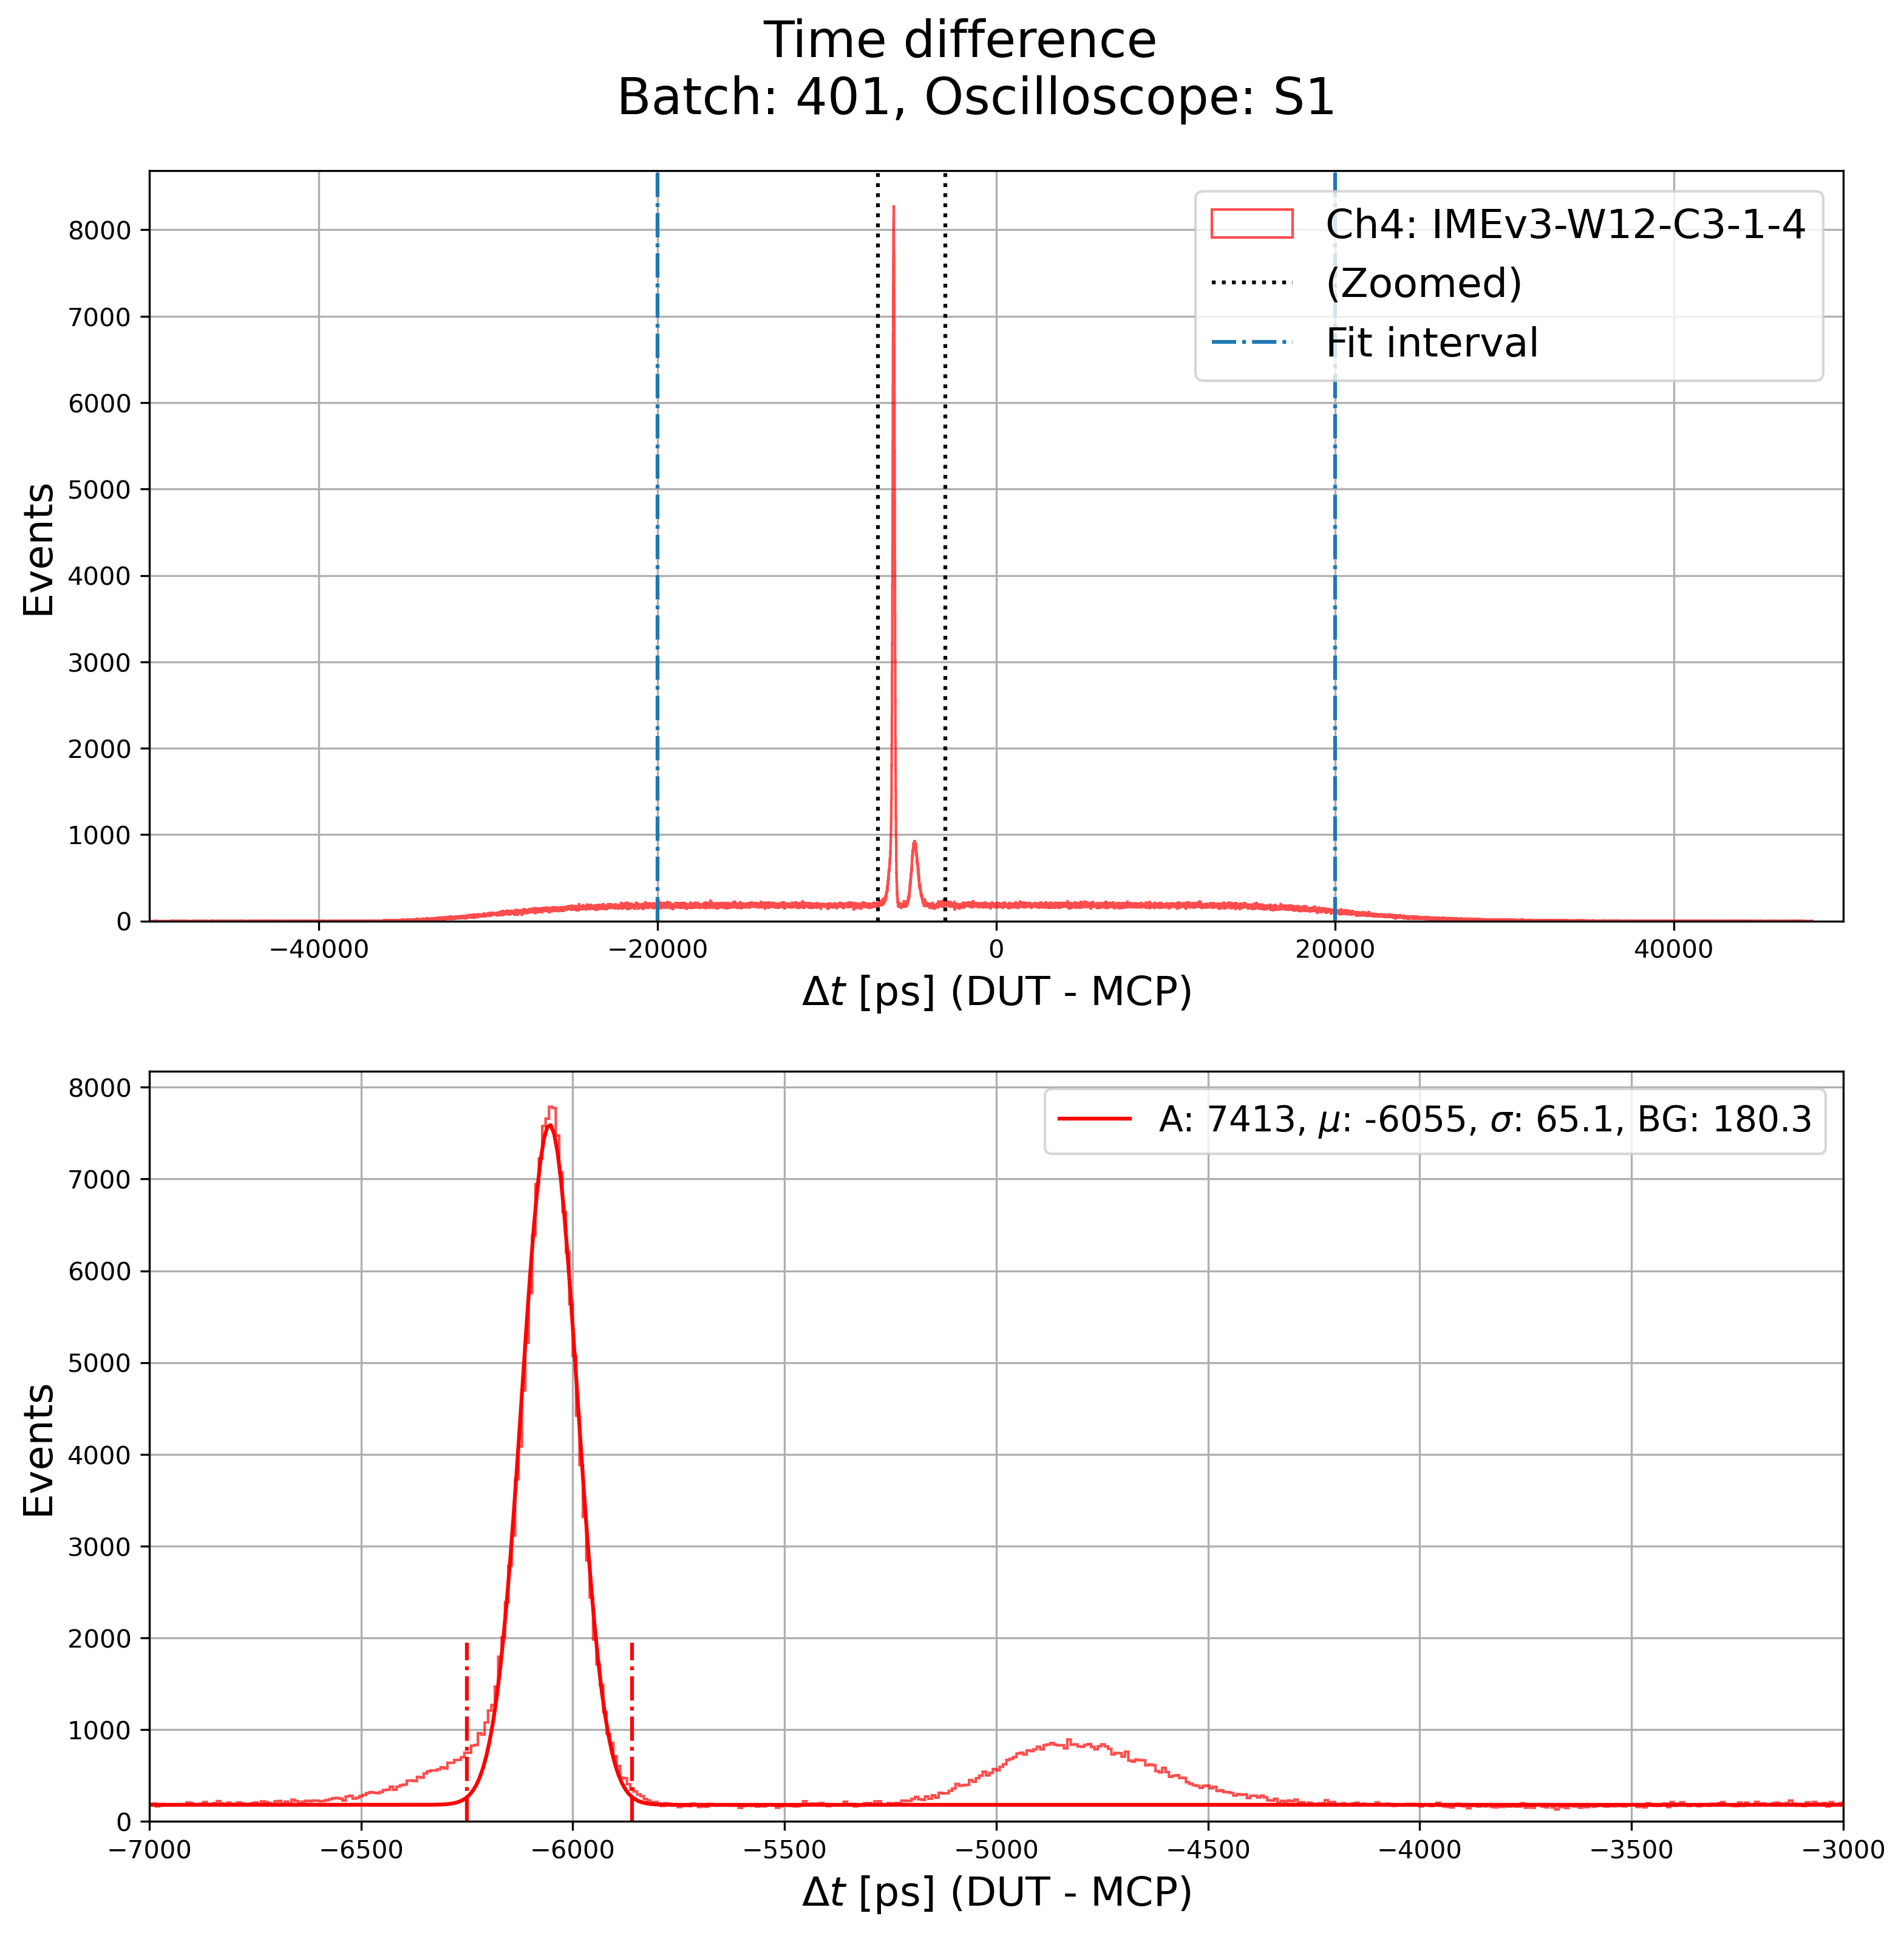

In [30]:
### now I fit between -20ns < delta t < 20ns
# SAVE = False
fig, axes = plt.subplots(figsize=(12,12),nrows=2, ncols=1, dpi=300)

for dut in DUTs:
    window_limit = 20e3
    window_fit = np.logical_and((df[f"timeCFD20_{dut}"]-df["timeCFD50_0"])> -window_limit,
                               (df[f"timeCFD20_{dut}"]-df["timeCFD50_0"])< +window_limit)
    
    plot_histogram((df[f"timeCFD20_{dut}"]-df["timeCFD50_0"]),
                   bins=15000, color=colormap[dut], linewidth=1, alpha=0.7,
                   label=f"Ch{dut+1}: {dict_of_batches[this_batch].S[S].get_sensor(f'Ch{dut+1}').name}",
                   fig_ax=(fig,axes[0]))
    
    
    hist, my_bins,_,_,_ = plot_histogram((df[f"timeCFD20_{dut}"].loc[window_fit]-df["timeCFD50_0"].loc[window_fit]),
                                         bins=5000, color=colormap[dut], linewidth=1, alpha=0.7,
                                         fig_ax=(fig,axes[1]))

    bins_centers = (my_bins[:-1]+my_bins[1:])/2
    initial_param = (np.max(hist),bins_centers[np.argmax(hist)],100,np.average(hist))
    param, covar = curve_fit(my_gauss, bins_centers, hist, p0=initial_param)#, sigma=hist**0.5, absolute_sigma=True)
#     print(f"Fit parameters: {param}")
    axes[1].plot(bins_centers, my_gauss(bins_centers,*param), color=colormap[dut])
    number_of_sigmas = 3
    left_base, right_base = param[1]-number_of_sigmas*param[2], param[1]+number_of_sigmas*param[2]
    axes[1].vlines(left_base, ymin=0, ymax=np.max(hist)/4, color=colormap[dut], linestyle='-.')
    axes[1].vlines(right_base, ymin=0, ymax=np.max(hist)/4, color=colormap[dut], linestyle='-.')
    ### add units to the parameters
    axes[1].plot([],[],color=colormap[dut], label="A: %.0f, $\mu$: %.0f, $\sigma$: %.1f, BG: %.1f" %(param[0],param[1], param[2], param[3])) # only two decimals

xlim = (-7e3,-3e3)
# xlim = (-10e3,0)
axes[0].set_xlim(-50e3,50e3)
axes[0].set_xlabel(f"$\Delta t$ [ps] (DUT - MCP)", fontsize=16)
axes[0].set_ylabel("Events", fontsize=16)
axes[0].axvline(xlim[0],linestyle=':',color='k',label='(Zoomed)')
axes[0].axvline(xlim[1],linestyle=':',color='k')
axes[0].axvline(-window_limit, linestyle='-.', label='Fit interval')
axes[0].axvline(+window_limit, linestyle='-.')
axes[0].legend(fontsize=16)

axes[1].set_xlabel(f"$\Delta t$ [ps] (DUT - MCP)", fontsize=16)
axes[1].set_ylabel("Events", fontsize=16)
axes[1].set_xlim(xlim)
axes[1].legend(fontsize=14)

# ### this lines are just to visually find an interval on which to study interesting features
# axes[1].axvline(-5650, color='k')
# axes[1].axvline(-6000, color='k')

fig.suptitle(f"Time difference \
\n Batch: {this_batch}, Oscilloscope: {S}",y=.95, fontsize=20)
if SAVE:
    fig.savefig(os.path.join(pres_path,f"time_difference_{this_batch}_{S}_double_plot_zoomed_and_gauss_fit_DUTs_{duts_string}.png"), bbox_inches="tight")

### Geometry cut using time information
if the pulseHeight cut fails (very likely in the case of irradiated sensors), the geometry cut could be done with time information instead

[INFO] -	 in 'time_mask()': Fit parameters [ 7085.15586098 -6056.46656876    69.08415818   170.68455507]


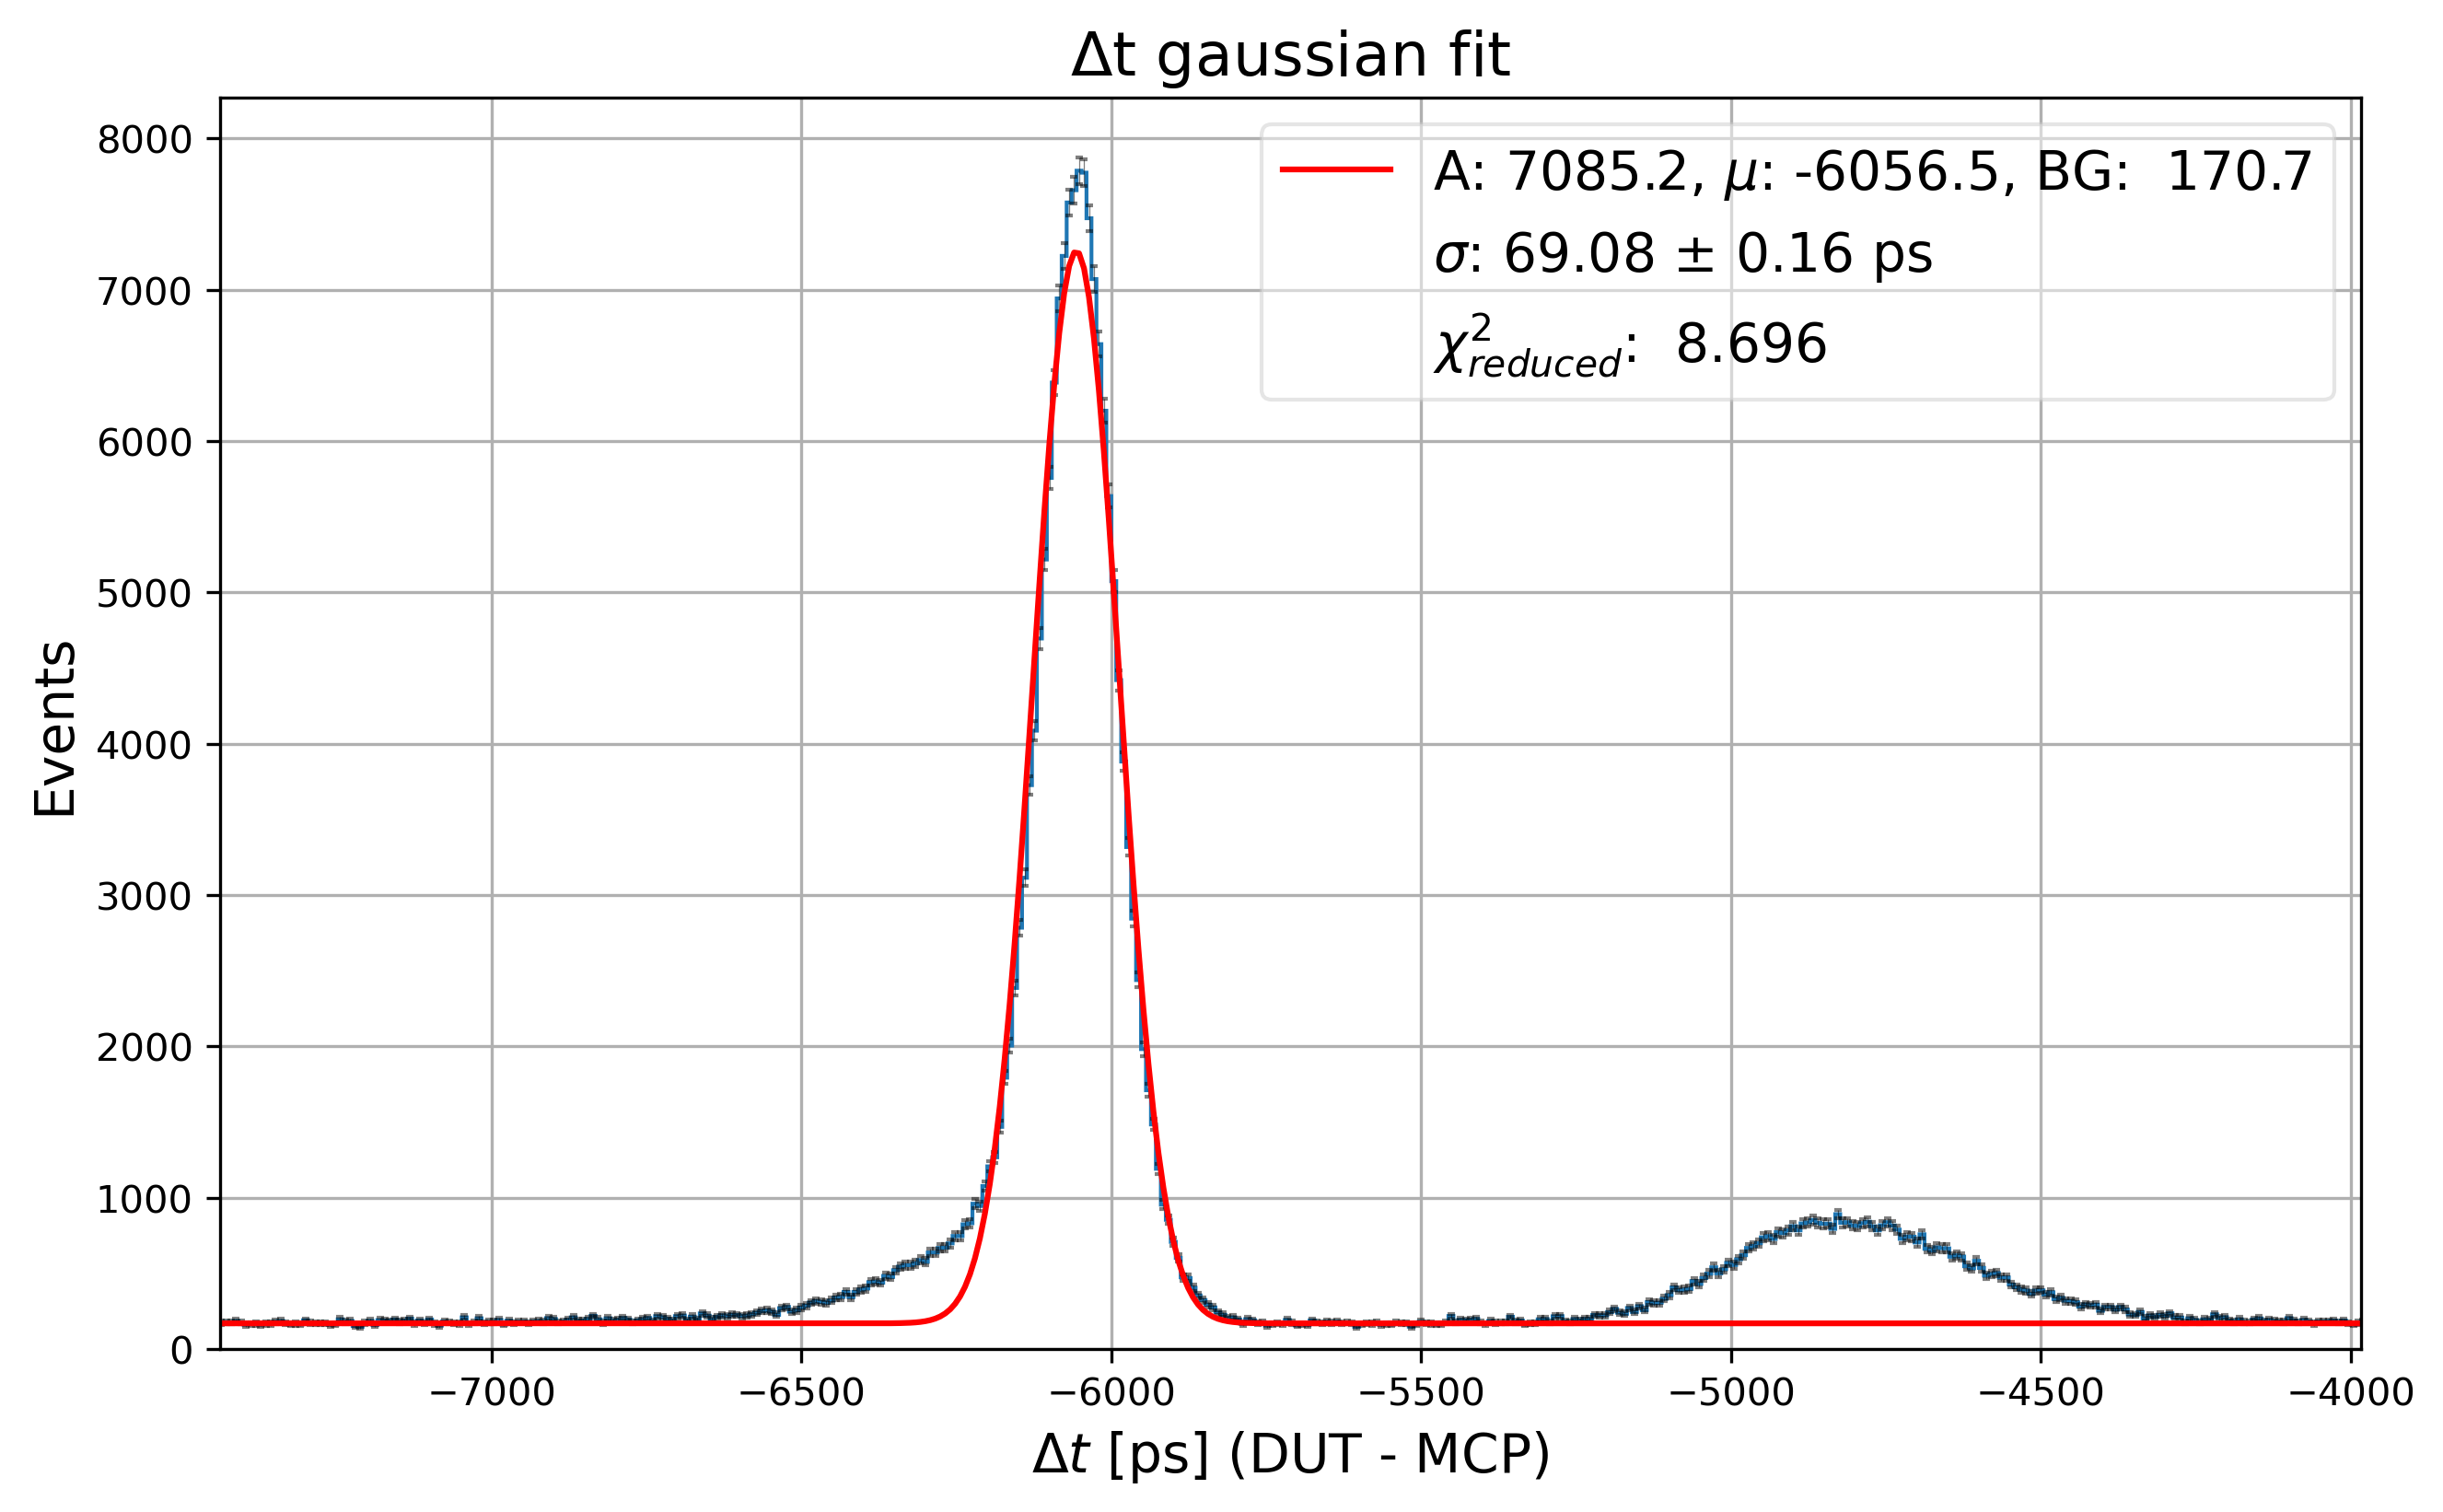

In [31]:
### calculate geometry cut (using time)
geo_cuts_time, geo_infos_time = zip(*[geometry_mask(df, DUT_number=dut, bins=these_bins, bins_find_min='rice', only_select='normal', use='time', time_bins=time_bins, show_plot=True) 
                                      if dut in DUTs else (None,None) for dut in [1,2,3]])

[INFO] -	 in 'time_mask()': Fit parameters [ 9965.95397362 -5882.89706785    69.32242219   160.72063692]


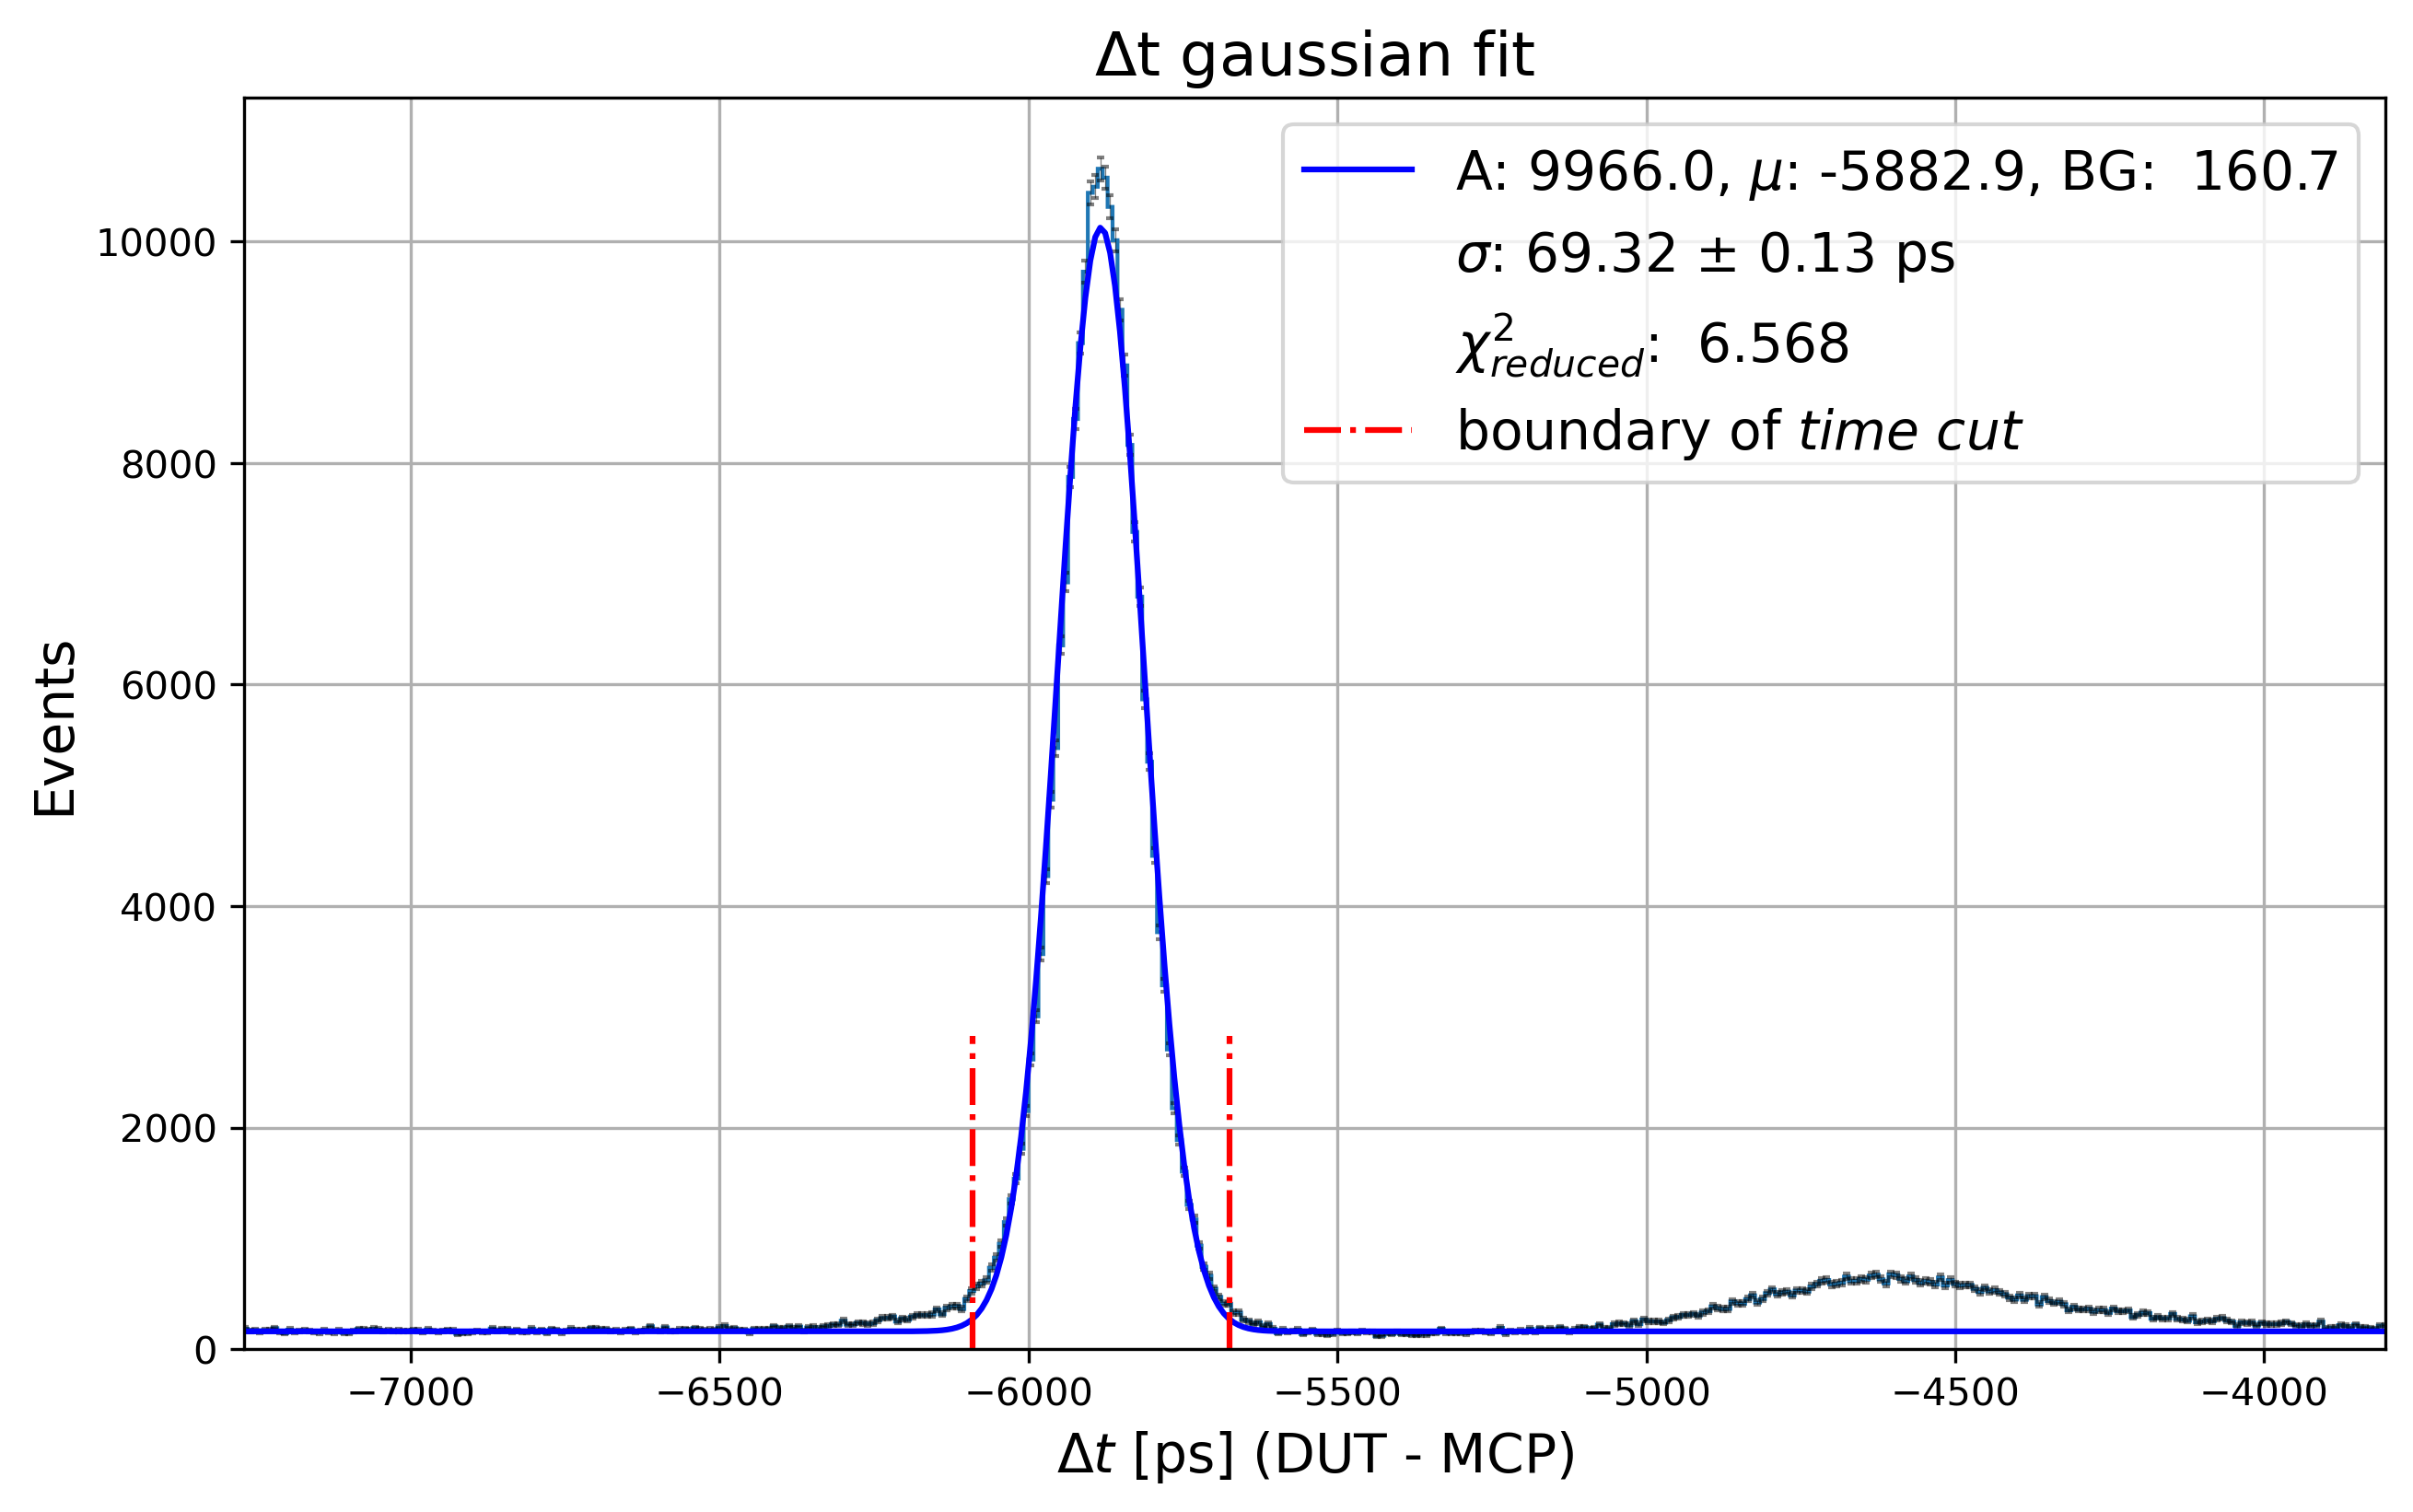

In [32]:
### I want to save the single time cuts (with respective gaussian + BG fit)
one_dut = 1

fig,ax = plt.subplots(figsize=(10,6), dpi=300)

_,time_cut_dict = time_mask(df, one_dut, bins=time_bins, show_plot=True, fig_ax=(fig,ax))
left_base = time_cut_dict['left_base']
right_base = time_cut_dict['right_base']
vertical_line_max = ax.get_ylim()[1]/4
ax.vlines(left_base, ymin=0, ymax=vertical_line_max, color=colormap[dut], linestyle='-.',
         label="boundary of $\it{time\ cut}$")
ax.vlines(right_base, ymin=0, ymax=vertical_line_max, color=colormap[dut], linestyle='-.')
ax.legend(fontsize=14)

if SAVE:
    fig.savefig(os.path.join(pres_path,f"time_difference_{this_batch}_{S}_gauss_fit_no_cuts_DUT{one_dut}.png"), bbox_inches='tight')
    

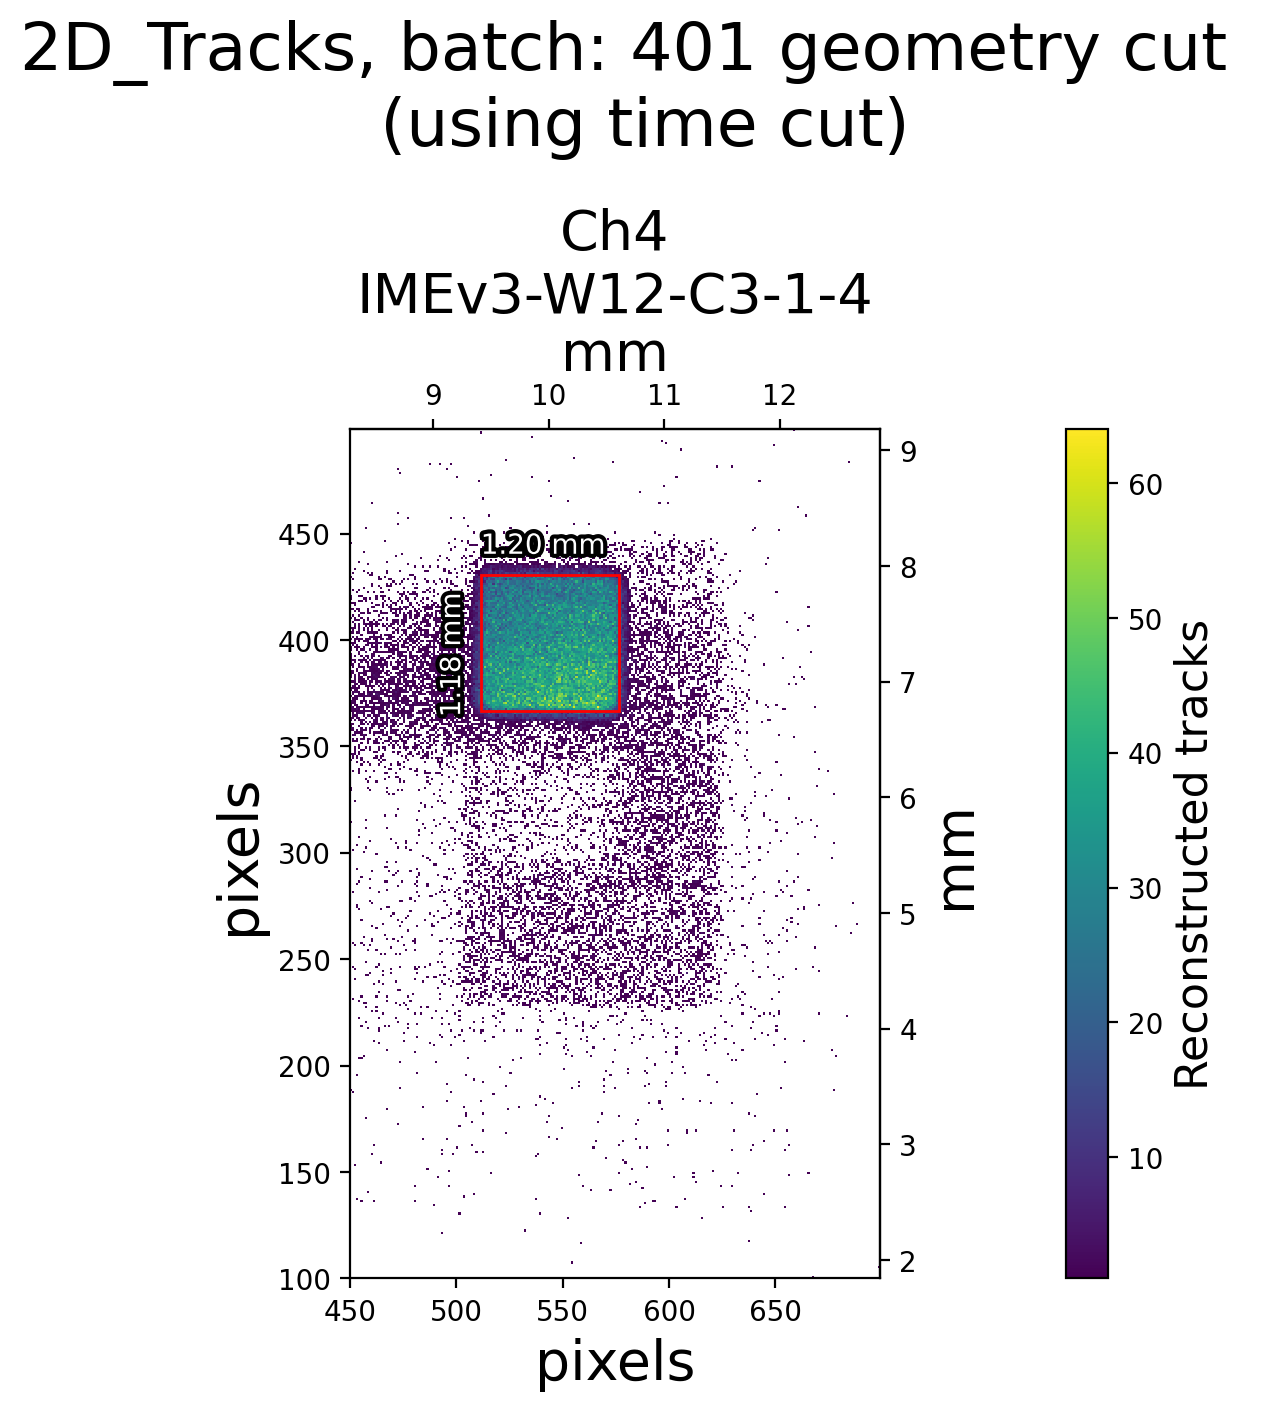

In [33]:
### Tracks with time cut and highlighted area of geometry cut

fig, axes = plot(df,"2D_Tracks", dict_of_batches[this_batch], S, bins=these_bins, mask=time_cuts,
     n_DUT=DUTs, savefig=False, savefig_details='geometry cut \n (using time cut)', savefig_path=pres_path, fmt='png', title_position=1.15)

for i,dut in enumerate(DUTs):
    axes[i].add_patch(rectangle_from_geometry_cut(**geo_infos_time[dut-1]))
    sensor_width = (geo_infos_time[dut-1]['right_edge']-geo_infos_time[dut-1]['left_edge'])*PIXEL_SIZE
    text = axes[i].text(x=geo_infos_time[dut-1]['left_edge'], y=geo_infos_time[dut-1]['top_edge']+10, s='%.2f mm'%sensor_width, color='white')
    text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])
    sensor_height = (geo_infos_time[dut-1]['top_edge']-geo_infos_time[dut-1]['bottom_edge'])*PIXEL_SIZE
    text = axes[i].text(x=geo_infos_time[dut-1]['left_edge']-20, y=geo_infos_time[dut-1]['bottom_edge'], s='%.2f mm'%sensor_height, color='white', rotation='vertical')
    text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])

if SAVE:
    fig.savefig(os.path.join(pres_path,f"2D_Tracks_{this_batch}_{S} highlight geometry cut (using time)_DUTs_{duts_string}.png"), bbox_inches='tight')


## Charge distribution, cuts and fit

In [34]:
colormap = ['k','b','g','r','violet']

In [35]:
### CALCULATE ALL THE CUTS
mins = [find_min_btw_peaks(df[f"pulseHeight_{dut}"], bins='rice', show_plot=False) if dut in DUTs else None for dut in [1,2,3]]

print(f"USING '{use_for_geometry_cut}' FOR GEOMETRY CUT")

geo_cuts, geo_infos = zip(*[geometry_mask(df, DUT_number=dut, bins=these_bins, bins_find_min='rice', use=use_for_geometry_cut)
                            if dut in DUTs else (None,None) for dut in [1,2,3]])
extended_geo_cuts = [geometry_mask(df, DUT_number=dut, bins=these_bins, bins_find_min='rice', only_select='extended', use=use_for_geometry_cut)[0]
                     if dut in DUTs else None for dut in [1,2,3]]

time_cuts = [time_mask(df, DUT_number=dut, sigmas=3)[0] if dut in DUTs else None for dut in [1,2,3]]
pulse_cuts = [df[f'pulseHeight_{dut}']>mins[dut-1] if dut in DUTs else None for dut in [1,2,3]]
noise_cuts = [df[f"pulseHeight_{dut}"]>(df[f"pedestal_{dut}"]+3*df[f"noise_{dut}"])
              if dut in DUTs else None for dut in [1,2,3]]

all_cuts = [np.logical_and(np.logical_and(np.logical_and(geo_cuts[dut-1], time_cuts[dut-1]), pulse_cuts[dut-1]), noise_cuts[dut-1]) if dut in DUTs else None for dut in [1,2,3]]

# fit_cuts = [np.logical_and(df[f"charge_{dut}"]>0, all_cuts[dut-1]) if dut in DUTs else None for dut in [1,2,3]]

### trying to cut higher pulseHeights to see if clipping impacted the charge fitting
pulse_clipping = [df[f"pulseHeight_{dut}"]<350 if dut in DUTs else None for dut in [1,2,3]]
# dut_cut = [np.logical_and(all_cuts[dut-1],pulse_clipping[dut-1])
#            if dut in DUTs else None for dut in [1,2,3]]

USING 'pulseheight' FOR GEOMETRY CUT


[INFO] -	 in 'time_mask()': Fit parameters [ 3546.71503854 -6056.41983523    68.98969647    84.95426051]


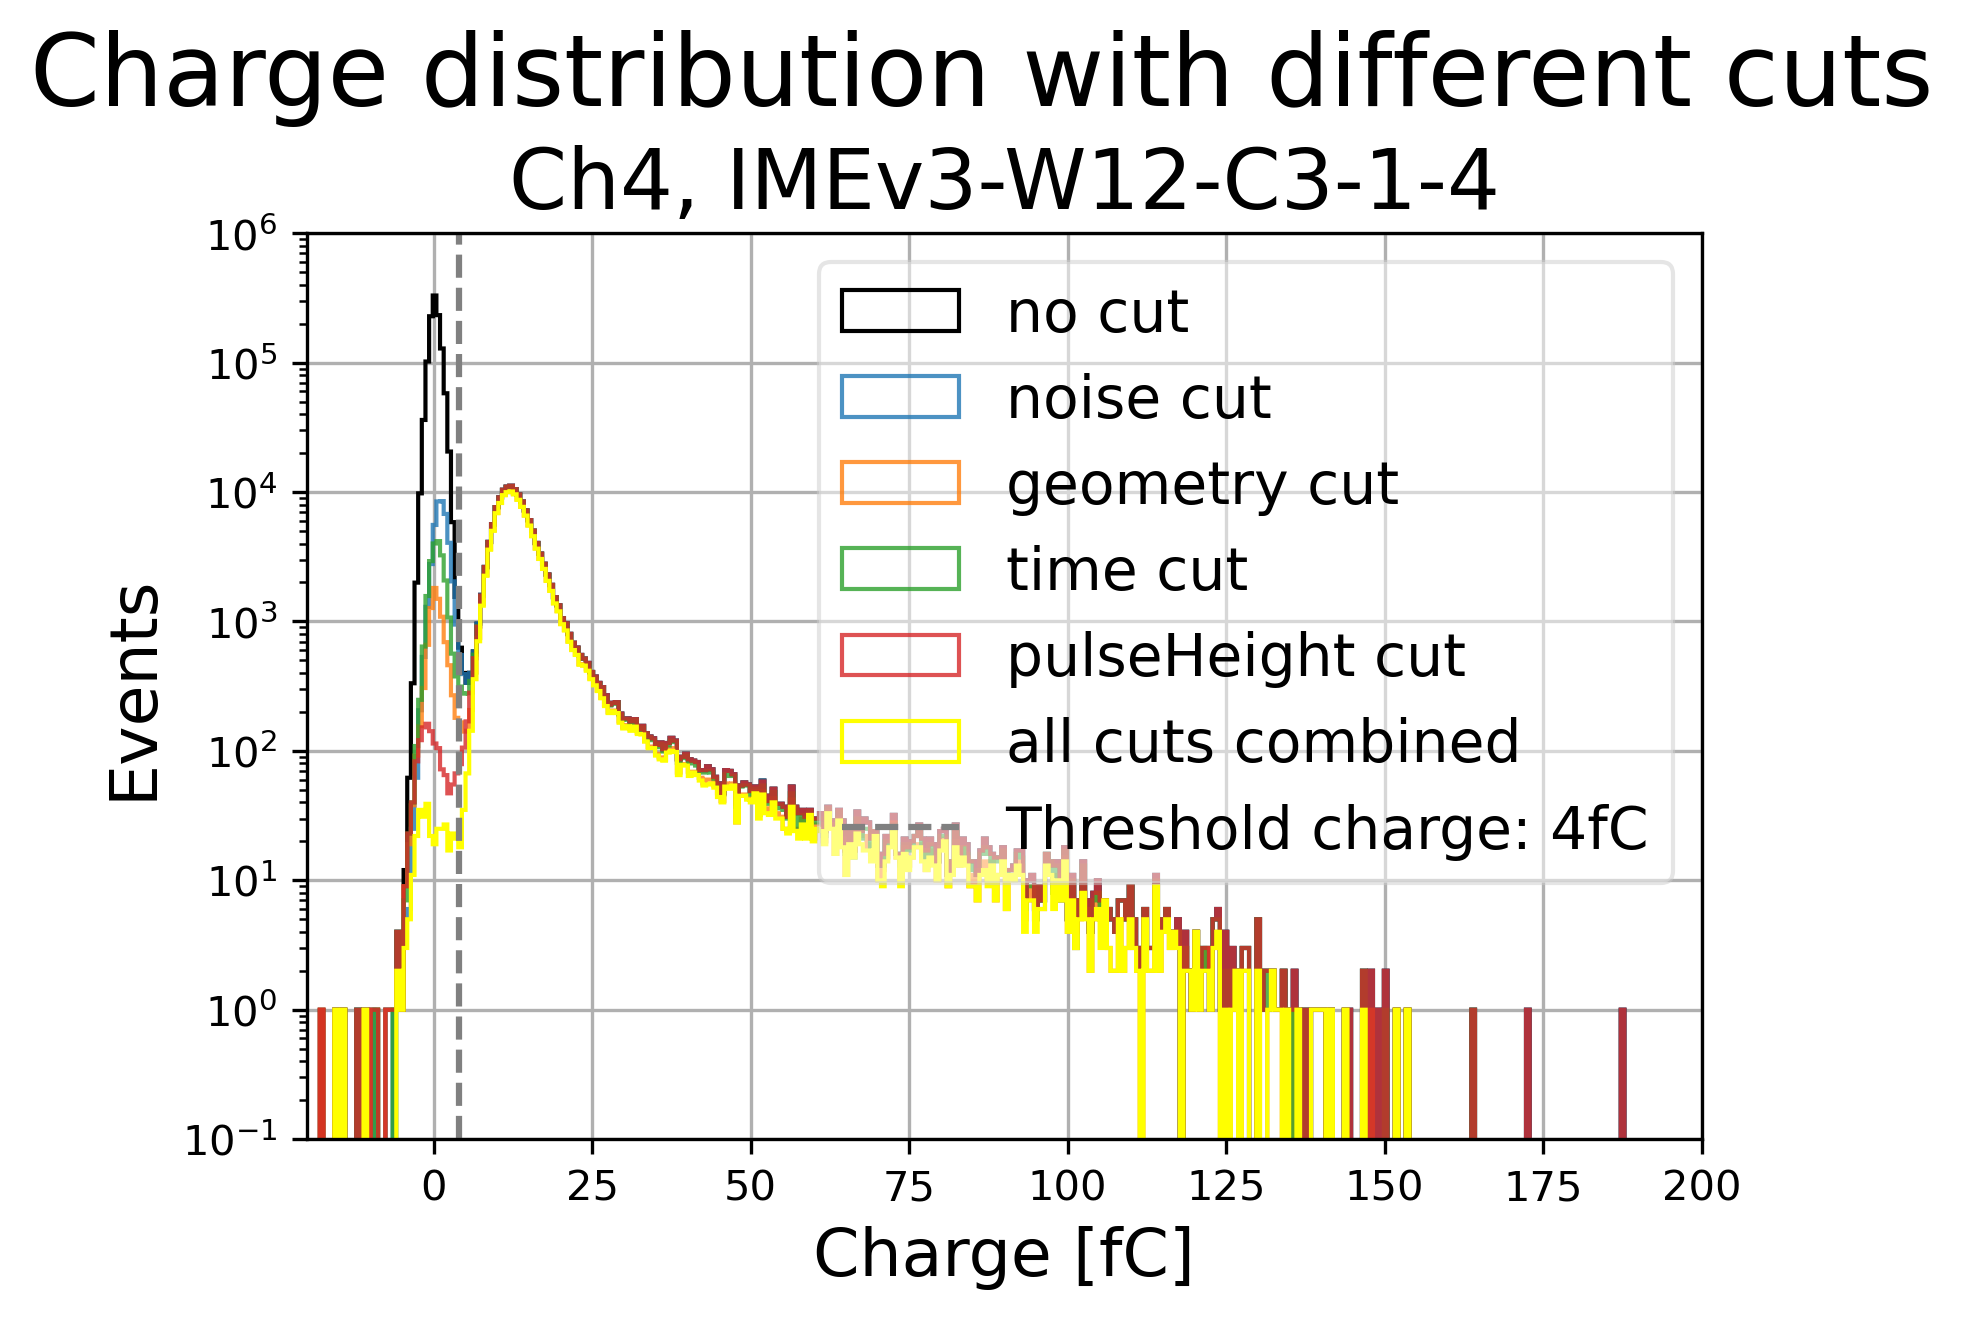

In [36]:

fig, axes = plt.subplots(figsize=(6*len(DUTs),4), ncols=len(DUTs), dpi=300)

### if there is only on dut
if len(DUTs)==1: axes = [axes]

transimpedance = [4700]*3   ### apparently the transimpedance is wrong

for i,dut in enumerate(DUTs):
    hist,my_bins,_,_,_ = plot_histogram(df[f'charge_{dut}']/transimpedance[dut-1], bins=1000,
                                          color=colormap[0], label=f"no cut",
                                          fig_ax=(fig,axes[i]))
    
    his_noise_cut,_,_,_,_ = plot_histogram((df[f'charge_{dut}'].loc[noise_cuts[dut-1]]/transimpedance[dut-1]), bins=my_bins,
                                                   histtype='step', alpha=.8, label=f"noise cut",
                                                   fig_ax=(fig,axes[i]))
    
    hist_geo_cut,_,_,_,_ = plot_histogram((df[f'charge_{dut}'].loc[geo_cuts[dut-1]]/transimpedance[dut-1]), bins=my_bins,
                                                   histtype='step', alpha=.8, label=f"geometry cut",
                                                   fig_ax=(fig,axes[i]))
    
    hist_time_cut,_,_,_,_ = plot_histogram((df[f'charge_{dut}'].loc[time_cuts[dut-1]]/transimpedance[dut-1]), bins=my_bins,
                                                   histtype='step', alpha=.8, label=f"time cut",
                                                   fig_ax=(fig,axes[i]))
    
    hist_pulse_cut,_,_,_,_ = plot_histogram((df[f'charge_{dut}'].loc[pulse_cuts[dut-1]]/transimpedance[dut-1]), bins=my_bins,
                                                   histtype='step', alpha=.8, label=f"pulseHeight cut",
                                                   fig_ax=(fig,axes[i]))
    
    hist_all_cut,_,_,_,_ = plot_histogram((df[f'charge_{dut}'].loc[all_cuts[dut-1]]/transimpedance[dut-1]), bins=my_bins,
                                                   histtype='step', alpha=1, label=f"all cuts combined", color='yellow',
                                                   fig_ax=(fig,axes[i]))
    
    bins_centers = (my_bins[1:]+my_bins[:-1])/2
    bins_centers = bins_centers.astype(np.float64)
    
#     param, covar = charge_fit(df, dut, mask=all_cuts[dut-1], transimpedance=4700, bins=my_bins, show_plot=True)
#     axes[i].plot(bins_centers, np.array(pylandau.langau(bins_centers, *param)))
    
    axes[i].axvline(threshold_charge, linestyle='--', color='grey', label=f'Threshold charge: {threshold_charge}fC')
    
    axes[i].semilogy()
    axes[i].set_xlim(-20, 200)
    axes[i].set_ylim(1e-1,1e6)
    axes[i].set_xlabel("Charge [fC]", fontsize=16)
    axes[i].set_ylabel("Events", fontsize=16)
    axes[i].grid('--')
    axes[i].set_title(f"Ch{dut+1}, {dict_of_batches[this_batch].S[S].get_sensor(f'Ch_{dut+1}').name}",fontsize=20)
    
    ### if I want to hightlight an interval
#     interesting_interval = (5,40)
#     axes[i].axvspan(*interesting_interval, ymin=0, ymax=1, alpha=0.4, color='red', label='Events?')
    axes[i].legend(fontsize=14, framealpha=.5)

fig.suptitle(f"Charge distribution with different cuts", fontsize=24, y=1.05)

if SAVE:
    fig.savefig(os.path.join(pres_path,f'Charge_distribution_different_cuts_batch_{this_batch}_{S}_DUTs_{duts_string}.png'), bbox_inches='tight')

### Gaussian*Langau fit


#### Saving the charge data (with cuts) into .csv so that I can fit it with ROOT

In [43]:
### I save these in the main directory of each batch (not detailed analysis, 'pres_path') because I want
### to replace the older plots (that might be less tuned)
batch_path = f"/home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/{this_batch}"
ROOT_fit_dir = f"/home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/testbeam-analysis/ROOT_Langaus_fit/"
my_transimpedance = 4700

for dut in DUTs:
    ### this is the old fit, shouldn't be necessary anymore
#     charge_fit(df, dut, mask=all_cuts[dut-1], transimpedance=my_transimpedance, bins=charge_bins,
#               show_plot=True, savefig=False)#os.path.join(pres_path,f"charge_plot_fit_{this_batch}_{S}_{dut}.png"))

#     np.savetxt(os.path.join(batch_path, f"charge_data_all_cuts_{this_batch}_{S}_{dut}.csv"),
#                df[f'charge_{dut}'].loc[all_cuts[dut-1]]/my_transimpedance, delimiter=',')
#     os.chdir(ROOT_fit_dir)
    run_root_string = f'root -b -q "{ROOT_fit_dir}charge_fit.C({this_batch},\\"{S}\\",{dut})"'
    os.system(run_root_string)

   ------------------------------------------------------------------
  | Welcome to ROOT 6.30/04                        https://root.cern |
  | (c) 1995-2024, The ROOT Team; conception: R. Brun, F. Rademakers |
  | Built for linuxx8664gcc on Mar 04 2024, 12:51:52                 |
  | From heads/latest-stable@                                        |
  | With c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0                   |
  | Try '.help'/'.?', '.demo', '.license', '.credits', '.quit'/'.q'  |
   ------------------------------------------------------------------


Processing /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/testbeam-analysis/ROOT_Langaus_fit/charge_fit.C(401,"S1",3)...
size: 128384
Fitting...
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      189.607
NDf                       =           41
Edm                       =  3.09955e-06
NCalls                    =          240
Width                     =     0.692731  

Info in <TCanvas::Print>: SVG file /home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/various plots/all batches/401/charge_data_all_cuts_401_S1_3_Charge_fit_ROOT_double_plot.svg has been created


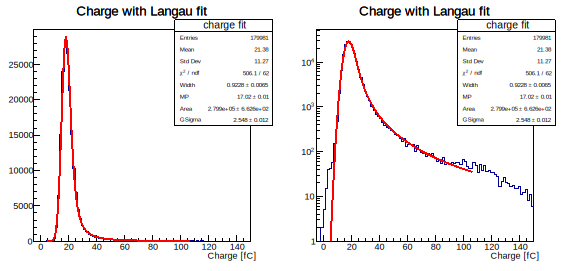

In [44]:
dut = 1
# SVG(f"../various plots/all batches/{this_batch}/charge_data_all_cuts_{this_batch}_{S}_{dut}_Charge_fit_ROOT_double_plot.svg")
SVG(os.path.join(batch_path,f"charge_data_all_cuts_{this_batch}_{S}_{dut}_Charge_fit_ROOT_double_plot.svg"))

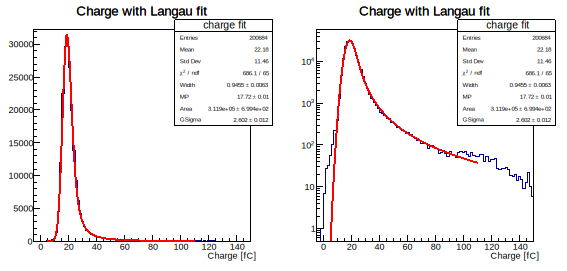

In [46]:
dut = 2
SVG(os.path.join(batch_path,f"charge_data_all_cuts_{this_batch}_{S}_{dut}_Charge_fit_ROOT_double_plot.svg"))


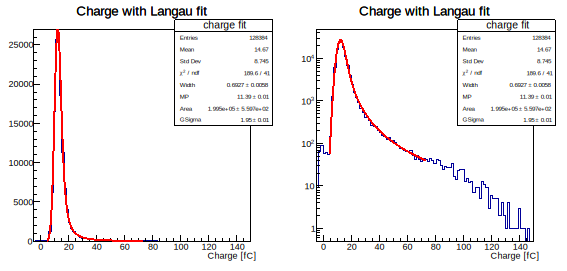

In [47]:
dut = 3
SVG(os.path.join(batch_path,f"charge_data_all_cuts_{this_batch}_{S}_{dut}_Charge_fit_ROOT_double_plot.svg"))


#### Charge vs pulseHeight
Plots of charge vs pulseHeight to show that the worse fit in the tail of the gaussian is caused by the clipping of the pulses

[INFO] -	 First charge estimate: 12.236885070800781
/tmp/ipykernel_671675/3493341570.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axes[0].plot(np.array(pylandau.langau(bins_centers, *param)), np.array(bins_centers), label="Landau*Gauss fit")


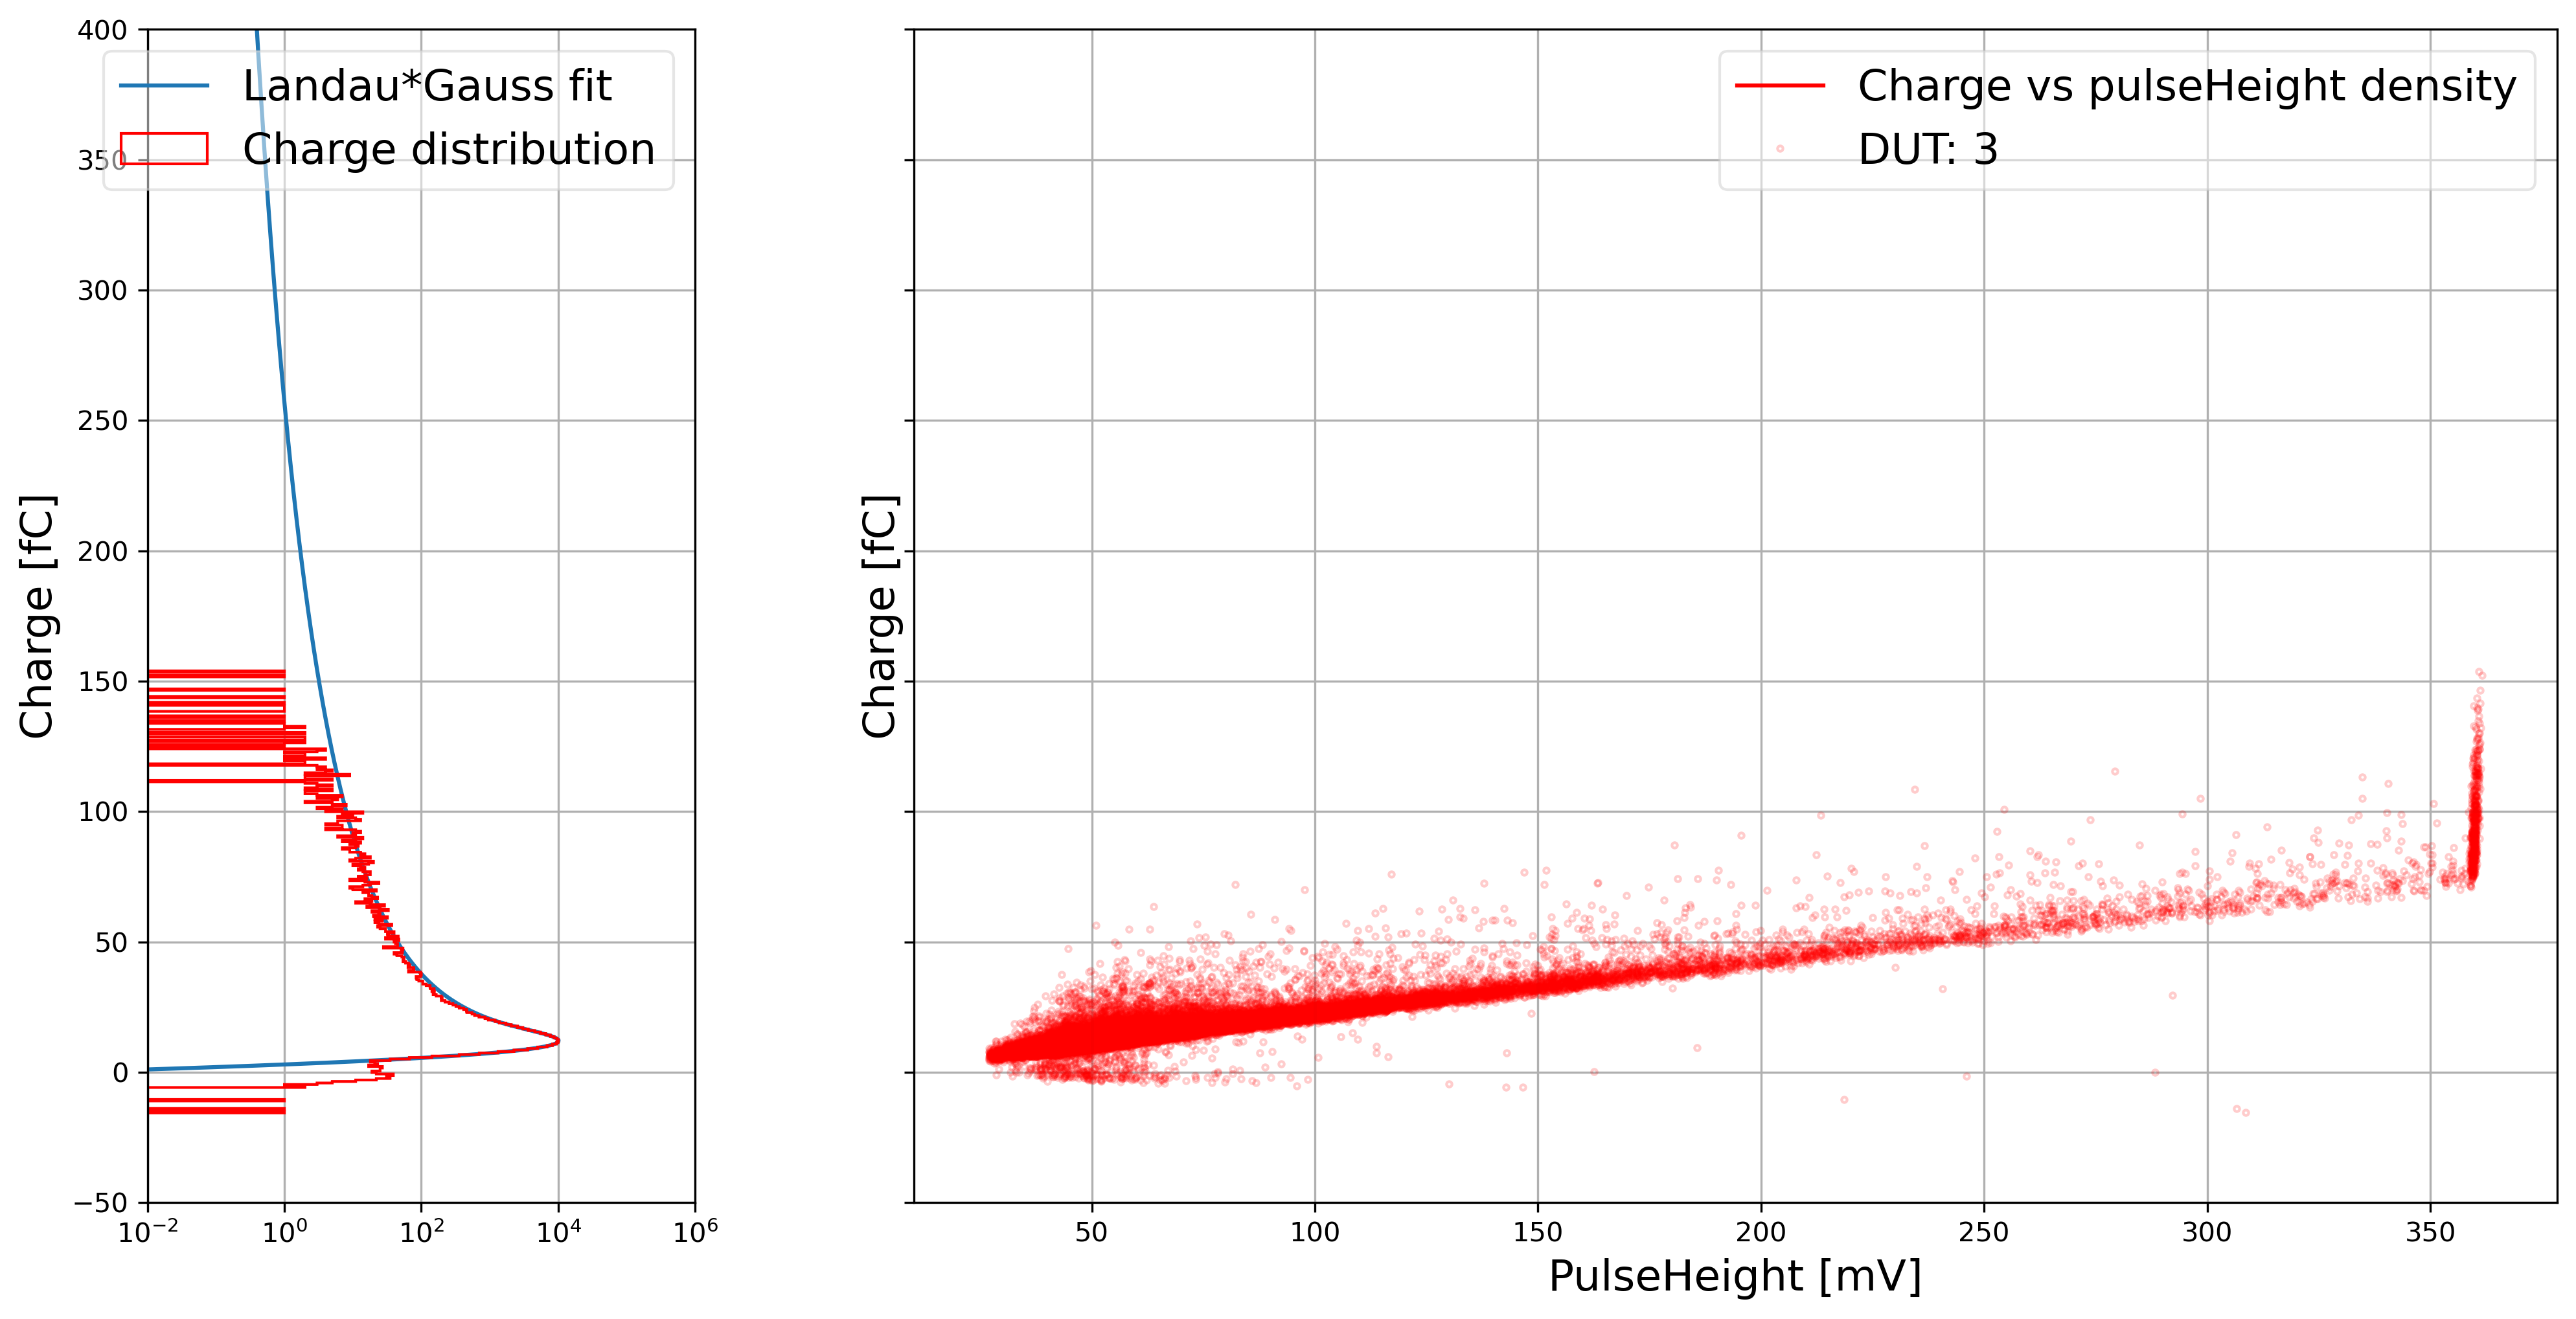

In [49]:
### relevant for batch 413 S2

fig, axes = plt.subplots(figsize=(16,8), nrows=1, ncols=2, dpi=300, sharey=True, gridspec_kw={'width_ratios':[1,3]})#, subplot_kw={'projection':'scatter_density'})

one_dut = 3
for dut in [one_dut]: ### DUTs or [1,2,3]
    pulseHeight = np.array(df[f'pulseHeight_{dut}'].loc[all_cuts[dut-1]])
    charge = np.array(df[f'charge_{dut}'].loc[all_cuts[dut-1]]/transimpedance[dut-1])
    axes[1].plot([],[], color=colormap[dut], label=f"Charge vs pulseHeight density")
    axes[1].plot(pulseHeight, charge,
              color=colormap[dut], marker='o', markersize=2, linewidth=0, mfc='none', alpha=.2,
              label=f"DUT: {dut}")
    
    bins_centers = (my_bins[1:]+my_bins[:-1])/2
    bins_centers = bins_centers.astype(np.float64)
    ### this is not as accurate as the ROOT fit, only useful to get an idea
    param, covar = charge_fit(df, dut, mask=all_cuts[dut-1], transimpedance=4700, bins=my_bins, show_plot=False)
    axes[0].plot(np.array(pylandau.langau(bins_centers, *param)), bins_centers, label="Landau*Gauss fit")
    
    plot_histogram(charge, bins=my_bins,
                   histtype='step', alpha=1, label=f"Charge distribution", color=colormap[dut],
                   fig_ax=(fig,axes[0]), orientation='horizontal')

    
axes[0].set_ylabel("Charge [fC]",fontsize=16)
axes[1].set_ylabel("Charge [fC]",fontsize=16)
axes[1].set_xlabel("PulseHeight [mV]",fontsize=16)

axes[0].semilogx()
axes[0].set_xlim(1e-2,1e6)
axes[0].set_ylim(-50,400)

axes[1].grid('--')

# fig.legend(fontsize=16)
axes[0].legend(fontsize=16, loc='upper right', framealpha=.5)
axes[1].legend(fontsize=16, loc='upper right', framealpha=.5)

if SAVE:
    fig.savefig(os.path.join(pres_path,f'Charge_vs_pulseHeight_density_{this_batch}_{S}_dut{one_dut}.png'), bbox_inches='tight')

# Time resolution


Fit parameters: [ 3352.37705527 -6051.96065193    60.94693301    56.71197689]


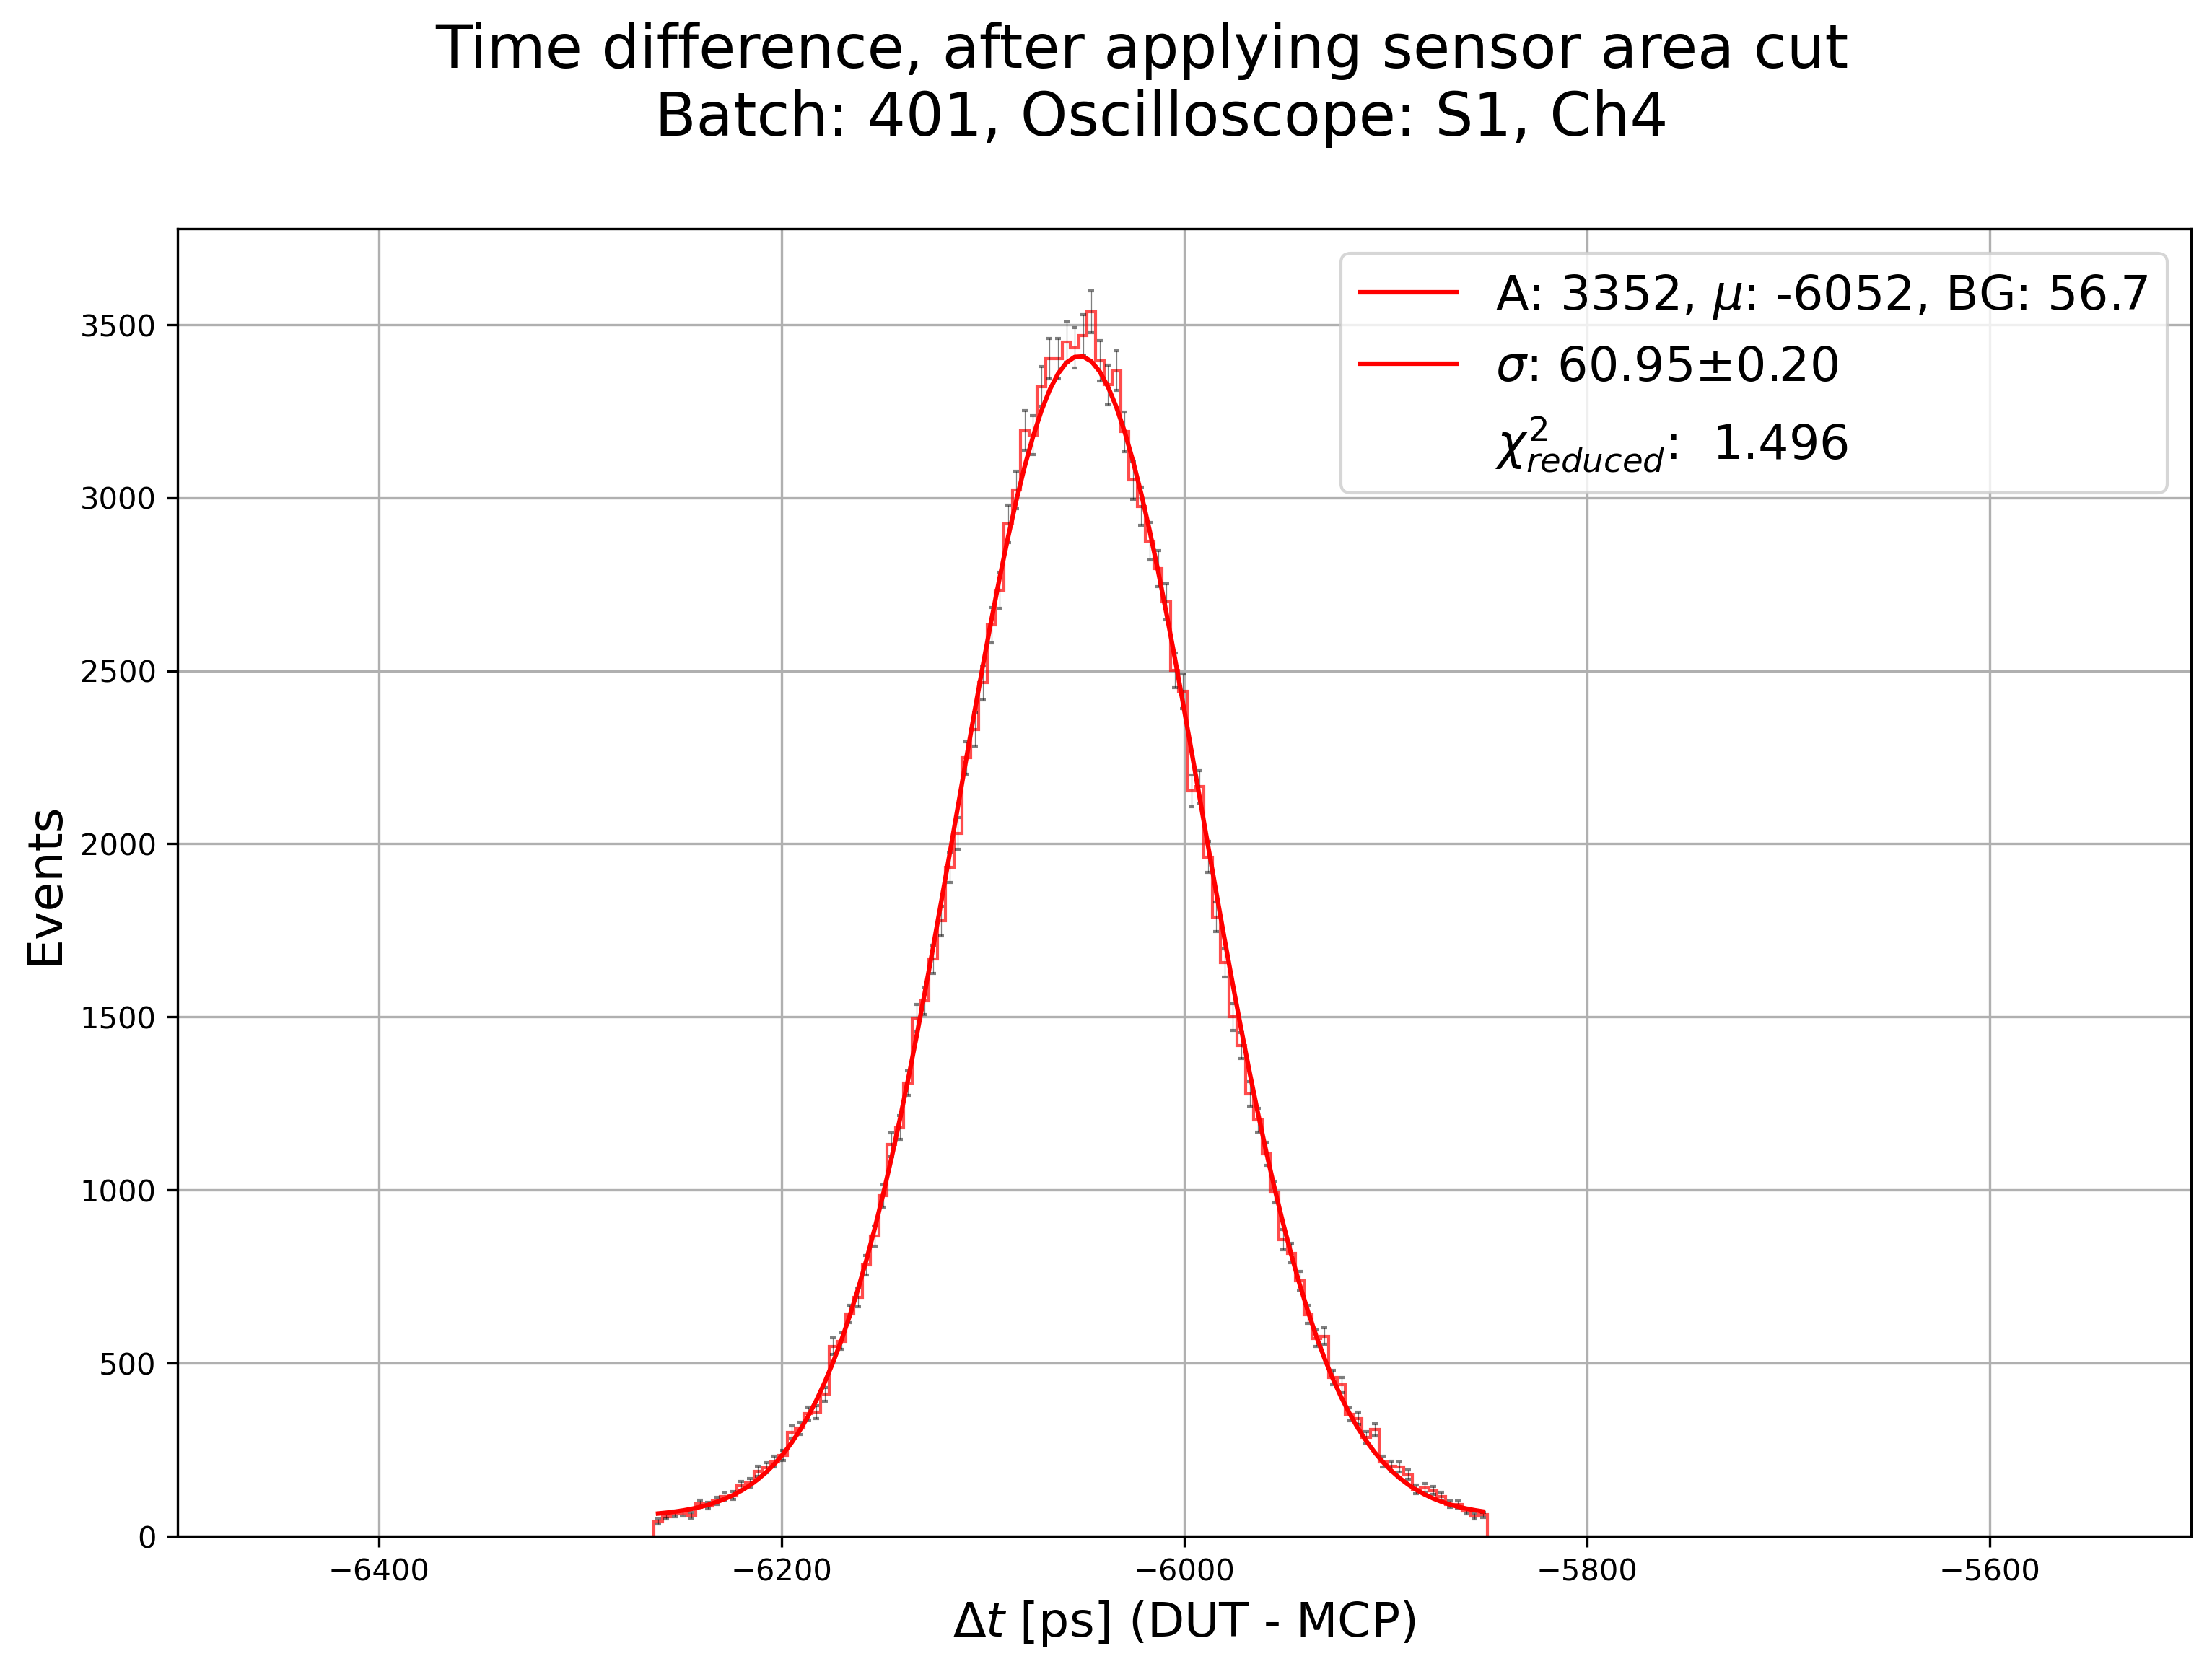

In [57]:
fig, axes = plt.subplots(figsize=(12,8),nrows=1, ncols=1, dpi=300)

time_bins = 100

for dut in DUTs:
    window_limit = 20e3
    time_data = df[f"timeCFD20_{dut}"]-df["timeCFD50_0"]
#     window_fit = np.logical_and(time_data> -window_limit,
#                                time_data< +window_limit)

    charge_cut = df[f"charge_{dut}"] > threshold_charge

    fit_cut = np.logical_and(np.logical_and(np.logical_and(time_cuts[dut-1], geo_cuts[dut-1]), charge_cut), noise_cuts[dut-1])
    
    ### histogram to plot
    hist, my_bins,_,_,_ = plot_histogram((time_data.loc[fit_cut]), poisson_err=True,
                                         bins=time_bins, color=colormap[dut], linewidth=1, alpha=0.7,
                                         fig_ax=(fig,axes))

    sigma = np.sqrt(hist) + 1  ### poissonian error
    
    bins_centers = (my_bins[:-1]+my_bins[1:])/2
    initial_param = (np.max(hist),bins_centers[np.argmax(hist)],100,np.average(hist))
    param, covar = curve_fit(my_gauss, bins_centers, hist, p0=initial_param, sigma=sigma, absolute_sigma=True)
    
    chi2_reduced = np.sum(((hist - my_gauss(bins_centers,*param)) / sigma)**2) / (len(hist)-len(param))
    R2_adjusted = 1 - (sum((hist - my_gauss(bins_centers,*param))**2)/(len(hist)-len(param)-1) / (np.std(hist)**2/(len(hist)-1)) )
    print(f"Fit parameters: {param}")
    axes.plot(bins_centers, my_gauss(bins_centers,*param), color=colormap[dut])
    
    ### add units to the parameters
    axes.plot([],[],color=colormap[dut], label="A: %.0f, $\mu$: %.0f, BG: %.1f" %(param[0],param[1],param[3])) # only two decimals
    axes.plot([],[],color=colormap[dut], label="$\sigma$: %.2f$\pm$%.2f" %(param[2],covar[2,2]**.5))
    axes.plot([],[], linewidth=0, label="$\chi^2_{reduced}$: "+f" {chi2_reduced:.3f}")
#     axes.plot([],[], linewidth=0, label="$R^2$: "+f" {R2_adjusted:.3f}")

axes.set_xlabel(f"$\Delta t$ [ps] (DUT - MCP)", fontsize=16)
axes.set_ylabel("Events", fontsize=16)

xlim = (-6.5e3,-5.5e3)
# xlim = (-10e3,0)
axes.set_xlim(xlim)
axes.legend(fontsize=16)

fig.suptitle(f"Time difference, after applying sensor area cut \
\n Batch: {this_batch}, Oscilloscope: {S}, Ch{dut+1}",y=1, fontsize=20)

if SAVE:
    fig.savefig(os.path.join(pres_path, f"time_difference_{this_batch}_{S}_zoomed_and_gauss_fit_with_cuts_DUTs_{duts_string}.png"), bbox_inches="tight")

In [68]:
time_resolution, time_resolution_error = error_propagation(param[2], covar[2,2]**.5, 36.52, 0.81 )
print(f"TIME RESOLUTION using the whole sensor surface:\n {time_resolution:.2f}", "+/-",f"{time_resolution_error:.2f} ps")

TIME RESOLUTION using the whole sensor surface:
 49.38 +/- 0.81 ps


### Now trying only the central 0.5x0.5 mm²
Better $\chi^2$ but maybe just because the (the relative) errors are bigger.

There is a significant loss of the total amount of data which doesn't seem to be bring improvements

Fit parameters: [  725.47409138 -6051.02578522    61.41713667     7.50700965]


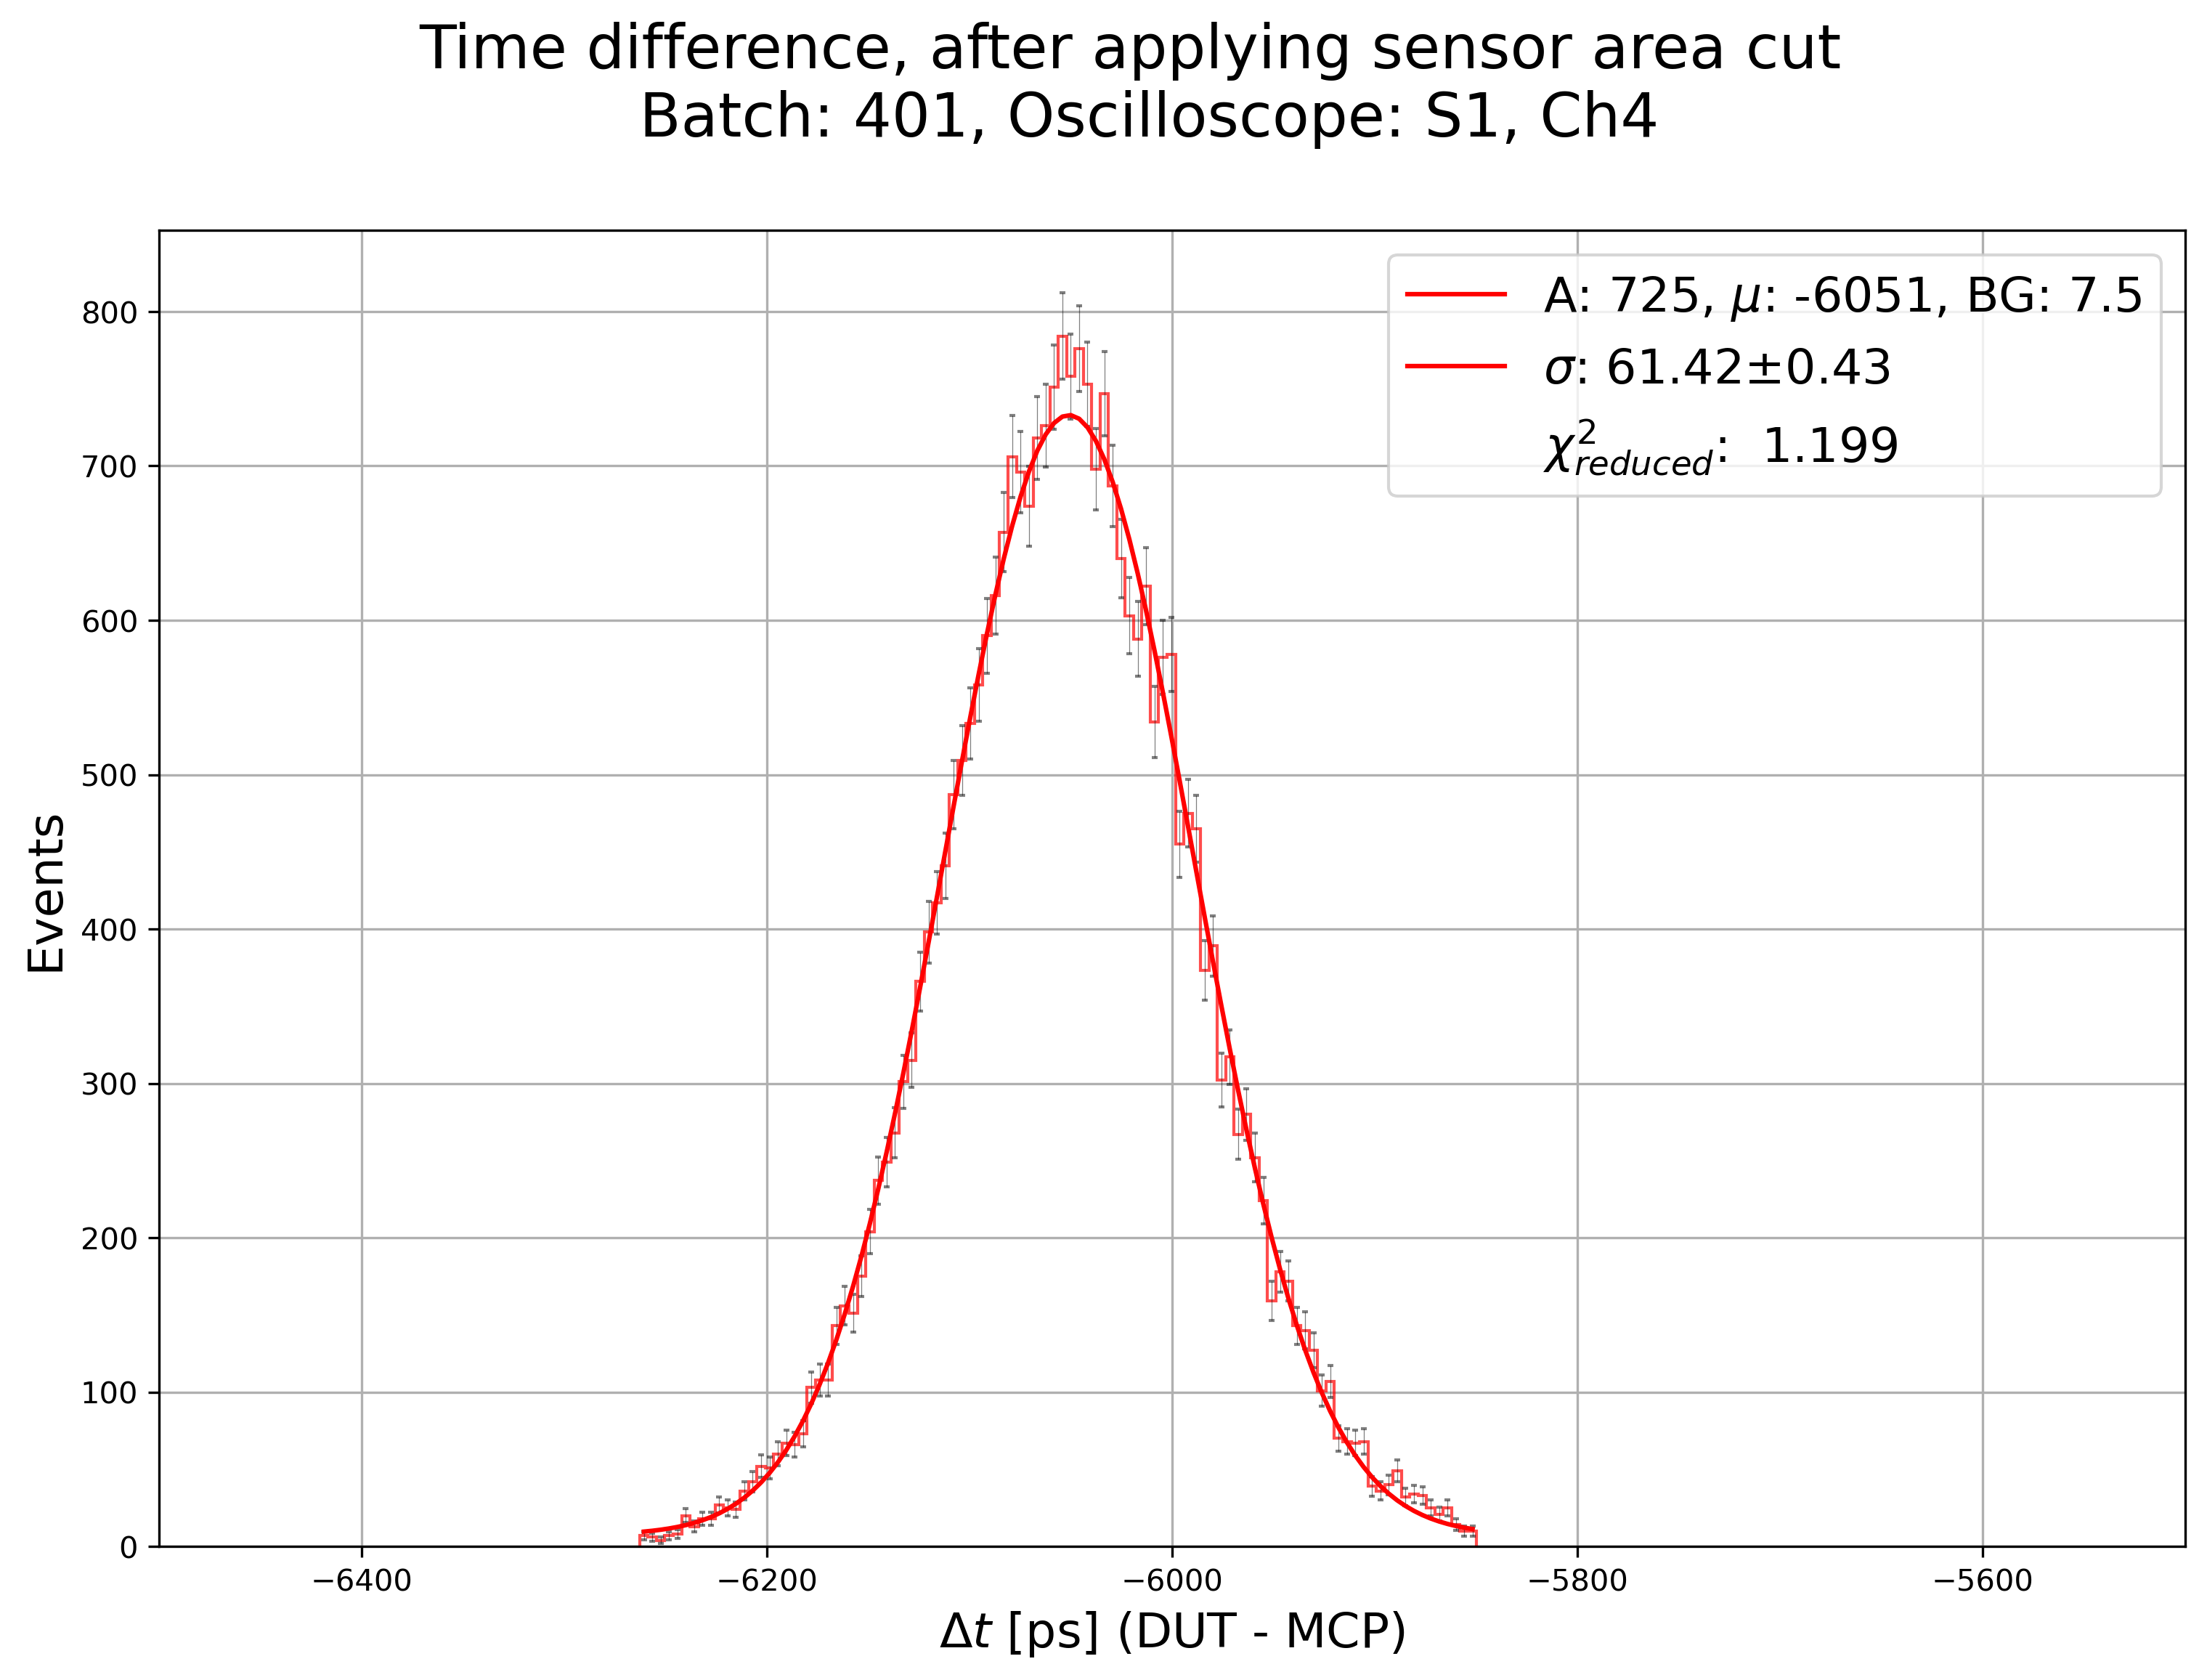

In [66]:
### ONLY CENTRAL AREA
fig, axes = plt.subplots(figsize=(12,8),nrows=1, ncols=1, dpi=300)

for dut in DUTs:
    window_limit = 20e3
    time_data = df[f"timeCFD20_{dut}"]-df["timeCFD50_0"]
#     window_fit = np.logical_and(time_data> -window_limit,
#                                time_data< +window_limit)

    charge_cut = df[f"charge_{dut}"] > threshold_charge
    
    fit_cut = np.logical_and(np.logical_and(np.logical_and(time_cuts[dut-1], central_sensor_area_cuts[dut-1]), charge_cut), noise_cuts[dut-1])
    
    hist, my_bins,_,_,_ = plot_histogram((time_data.loc[fit_cut]), poisson_err=True,
                                         bins=time_bins, color=colormap[dut], linewidth=1, alpha=0.7,
                                         fig_ax=(fig,axes))

    sigma = np.sqrt(hist) + 1  ### poissonian error
    
    bins_centers = (my_bins[:-1]+my_bins[1:])/2
    initial_param = (np.max(hist),bins_centers[np.argmax(hist)],100,np.average(hist))
    param, covar = curve_fit(my_gauss, bins_centers, hist, p0=initial_param, sigma=sigma, absolute_sigma=True)
    
    chi2_reduced = np.sum(((hist - my_gauss(bins_centers,*param)) / sigma)**2) / (len(hist)-len(param))
#     R2_adjusted = 1 - (sum((hist - my_gauss(bins_centers,*param))**2)/(len(hist)-len(param)-1) / (np.std(hist)**2/(len(hist)-1)) )
    print(f"Fit parameters: {param}")
    axes.plot(bins_centers, my_gauss(bins_centers,*param), color=colormap[dut])

    ### add units to the parameters
    axes.plot([],[],color=colormap[dut], label="A: %.0f, $\mu$: %.0f, BG: %.1f" %(param[0],param[1],param[3])) # only two decimals
    axes.plot([],[],color=colormap[dut], label="$\sigma$: %.2f$\pm$%.2f" %(param[2],covar[2,2]**.5))
    axes.plot([],[], linewidth=0, label="$\chi^2_{reduced}$: "+f" {chi2_reduced:.3f}")
#     axes.plot([],[], linewidth=0, label="$R^2$: "+f" {R2_adjusted:.3f}")

axes.set_xlabel(f"$\Delta t$ [ps] (DUT - MCP)", fontsize=16)
axes.set_ylabel("Events", fontsize=16)

xlim = (-6.5e3,-5.5e3)
# xlim = (-10e3,0)
axes.set_xlim(xlim)
axes.legend(fontsize=16)

fig.suptitle(f"Time difference, after applying sensor area cut \
\n Batch: {this_batch}, Oscilloscope: {S}, Ch{dut+1}",y=1, fontsize=20)

if SAVE:
    fig.savefig(os.path.join(pres_path, f"time_difference_{this_batch}_{S}_zoomed_and_gauss_fit_with_cuts_central_area_DUTs_{duts_string}.png"), bbox_inches="tight")

In [69]:
time_resolution, time_resolution_error = error_propagation(param[2], covar[2,2]**.5, 36.52, 0.81 )
print("TIME RESOLUTION using only the central area of the sensor:\n", time_resolution, "+/-", time_resolution_error)

TIME RESOLUTION using only the central area of the sensor:
 49.379694978658215 +/- 0.806292310715718


### Now using bootstrap method to estimate the statistical uncertainty [REMOVED]


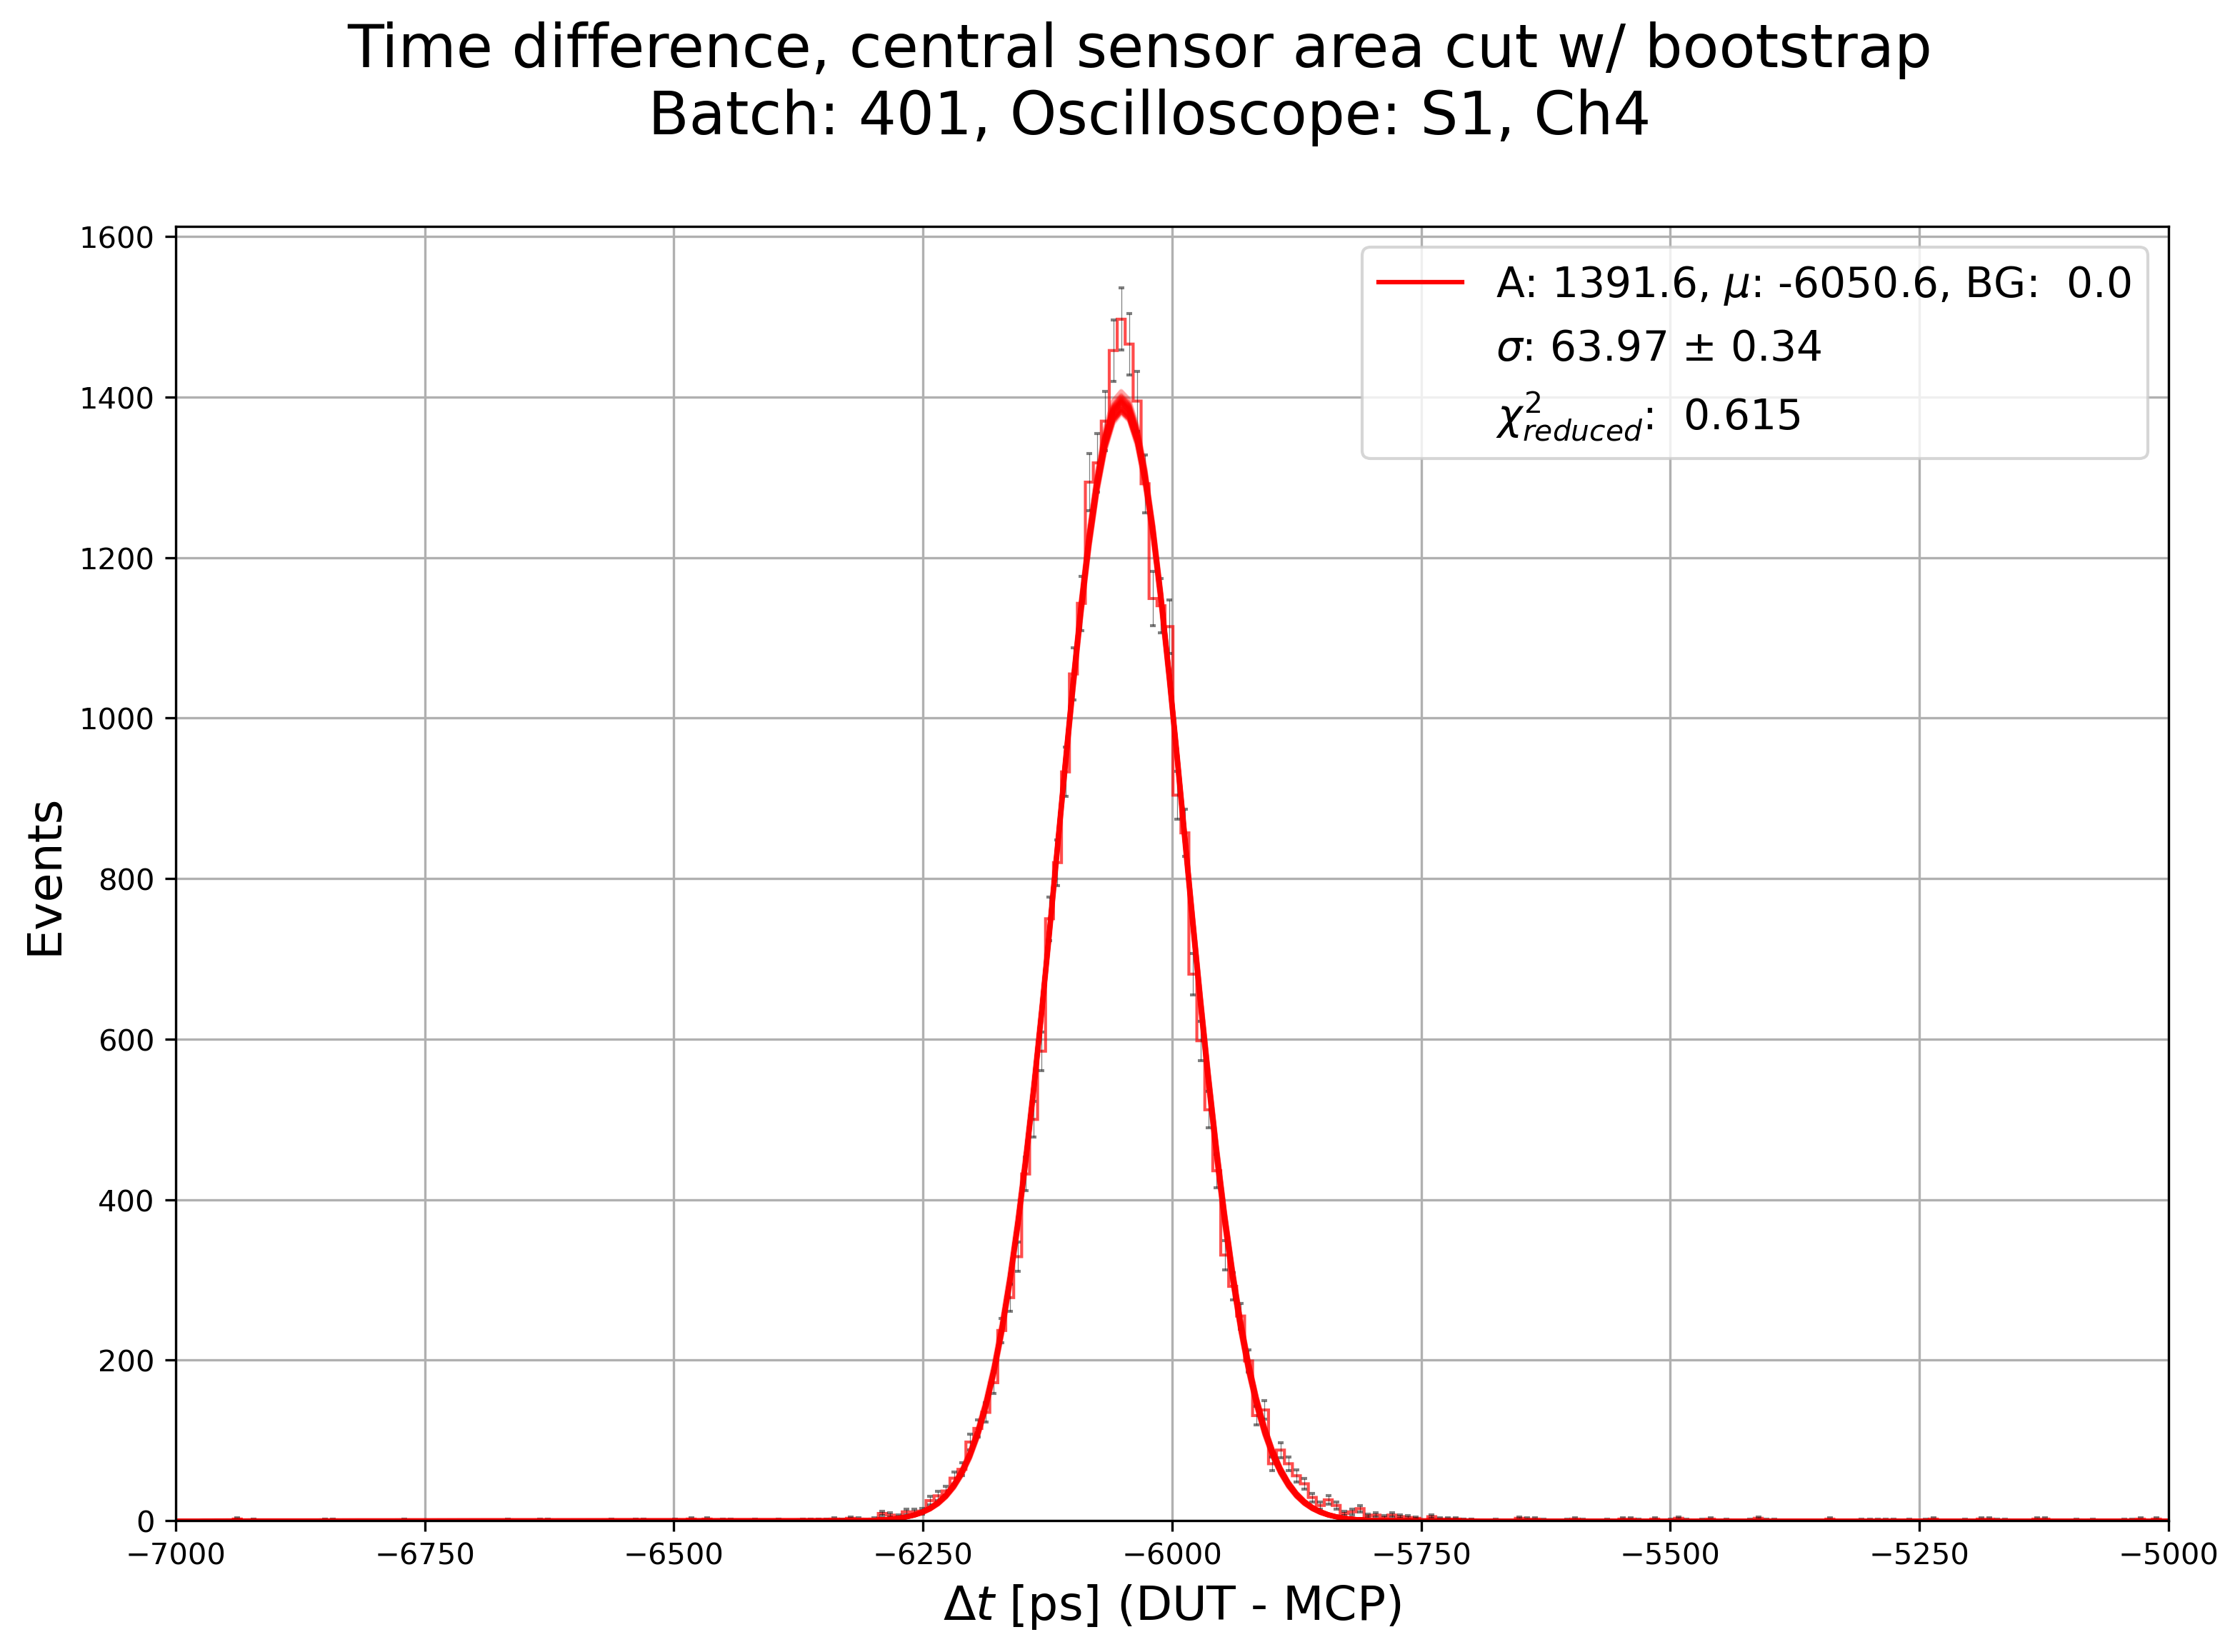

In [70]:
### WITH BOOTSTRAP
fig, axes = plt.subplots(figsize=(12,8),nrows=1, ncols=1, dpi=300)
time_bins = 5000
for dut in DUTs:
    window_limit = 20e3
    time_data = df[f"timeCFD20_{dut}"]-df["timeCFD50_0"]
    window_fit = np.logical_and(time_data> -window_limit,
                               time_data< +window_limit)

#     fit_cut = np.logical_and(np.logical_and(window_fit, geo_cuts[dut-1]),pulse_clipping)
    
    fit_cut = np.logical_and(window_fit, central_sensor_area_cuts[dut-1])
    
    hist, my_bins,_,_,_ = plot_histogram(time_data.loc[fit_cut], bins=time_bins,
                                          color=colormap[dut], alpha=0.7, poisson_err=True, #density=True,
                                         fig_ax=(fig,axes))
    ### (poissonian) error
    hist_error = (hist)**.5 + 1
    ### to rescale the histogram after 
    density_factor = sum(hist*np.diff(my_bins))
    
    bins_centers = (my_bins[:-1]+my_bins[1:])/2
    initial_param = (np.max(hist),bins_centers[np.argmax(hist)],100,np.average(hist))
#     initial_param = (np.max(hist),bins_centers[np.argmax(hist)],100,)
    
    bootstrap_sample = 50
    param_list = np.zeros(shape=(bootstrap_sample, len(initial_param)))
    covar_list = np.zeros(shape=(bootstrap_sample, len(initial_param), len(initial_param)))
    for i in range(bootstrap_sample):
        resampled_hist = np.random.choice(bins_centers, size=len(time_data.loc[fit_cut]), p=hist/np.sum(hist))
        hist_sample, _ = np.histogram(resampled_hist, bins=my_bins, density=True)

        initial_param = (np.max(hist_sample), bins_centers[np.argmax(hist_sample)], 100, np.average(hist_sample))
#         initial_param = (np.max(hist_sample), bins_centers[np.argmax(hist_sample)], 100)
        param, covar = curve_fit(my_gauss, bins_centers, hist_sample, sigma=hist_error/density_factor, absolute_sigma=True,
                                 p0=initial_param, bounds=((0,-np.inf,0,0),(np.inf,np.inf,np.inf,np.inf)), nan_policy='omit')
        param_list[i] = param
        covar_list[i] = covar
        axes.plot(bins_centers, density_factor*my_gauss(bins_centers,*param), color=colormap[dut], linewidth=1.5, alpha=.2)

    final_param = param_list.mean(axis=0)
    final_param_err = param_list.std(axis=0)
    final_covar = covar_list.mean(axis=0)
    final_covar_err = covar_list.std(axis=0)
    ### calculate chi squared
    chi2_reduced = sum((hist - density_factor*my_gauss(bins_centers,*final_param))**2 / (hist_error)) / (len(hist)-len(final_param))
    
    axes.plot([],[], color=colormap[dut], label=f"A: {density_factor*final_param[0]:.1f}, $\mu$: {final_param[1]:.1f}, BG:  {density_factor*final_param[3]:.1f}") # only one decimal
    axes.plot([],[], linewidth=0, label=f"$\sigma$: {final_param[2]:.2f} $\pm$ {final_param_err[2]:.2f}")
    axes.plot([],[], linewidth=0, label="$\chi^2_{reduced}$: "+f" {chi2_reduced:.3f}")
    
axes.set_xlabel(f"$\Delta t$ [ps] (DUT - MCP)", fontsize=16)
axes.set_ylabel("Events", fontsize=16)

xlim = (-7e3,-5e3)
axes.set_xlim(xlim) ### use xlim from previous plots 
axes.legend(fontsize=14)

fig.suptitle(f"Time difference, central sensor area cut w/ bootstrap\
\n Batch: {this_batch}, Oscilloscope: {S}, Ch{dut+1}",y=1, fontsize=20)

if SAVE:
    fig.savefig(os.path.join(pres_path, f"time_difference_{this_batch}_{S}_zoomed_and_gauss_fit_central_area_bootstrap={bootstrap_sample}_DUTs_{duts_string}.png"), bbox_inches="tight")
    

## Efficiency

#### With NO cuts (only highlighting the central area square)

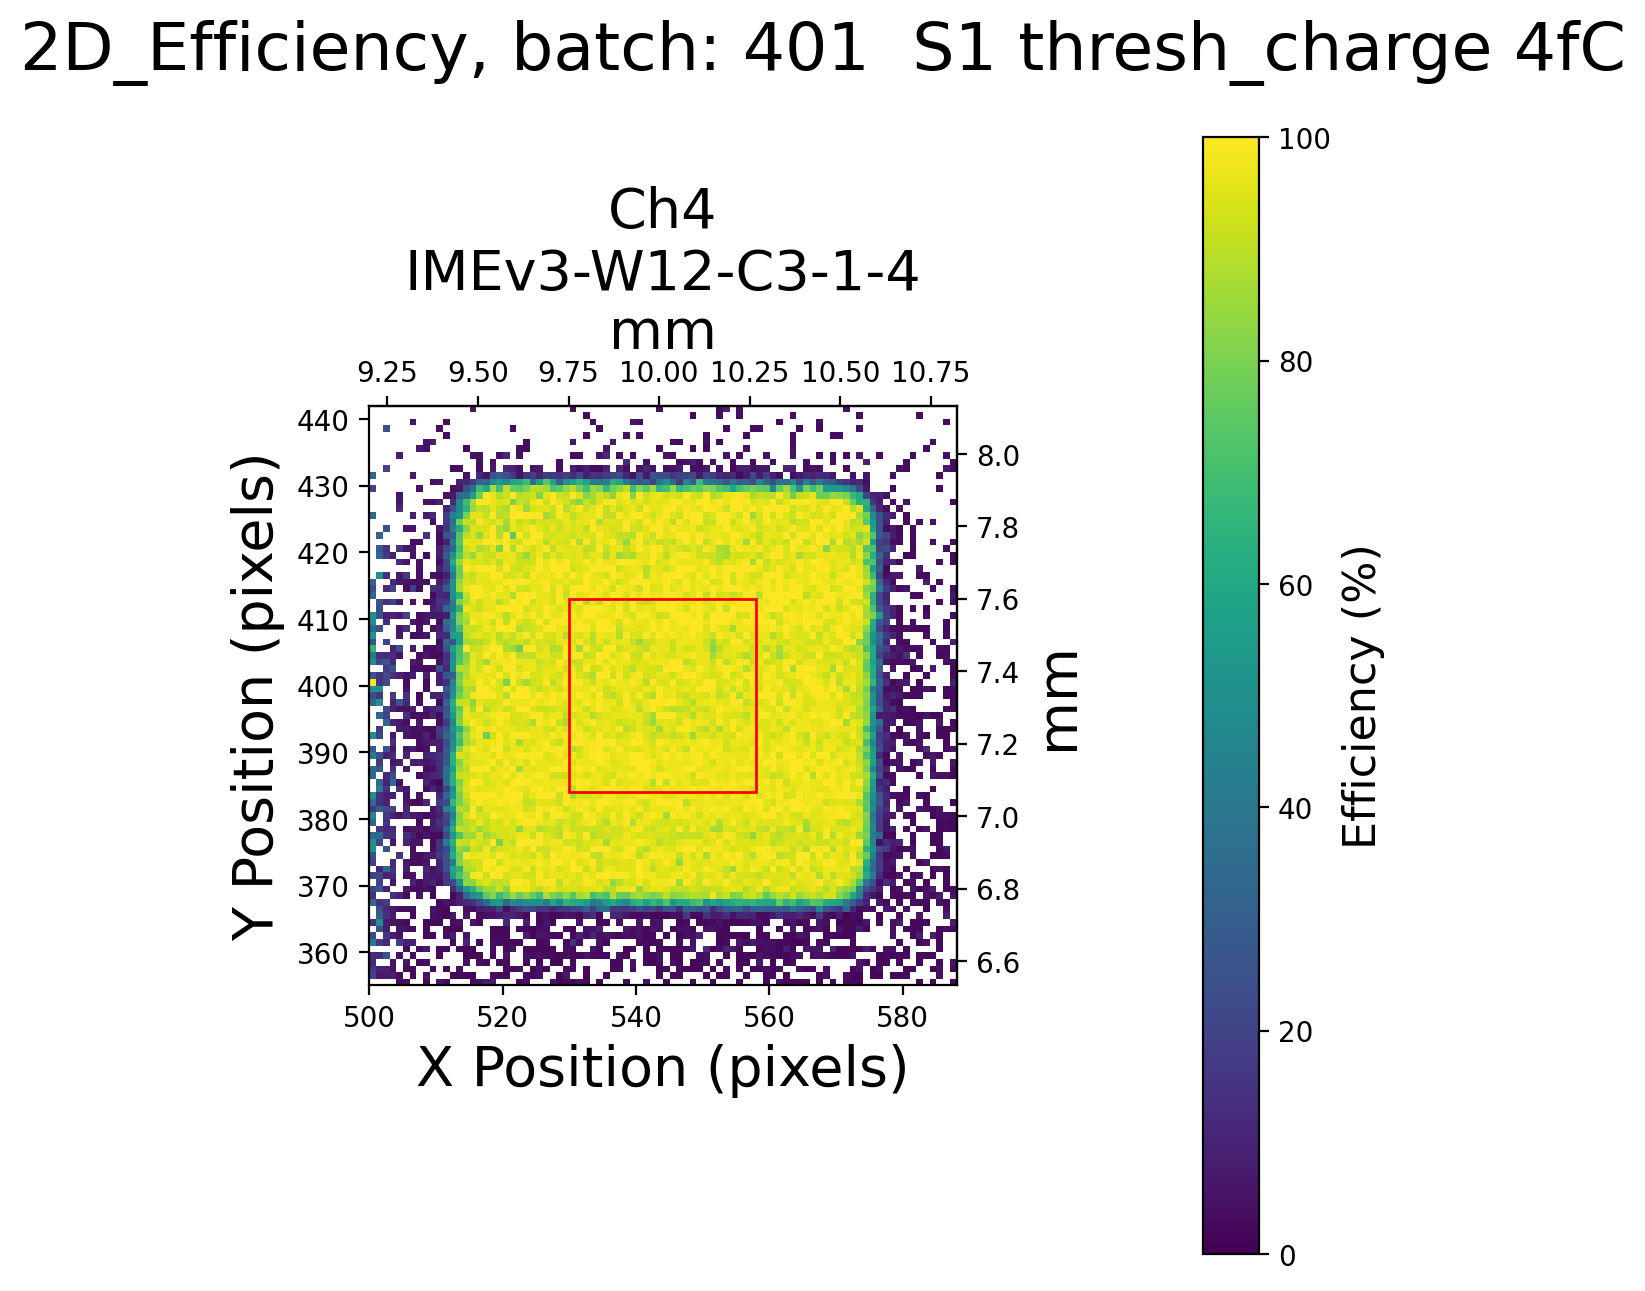

In [96]:
### without cuts (only selecting sensor area)

fig, axes = plot(df, "2D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, transimpedance=4700, geometry_cut='extended', zoom_to_sensor=True,
    bins=these_bins, n_DUT=DUTs, savefig=False, savefig_details=f' {S} thresh_charge {threshold_charge}fC', 
    savefig_path=pres_path, title_position=1.05, fmt='png')

### I want to draw the red square of the center onto these plots
for i,dut in enumerate(DUTs):
    axes[i].add_patch(rectangle_from_geometry_cut(**central_sensor_area_info[dut-1]))

if SAVE:
    fig.savefig(os.path.join(pres_path,f'2D Efficiency_{this_batch}_{S}_with_center_highlight_DUTs_{duts_string}.png'), bbox_inches='tight')
    

#### With time cuts

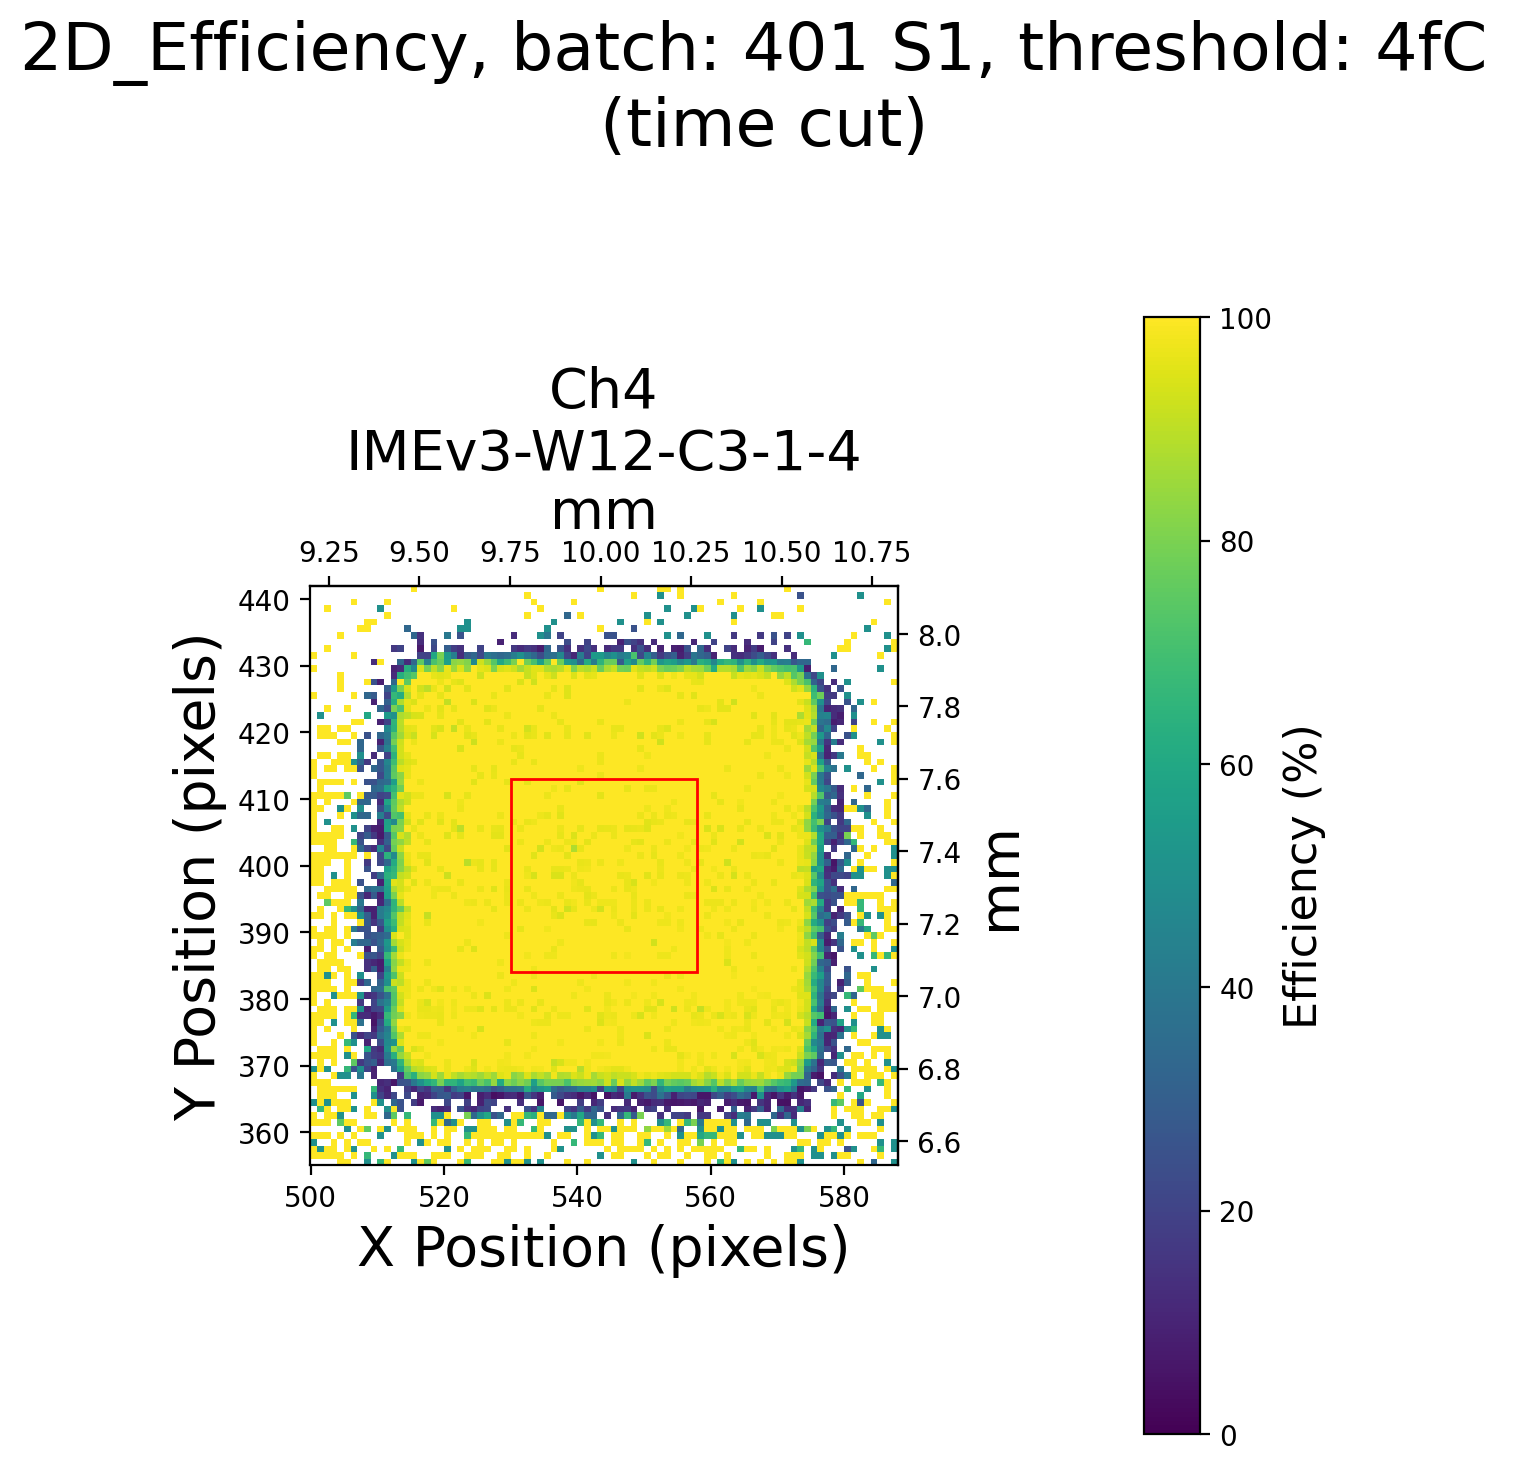

In [100]:
### with time cut

fig, axes = plot(df, "2D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, transimpedance=4700, geometry_cut='extended', zoom_to_sensor=True,
    bins=these_bins, n_DUT=DUTs, mask=time_cuts,
     savefig=False, savefig_details=f'{S}, threshold: {threshold_charge}fC \n(time cut)', savefig_path=pres_path, fmt='png')

### I want to draw the red square of the center onto these plots
for i,dut in enumerate(DUTs):
    axes[i].add_patch(rectangle_from_geometry_cut(**central_sensor_area_info[dut-1]))
#     axes[i].add_patch(rectangle_from_geometry_cut(**geo_infos[dut-1]))
    
if SAVE:
    fig.savefig(os.path.join(pres_path,f'2D Efficiency_{this_batch}_{S}_with_time_cut_with_center_highlight_DUTs_{duts_string}.png'), bbox_inches='tight')
    

#### 1D projection of the efficiency (no cuts)

''

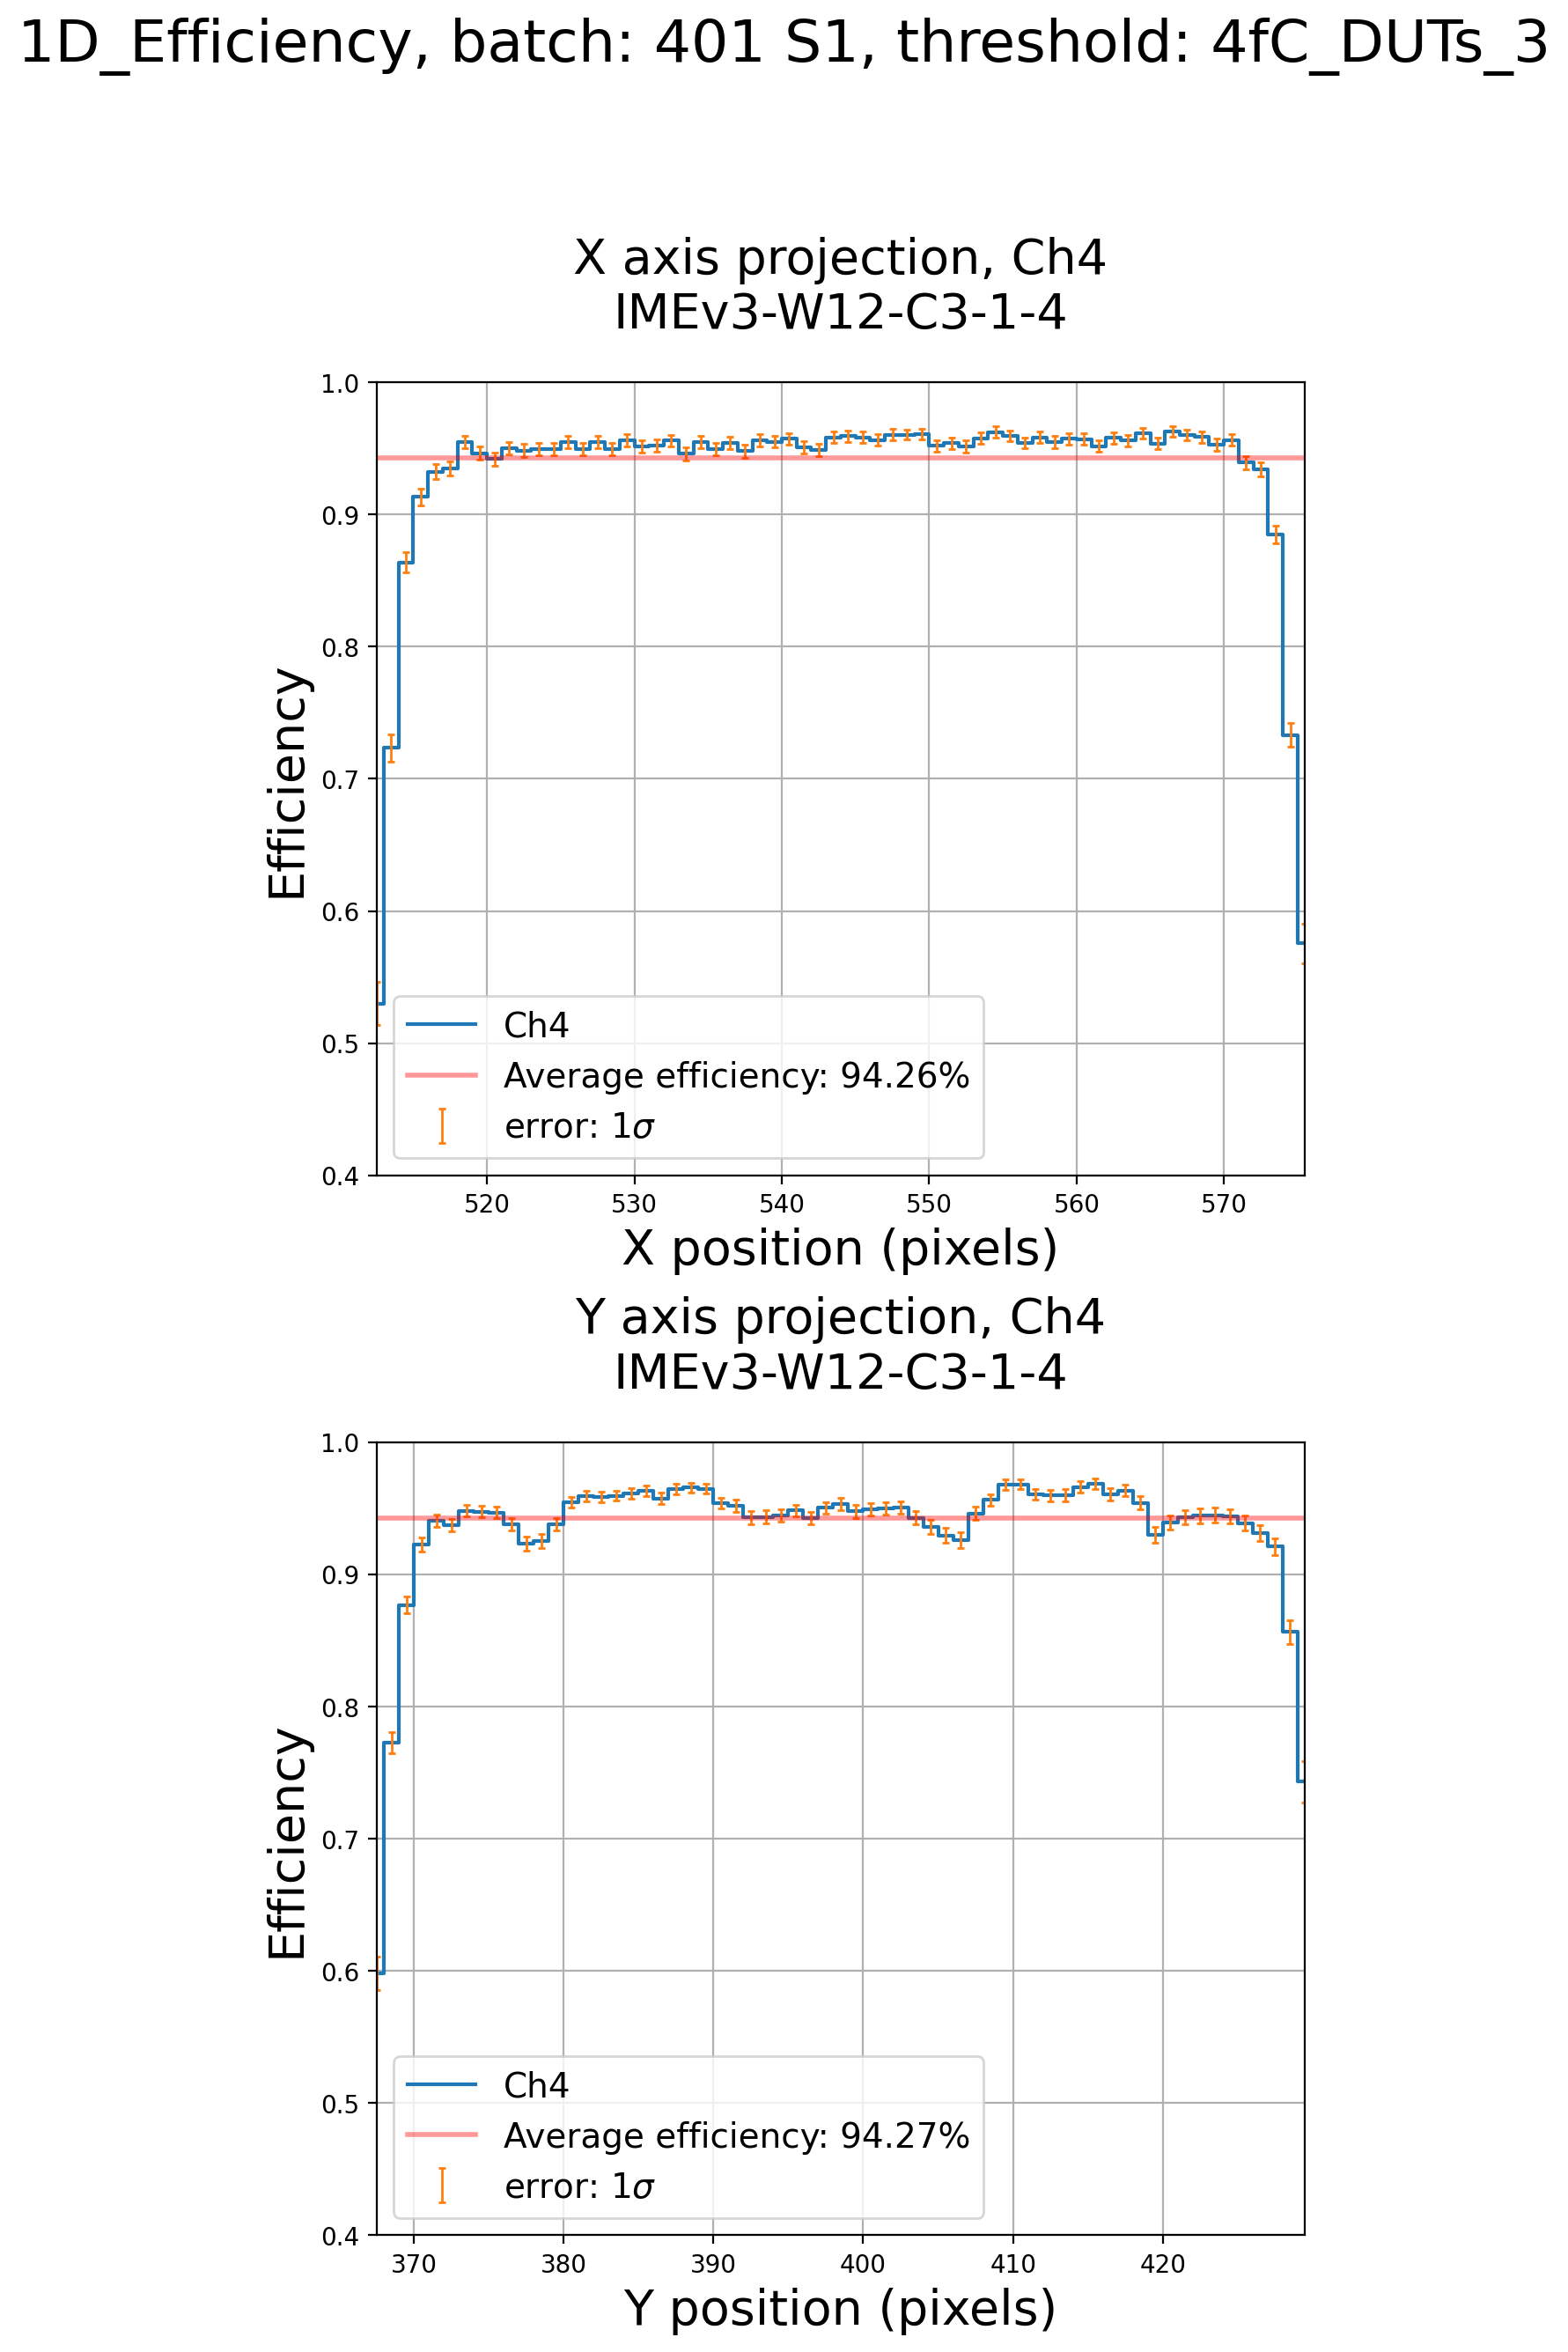

In [103]:
efficiency_limits = (0.4,1)
plot(df, "1D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, transimpedance=4700, geometry_cut='normal', zoom_to_sensor=True,
    bins=these_bins, efficiency_lim=efficiency_limits, n_DUT=DUTs, savefig=SAVE, savefig_details=f'{S}, threshold: {threshold_charge}fC_DUTs_{duts_string}',
    savefig_path=pres_path, fmt='png')
;

#### 1D projections of efficiency with time cut and central area cut

''

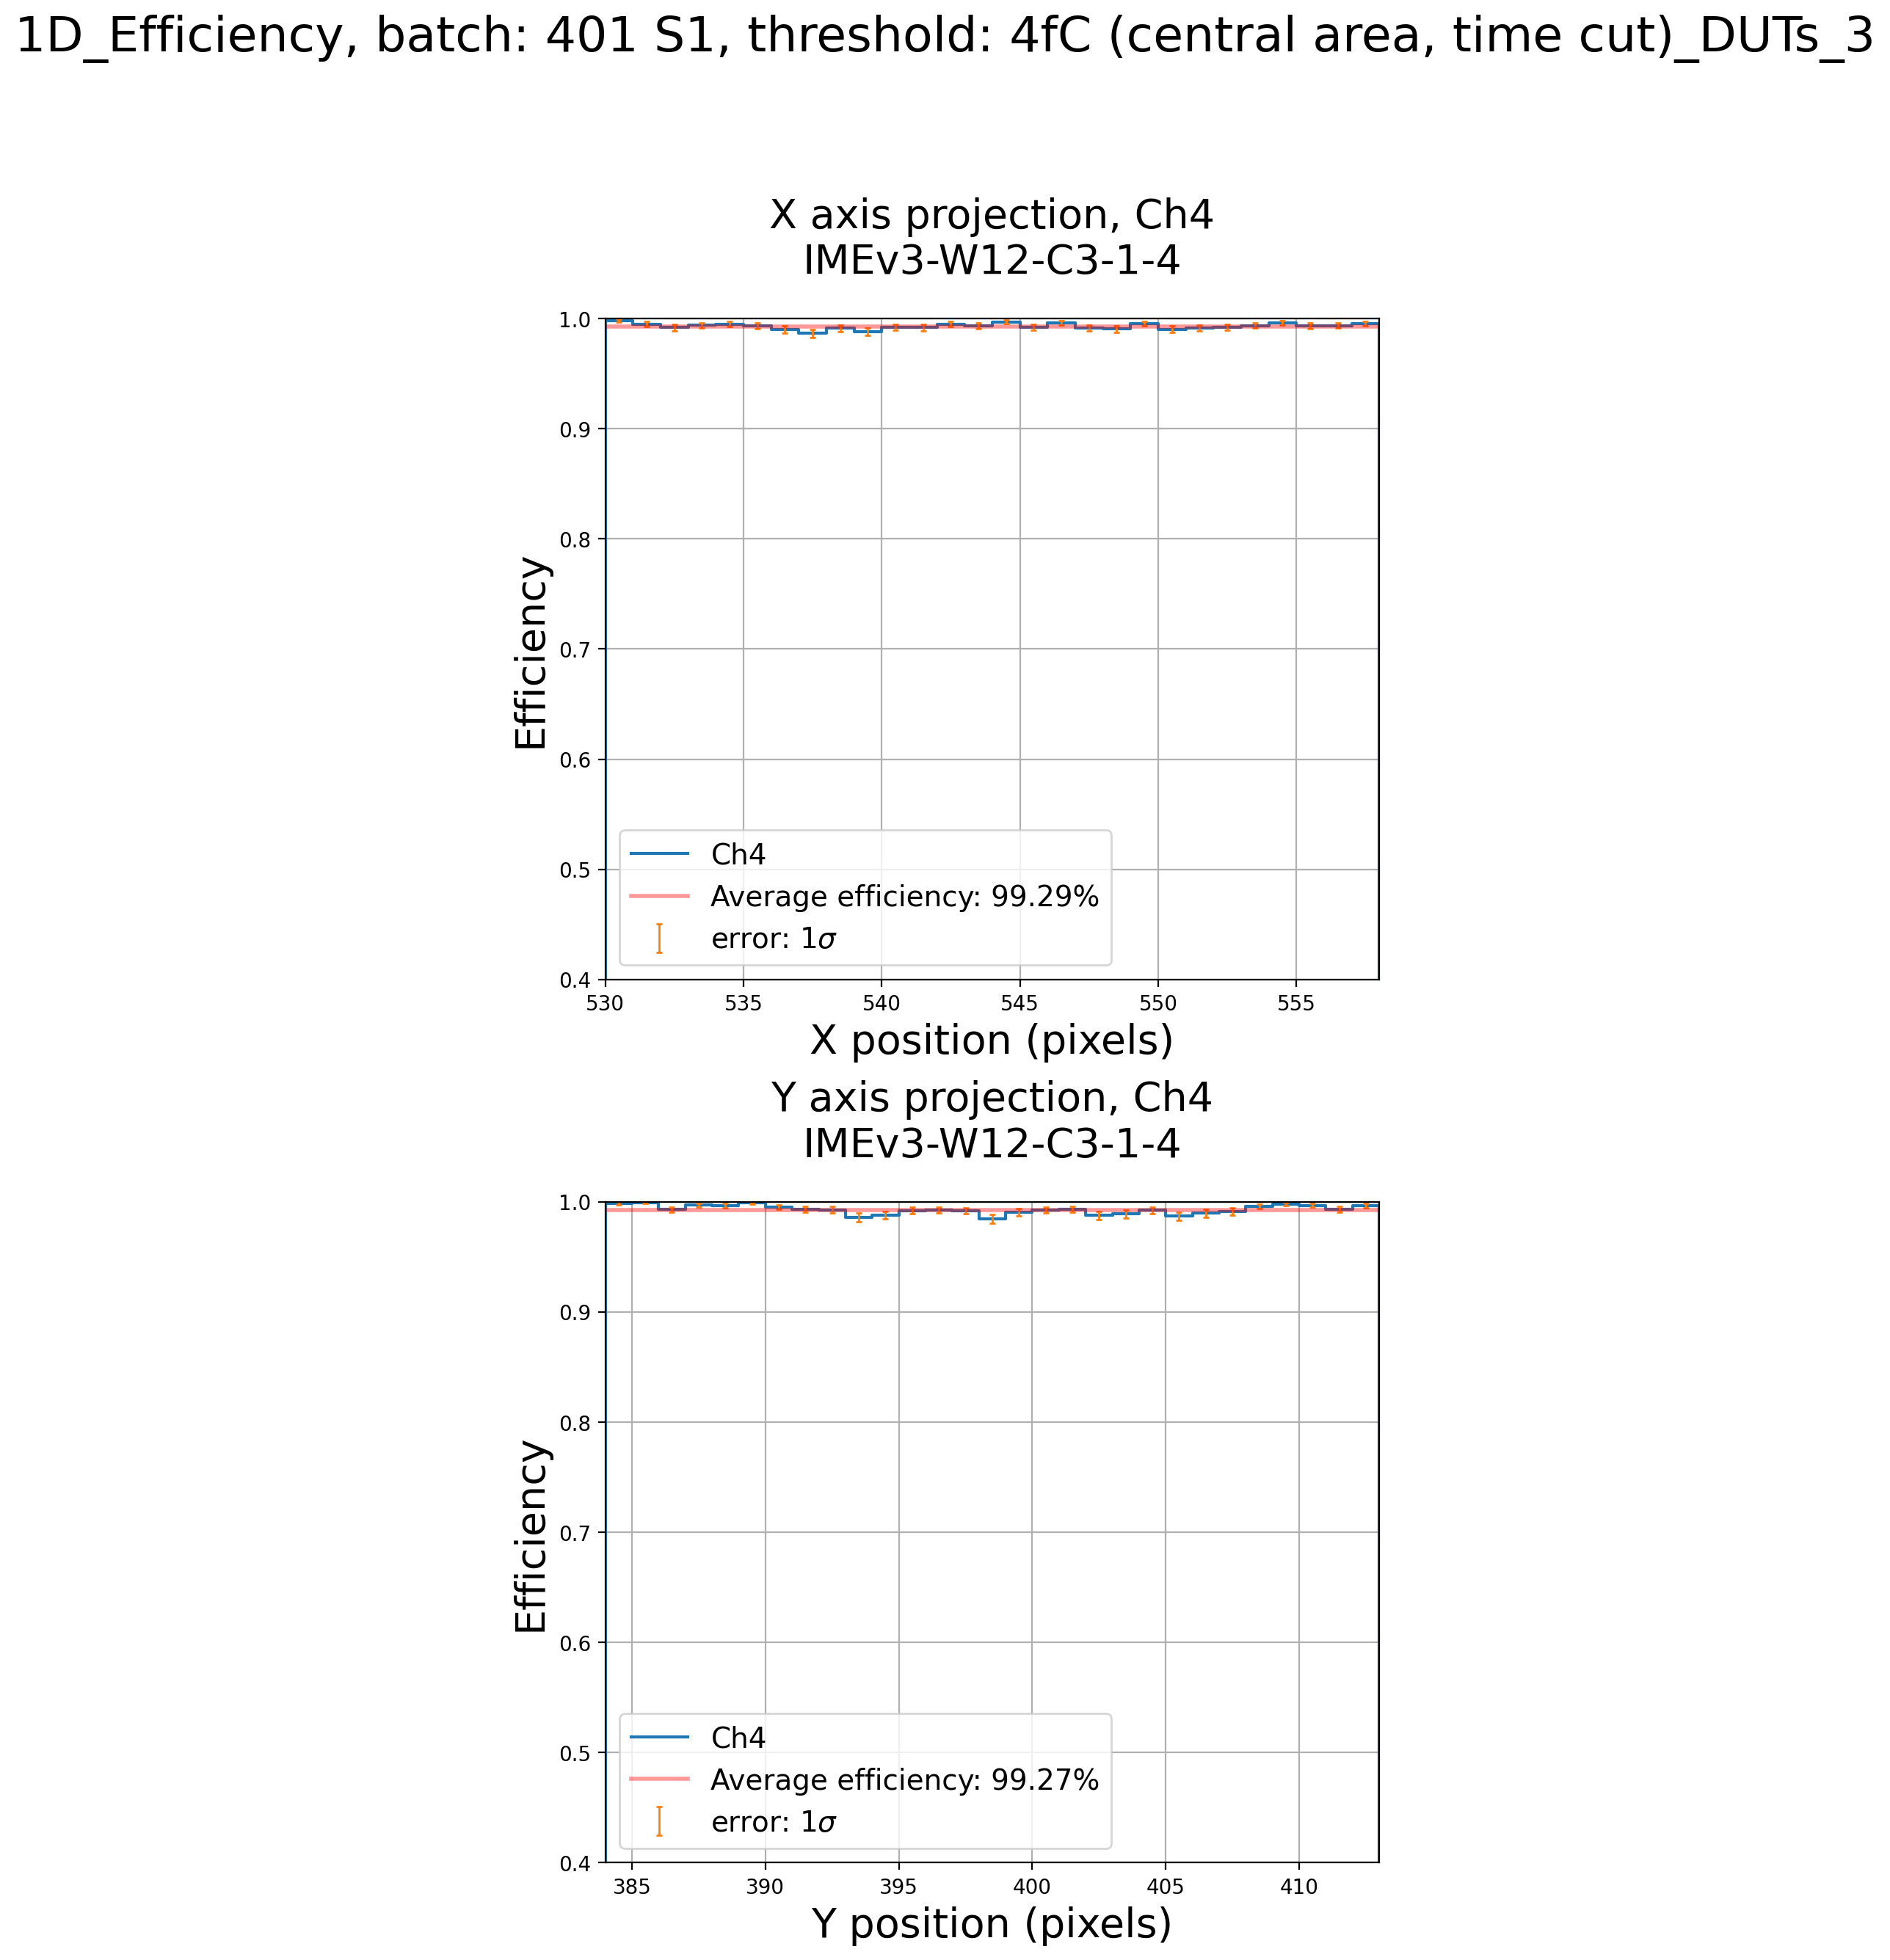

In [105]:

plot(df, "1D_Efficiency", dict_of_batches[this_batch], S, threshold_charge=threshold_charge, transimpedance=4700, geometry_cut='center', mask=time_cuts, zoom_to_sensor=True,
    bins=these_bins, efficiency_lim=efficiency_limits, n_DUT=DUTs, savefig=SAVE, savefig_details=f'{S}, threshold: {threshold_charge}fC (central area, time cut)_DUTs_{duts_string}',
    savefig_path=pres_path, fmt='png')
;

## Total efficiency

In [ ]:
# transimpedance = [dict_of_batches[this_batch].S[this_scope].get_sensor(f'ch{dut+1}').transimpedance for dut in [1,2,3]]
transimpedance = [4700]*3
threshold_range = np.arange(-5, 30, 0.5)

fig, axes = plt.subplots(figsize=(8*len(DUTs),6),ncols=len(DUTs), dpi=300)
axes = np.atleast_1d(axes)

for i,dut in enumerate(DUTs):
    efficiency_normal = []
    error_normal = []
    
    efficiency_center = []
    error_center = []
    
    efficiency_timecut = []
    error_timecut = []

    for charge in threshold_range:
        ### efficiency with geometry cut
        eff, err = efficiency_error(df[f"charge_{dut}"].loc[geo_cuts[dut-1]]/transimpedance[dut-1], charge)
        efficiency_normal.append(eff)
        error_normal.append(err)
        ### efficiency with geometry cut (center)
        eff, err = efficiency_error(df[f"charge_{dut}"].loc[central_sensor_area_cuts[dut-1]]/transimpedance[dut-1], charge)
        efficiency_center.append(eff)
        error_center.append(err)
        ### efficiency with time cut (HAVEN'T DONE IT YET)
        eff, err = efficiency_error(df[f"charge_{dut}"].loc[np.logical_and(central_sensor_area_cuts[dut-1], time_cuts[dut-1])]/transimpedance[dut-1], charge)
        efficiency_timecut.append(eff)
        error_timecut.append(err)
        
        if charge==4:
            eff_at_4fC = eff

    ### geometry cut
    axes[i].errorbar(threshold_range, efficiency_normal, yerr=error_normal, marker='.', markersize=3, linewidth=0,
                elinewidth=1, ecolor='k', capsize=1.5,
                label=f"Full surface")#, #tracks: {df[f'charge_{dut}'].loc[geometry].size}")
    ### geometry cut (center)
    axes[i].errorbar(threshold_range, efficiency_center, yerr=error_center, marker='.', markersize=3, linewidth=0,
                elinewidth=1, ecolor='k', capsize=1.5,
                label=f"Center")#, #tracks: {df[f'charge_{dut}'].loc[geometry].size}")
    ### time cut (center)
    axes[i].errorbar(threshold_range, efficiency_timecut, yerr=error_timecut, marker='.', markersize=3, linewidth=0,
                elinewidth=1, ecolor='k', capsize=1.5,
                label=f"Center (time cut)")#, #tracks: {df[f'charge_{dut}'].loc[geometry].size}")

    axes[i].set_title(f" Sensor: {dict_of_batches[this_batch].S[S].get_sensor(f'Ch{dut+1}').name}, batch {this_batch}",fontsize=16)
    axes[i].set_xlabel("Threshold charge (fC)",fontsize=16)
    axes[i].set_ylabel("Total efficiency",fontsize=16)
    axes[i].axhline(0.95, label="95% efficiency", color='r', alpha=0.4, linewidth=2)
    axes[i].axvline(4, label="4fC threshold", color='g', linewidth=1)
    axes[i].plot([],[], label="Efficiency at 4fC: %.2f"%(eff_at_4fC*100)+"%", linewidth=0)
    axes[i].grid('--')
    axes[i].legend(fontsize=16)
fig.suptitle(f"Efficiency depending on threshold charge",fontsize=20,y=1)

if SAVE:
    fig.savefig(os.path.join(pres_path,f"Efficiency depending on threshold charge batch {this_batch} {S}_DUTs_{duts_string}.png"), bbox_inches='tight')

In [ ]:

transimpedance = [4700]*3
threshold_range = np.arange(0, 30, 0.5)

fig, axes = plt.subplots(figsize=(8*len(DUTs),6),ncols=len(DUTs), dpi=300)
axes = np.atleast_1d(axes)

for i,dut in enumerate(DUTs):
    efficiency_center = []
    error_center = []
    for charge in threshold_range:
        ### efficiency with geometry cut (center) and time cut
        eff, err = efficiency_error(df[f"charge_{dut}"].loc[np.logical_and(central_sensor_area_cuts[dut-1], time_cuts[dut-1])]/transimpedance[dut-1], charge)
        efficiency_center.append(eff)
        error_center.append(err)
        
        if charge==4:
            eff_at_4fC = eff

    ### geometry cut (center)
    axes[i].errorbar(threshold_range, efficiency_center, yerr=error_center, marker='.', markersize=3, linewidth=0,
                elinewidth=1, ecolor='k', capsize=1.5,
                label=f"Center and time cut")#, #tracks: {df[f'charge_{dut}'].loc[geometry].size}")

    axes[i].set_title(f" Sensor: {dict_of_batches[this_batch].S[S].get_sensor(f'Ch{dut+1}').name}, batch {this_batch}",fontsize=16)
    axes[i].set_xlabel("Threshold charge (fC)",fontsize=16)
    axes[i].set_ylabel("Total efficiency",fontsize=16)
    axes[i].axhline(0.95, label="95% efficiency", color='r', alpha=0.4, linewidth=2)
    axes[i].axvline(4, label="4fC threshold", color='g', linewidth=1)
    axes[i].plot([],[], label="Efficiency at 4fC: %.2f"%(eff_at_4fC*100)+"%", linewidth=0)
    axes[i].grid('--')
    axes[i].set_ylim(0,1)
    axes[i].legend(fontsize=16)
    
fig.suptitle(f"Efficiency depending on threshold charge (w/ cuts)",fontsize=20,y=1)

if SAVE:
    fig.savefig(os.path.join(pres_path,f"Efficiency depending on threshold charge (with cuts) batch {this_batch} {S}_DUTs_{duts_string}.png"), bbox_inches='tight')

## Plotting both peaks and comparing
(maybe this part should be later)

parenthesis about the second/third peak in the $\Delta t$

In [ ]:
SAVE = False

In [ ]:
fig, axes = plt.subplots(figsize=(12,8),nrows=1, ncols=1, dpi=300)

# for dut in DUTs:
one_dut = 3
for dut in [one_dut]:
    window_limit = 20e3
    window_fit = np.logical_and((df[f"timeCFD20_{dut}"]-df["timeCFD50_0"])> -window_limit,
                               (df[f"timeCFD20_{dut}"]-df["timeCFD50_0"])< +window_limit)
    
    hist, my_bins,_,_,_ = plot_histogram((df[f"timeCFD20_{dut}"].loc[window_fit]-df["timeCFD50_0"].loc[window_fit]),
                                         bins=5000, color=colormap[dut], linewidth=1, alpha=0.7,
                                         fig_ax=(fig,axes))

    bins_centers = (my_bins[:-1]+my_bins[1:])/2
    initial_param = (np.max(hist),bins_centers[np.argmax(hist)],100,np.average(hist))
    param, covar = curve_fit(my_gauss, bins_centers, hist, p0=initial_param)#, sigma=hist**0.5, absolute_sigma=True)
#     print(f"Fit parameters: {param}")
    axes.plot(bins_centers, my_gauss(bins_centers,*param), color=colormap[dut])
    number_of_sigmas = 3
    left_base, right_base = param[1]-number_of_sigmas*param[2], param[1]+number_of_sigmas*param[2]

    ### add units to the parameters
    axes.plot([],[],color=colormap[dut], label="A: %.0f, $\mu$: %.0f, $\sigma$: %.0f, BG: %.0f" %(param[0],param[1], param[2], param[3])) # only two decimals

    ### this lines are just to visually find an interval on which to study interesting features
    
interesting_interval_1 = (left_base, right_base)
axes.axvspan(interesting_interval_1[0], interesting_interval_1[1], ymin=0, ymax=1, alpha=0.5, color='orange', label='First peak')

interesting_interval_2 = (-5250, -4250)
axes.axvspan(interesting_interval_2[0], interesting_interval_2[1], ymin=0, ymax=0.2, alpha=0.5, color='green', label='Second peak')

# interesting_interval_3 = (-4000, -3250)
# axes.axvspan(interesting_interval_3[0], interesting_interval_3[1], ymin=0, ymax=0.1, alpha=0.5, color='blue', label='Third peak')

axes.set_xlabel(f"$\Delta t$ [ps] (DUT - MCP)", fontsize=16)
axes.set_ylabel("Events", fontsize=16)

xlim = (-7e3,-2e3)
# xlim = (-10e3,0)
axes.set_xlim(xlim)
axes.legend(fontsize=16)

fig.suptitle(f"Time difference, two peaks \
\n Batch: {this_batch}, Oscilloscope: {S}, Ch{dut+1}",y=1, fontsize=20)

if SAVE:
    fig.savefig(os.path.join(pres_path, f"time_difference_{this_batch}_{S}_dut_{one_dut}_with_both_peaks_simple.png"), bbox_inches="tight")

In [ ]:
first_peak = [np.logical_and((df[f"timeCFD20_{dut}"]-df["timeCFD50_0"])> interesting_interval_1[0],
                               (df[f"timeCFD20_{dut}"]-df["timeCFD50_0"])< interesting_interval_1[1]) for dut in [1,2,3]]

fig, ax = plot(df,"2D_Tracks", dict_of_batches[this_batch], S, bins=these_bins, n_DUT=[one_dut], mask=first_peak,
                    savefig=False, savefig_path=pres_path, savefig_details=f" position of second peak",fmt='png')
fig.suptitle("Tracks of first peak", fontsize=24, y=1.05)

ax[0].add_patch(rectangle_from_geometry_cut(**geo_infos[one_dut-1]))

if SAVE:
    fig.savefig(os.path.join(pres_path, f"2D Tracks {this_batch}_{S}_dut_{one_dut}_with_first_peak.png"), bbox_inches="tight")


In [ ]:
second_peak = [np.logical_and((df[f"timeCFD20_{one_dut}"]-df["timeCFD50_0"])> interesting_interval_2[0],
                               (df[f"timeCFD20_{one_dut}"]-df["timeCFD50_0"])< interesting_interval_2[1]) for dut in [1,2,3]]

fig, ax = plot(df,"2D_Tracks", dict_of_batches[this_batch], S, bins=these_bins, n_DUT=[one_dut], mask=second_peak,
                    savefig=False, savefig_path=pres_path, savefig_details=f" position of second peak",fmt='png')
fig.suptitle("Tracks of second peak", fontsize=24, y=1.05)

ax[0].add_patch(rectangle_from_geometry_cut(**geo_infos[one_dut-1]))

if SAVE:
    fig.savefig(os.path.join(pres_path, f"2D Tracks {this_batch}_{S}_dut_{one_dut}_with_second_peak.png"), bbox_inches="tight")


In [ ]:
third_peak = [np.logical_and((df[f"timeCFD20_{one_dut}"]-df["timeCFD50_0"])> interesting_interval_3[0],
                               (df[f"timeCFD20_{one_dut}"]-df["timeCFD50_0"])< interesting_interval_3[1]) for dut in [1,2,3]]

fig, ax = plot(df,"2D_Tracks", dict_of_batches[this_batch], S, bins=these_bins, n_DUT=[one_dut], mask=third_peak,
                    savefig=False, savefig_path=pres_path, savefig_details=f" position of third peak",fmt='png')
fig.suptitle("Position of the third peak", fontsize=24, y=1.05)

ax[0].add_patch(rectangle_from_geometry_cut(**geo_infos[one_dut-1]))

if SAVE:
    fig.savefig(os.path.join(pres_path, f"2D Tracks {this_batch}_{S}_dut_{one_dut}_with_third_peak.png"), bbox_inches="tight")


## PulseHeight and charge of the second peak?
I don't understand how there is an event if there is no charge??

In [ ]:
# fig, ax = plot(df,"Charge", dict_of_batches[this_batch], S, bins=these_bins, n_DUT=[one_dut], mask=second_peak,
#                     savefig=False, savefig_path=pres_path, savefig_details=f" position of second peak",fmt='png')

_,my_bins,_,fig,ax = plot_histogram(df[f"pulseHeight_{one_dut}"],bins=1000)
plot_histogram(df[f"pulseHeight_{one_dut}"].loc[second_peak[one_dut-1]],fig_ax=(fig,ax), bins=my_bins)
plot_histogram(df[f"pulseHeight_{one_dut}"].loc[np.logical_and(
    df[f"pulseHeight_{one_dut}"]>10,second_peak[one_dut-1])],fig_ax=(fig,ax), bins=my_bins);

ax.semilogy()

In [ ]:
_,my_bins,_,fig,ax = plot_histogram(df[f"charge_{one_dut}"]/4700,bins=1000)
plot_histogram(df[f"charge_{one_dut}"].loc[second_peak[one_dut-1]]/4700,fig_ax=(fig,ax), bins=my_bins)
plot_histogram(df[f"charge_{one_dut}"].loc[np.logical_and(
    df[f"pulseHeight_{one_dut}"]>10,second_peak[one_dut-1])]/4700,fig_ax=(fig,ax), bins=my_bins);
ax.set_xlim(None,100)

ax.semilogy()

## Plots of the wide bottom of the gaussian  (!!)
I could also use this to find what is the collected charge of the particles that go thru the edge

In [ ]:
fig, axes = plt.subplots(figsize=(12,8),nrows=1, ncols=1, dpi=300)

for dut in [one_dut]:
    window_limit = 20e3
    window_fit = np.logical_and((df[f"timeCFD20_{dut}"]-df["timeCFD50_0"])> -window_limit,
                               (df[f"timeCFD20_{dut}"]-df["timeCFD50_0"])< +window_limit)
    
    hist, my_bins,_,_,_ = plot_histogram((df[f"timeCFD20_{dut}"].loc[window_fit]-df["timeCFD50_0"].loc[window_fit]),
                                         bins=5000, color=colormap[dut], linewidth=1, alpha=0.7,
                                         fig_ax=(fig,axes))

    bins_centers = (my_bins[:-1]+my_bins[1:])/2
    initial_param = (np.max(hist),bins_centers[np.argmax(hist)],100,np.average(hist))
    param, covar = curve_fit(my_gauss, bins_centers, hist, p0=initial_param)#, sigma=hist**0.5, absolute_sigma=True)
    axes.plot(bins_centers, my_gauss(bins_centers,*param), color=colormap[dut])
    
    number_of_sigmas = 3
    left_base, right_base = param[1]-number_of_sigmas*param[2], param[1]+number_of_sigmas*param[2]
#     axes.vlines(left_base, ymin=0, ymax=np.max(hist)/4, color=colormap[dut], linestyle='-.', label=f'{number_of_sigmas} $\sigma$ interval')
#     axes.vlines(right_base, ymin=0, ymax=np.max(hist)/4, color=colormap[dut], linestyle='-.')
#     ### add units to the parameters
    axes.plot([],[],color=colormap[dut], label="A: %.0f, $\mu$: %.0f, $\sigma$: %.0f, BG: %.0f" %(param[0],param[1], param[2], param[3])) # only two decimals

    ### this lines are just to visually find an interval on which to study interesting features
# interesting_interval = (-6700, -6350)
interesting_interval = (-6500, -6200)

axes.axvspan(*interesting_interval, ymin=0, ymax=0.3, alpha=0.5, color='blue', label='Selection for the wide gaussian base')

axes.set_xlabel(f"$\Delta t$ [ps] (DUT - MCP)", fontsize=16)
axes.set_ylabel("Events", fontsize=16)

xlim = (-7e3,-4e3)
# xlim = (-10e3,0)
axes.set_xlim(xlim)
axes.legend(fontsize=16)

fig.suptitle(f"Time difference wide gaussian base \
\n Batch: {this_batch}, Oscilloscope: {S}, Ch{dut+1}",y=1, fontsize=20)

if SAVE:
    fig.savefig(os.path.join(pres_path, f"time_difference_{this_batch}_{S}_dut_{one_dut}_with_wide gaussian_left.png"), bbox_inches="tight")

In [ ]:
wide_bottom = [np.logical_and((df[f"timeCFD20_{dut}"]-df["timeCFD50_0"])> interesting_interval[0],
                               (df[f"timeCFD20_{dut}"]-df["timeCFD50_0"])< interesting_interval[1]) for dut in [1,2,3]]


fig, ax = plot(df,"2D_Tracks", dict_of_batches[this_batch], S, bins=these_bins, n_DUT=[one_dut], mask=wide_bottom,
                    savefig=False, savefig_path=pres_path, savefig_details=f" positions of wide gaussian base_left", fmt='png')

fig.suptitle("Tracks of the wide gaussian base", fontsize=24, y=1.05)
ax[0].add_patch(rectangle_from_geometry_cut(**geo_infos[one_dut-1], alpha=.5))

# sensor_width = (geo_infos[one_dut-1]['right_edge']-geo_infos[one_dut-1]['left_edge'])*PIXEL_SIZE
# text = ax[0].text(x=geo_infos[one_dut-1]['left_edge'], y=geo_infos[one_dut-1]['top_edge']+10, s='%.2f mm'%sensor_width, color='white')
# text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])

# sensor_height = (geo_infos[one_dut-1]['top_edge']-geo_infos[one_dut-1]['bottom_edge'])*PIXEL_SIZE
# text = ax[0].text(x=geo_infos[one_dut-1]['left_edge']-20, y=geo_infos[one_dut-1]['bottom_edge'], s='%.2f mm'%sensor_height, color='white', rotation='vertical')
# text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])

if SAVE:
    fig.savefig(os.path.join(pres_path, f"2D Tracks {this_batch}_{S}_dut_{one_dut}_with_wide_gaussian_base_left.png"), bbox_inches="tight")


In [ ]:
### now same thing but right side, this one is not necessary because the
### RIGHT SIDE OF THE ASYMMETRY IS DUE TO THE CFD VALUES

In [ ]:
### NOW I SELECT AN AREA IN THE 2D SPACE OF TIME, PULSEHEIGHT TO BETTER FIND THE EDGES
fig, axes = plot(df, "Time_pulseHeight", dict_of_batches[this_batch], S, bins=time_bins, info=False, extra_info=False, title_position=1.0,
     n_DUT=[one_dut], savefig=SAVE, savefig_details=f'{S}', savefig_path=pres_path, fmt='png')
        ### X_left, X_right, Y_bottom, Y_top
select_area = (-8e3, -6.75e3, 60, 200)
axes[0].add_patch(rectangle_from_geometry_cut(*select_area, fill=False, color='r', linestyle='--'))
axes[0].set_xlim(-8e3,-4e3)
axes[0].set_ylim(-1,None)
axes[0].grid(False)

In [ ]:
### on the RIGHT side
### OLD ONE WITH DUT:CDF50 AND MCP:CFD20

select_area_time_cut = [np.logical_and((df[f"timeCFD20_{one_dut}"]-df["timeCFD50_0"])> select_area[0],
                               (df[f"timeCFD20_{one_dut}"]-df["timeCFD50_0"])< select_area[1]) for one_dut in [1,2,3]]

select_area_pulse_cut = [np.logical_and(df[f"pulseHeight_{one_dut}"]> select_area[2],
                               df[f"pulseHeight_{one_dut}"]< select_area[3]) for one_dut in [1,2,3]]

select_area_cut = [np.logical_and(select_area_time_cut[one_dut-1], select_area_pulse_cut[one_dut-1]) for one_dut in [1,2,3]]

fig, ax = plot(df,"2D_Tracks", dict_of_batches[this_batch], S, bins=these_bins, n_DUT=[one_dut], mask=select_area_cut,
                    savefig=SAVE, savefig_path=pres_path, savefig_details=f" positions of wide gaussian base_right", fmt='png')

fig.suptitle("Position of the wide gaussian base", fontsize=24, y=1.05)
ax[0].add_patch(rectangle_from_geometry_cut(**geo_infos[one_dut-1], alpha=.5))

#### Now plot the charge of these events

## $\Delta t$ vs pulseHeight plot

In [ ]:
### delta time vs pulseHeight with info
# SAVE = False
plot(df, "Time_pulseHeight", dict_of_batches[this_batch], S, bins=time_bins, extra_info=False,
     n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S}_DUTs_{duts_string}', savefig_path=pres_path, fmt='png')

In [ ]:
### delta time vs pulseHeight CENTRAL AREA OF SENSOR without info

plot(df, "Time_pulseHeight", dict_of_batches[this_batch], S, bins=time_bins, info=False, extra_info=False, mask=geo_cuts,
     n_DUT=DUTs, savefig=SAVE, savefig_details=f' {S} \n geometry cut_DUTs_{duts_string}', savefig_path=pres_path, fmt='png')


## Investigating clipped events

In [ ]:
fig,axes = plot(df, "Time_pulseHeight", dict_of_batches[this_batch], S, bins=10000, info=False, extra_info=False,
     n_DUT=[one_dut], savefig=SAVE, savefig_details=f' {S} \n geometry cut', savefig_path=pres_path, fmt='png')

select_area = (-6.4e3,-5.5e3,80,120)
select_area_time_cut = [np.logical_and((df[f"timeCFD20_{one_dut}"]-df["timeCFD50_0"])> select_area[0],
                               (df[f"timeCFD20_{one_dut}"]-df["timeCFD50_0"])< select_area[1]) for one_dut in [1,2,3]]

select_area_pulse_cut = [np.logical_and(df[f"pulseHeight_{one_dut}"]> select_area[2],
                               df[f"pulseHeight_{one_dut}"]< select_area[3]) for one_dut in [1,2,3]]

select_area_cut = [np.logical_and(select_area_time_cut[one_dut-1], select_area_pulse_cut[one_dut-1]) for one_dut in [1,2,3]]

# axes[0].set_ylim(0,430)
axes[0].add_patch(rectangle_from_geometry_cut(*select_area, fill=False, color='r', linestyle='--'))

# fig, ax = plot(df,"2D_Tracks", dict_of_batches[this_batch], S, bins=these_bins, n_DUT=[one_dut], mask=select_area_cut,
#                     savefig=SAVE, savefig_path=pres_path, savefig_details=f" positions of clipped events", fmt='png')

time_mask(df,one_dut, mask=select_area_cut[one_dut-1], bins=40, show_plot=True)


In [ ]:
fig,axes = plot(df, "Time_pulseHeight", dict_of_batches[this_batch], S, bins=10000, info=False, extra_info=False,
     n_DUT=[one_dut], savefig=SAVE, savefig_details=f' {S} \n geometry cut', savefig_path=pres_path, fmt='png')

select_area = (-6.4e3,-5.5e3,340,370)
select_area_time_cut = [np.logical_and((df[f"timeCFD20_{one_dut}"]-df["timeCFD50_0"])> select_area[0],
                               (df[f"timeCFD20_{one_dut}"]-df["timeCFD50_0"])< select_area[1]) for one_dut in [1,2,3]]

select_area_pulse_cut = [np.logical_and(df[f"pulseHeight_{one_dut}"]> select_area[2],
                               df[f"pulseHeight_{one_dut}"]< select_area[3]) for one_dut in [1,2,3]]

select_area_cut = [np.logical_and(select_area_time_cut[one_dut-1], select_area_pulse_cut[one_dut-1]) for one_dut in [1,2,3]]

axes[0].set_ylim(0,750)
axes[0].add_patch(rectangle_from_geometry_cut(*select_area, fill=False, color='r', linestyle='--'))

# fig, ax = plot(df,"2D_Tracks", dict_of_batches[this_batch], S, bins=these_bins, n_DUT=[one_dut], mask=select_area_cut,
#                     savefig=SAVE, savefig_path=pres_path, savefig_details=f" positions of clipped events", fmt='png')

time_mask(df,one_dut, mask=select_area_cut[one_dut-1], bins=40, show_plot=True)


# Noise

In [ ]:
noise_cuts = []  ### define a 'noise cut' as events with pulseheight 3x the noise
### does not seem to be super useful, initially at least
fig, ax = plt.subplots(figsize=(12,8))
for dut in [1,2,3]:
    if dut not in DUTs:
        noise_cuts.append(None)
        continue
    hist,my_bins,_,_,_ = plot_histogram(df[f'noise_{dut}'], fig_ax=(fig,ax), color=colormap[dut])
### I did a gaussian fit BEFORE but that was WRONG, I had to do:
### PEDESTAL + 3*NOISE
#     bins_centers = (my_bins[:-1]+my_bins[1:])/2
#     initial_param = (np.max(hist),bins_centers[np.argmax(hist)],2,np.average(hist))
#     param, covar = curve_fit(my_gauss, bins_centers, hist, p0=initial_param)#, sigma=hist**0.5, absolute_sigma=True)
#     ax.plot(bins_centers, my_gauss(bins_centers,*param), color=colormap[dut])
#     ax.plot([],[], color=colormap[dut], label="A: %.0f, $\mu$: %.2f, $\sigma$: %.2f, BG: %.0f" %(param[0],param[1], param[2], param[3])) # only two decimals
#     noise_cuts.append(df[f'pulseHeight_{dut}']<(df[f'pedestal_{dut}']+3*df[f'noise_{dut}']))
### this finds events with pulse>min but with pulse<pedestal+3*noise
    noise_cuts.append(np.logical_and(pulse_cuts_temp[dut-1], np.logical_not(pulse_noise_cuts[dut-1])))

ax.set_xlim(0,10)
ax.legend()
# ax.semilogy()

In [ ]:
plot(df,"2D_Tracks", dict_of_batches[this_batch], S, bins=these_bins, mask=noise_cuts,
     n_DUT=DUTs, savefig=SAVE, savefig_details=f'{S} (noise cuts)_DUTs_{duts_string}', savefig_path=pres_path, fmt='png')

### Studying what events cause the peak of noise below zero, CHARGE

In [ ]:
df[f'charge_{dut}'].loc[all_cuts[dut-1]]

In [ ]:
### Noisy charge without cuts

noise_charge = [np.logical_and(df[f'charge_{dut}']/
                dict_of_batches[this_batch].S[S].get_sensor(f'Ch_{dut+1}').transimpedance > interesting_interval[0],
                               df[f'charge_{dut}']/
                dict_of_batches[this_batch].S[S].get_sensor(f'Ch_{dut+1}').transimpedance < interesting_interval[1])
                for dut in [1,2,3]]

fig, ax = plot(df,"2D_Tracks", dict_of_batches[this_batch], S, bins=these_bins, n_DUT=[1,2,3], mask=noise_charge,
                    savefig=SAVE, savefig_path=pres_path, savefig_details=f" tracks of charge noise peak_DUTs_{duts_string}", fmt='png')

fig.suptitle("Tracks of the charge noise peak", fontsize=24, y=1.05)


#### Time Resolution
???? duplicate 

In [ ]:
# fig, axes = plt.subplots(figsize=(12,8),nrows=1, ncols=1, dpi=300)
# # pulse_geo_cuts = [np.logical_and(geo_cuts[dut-1], pulse_cuts[dut-1]) for dut in DUTs]

# for dut in DUTs:
#     window_limit = 20e3
#     window_fit = np.logical_and((df[f"timeCFD20_{dut}"]-df["timeCFD50_0"])> -window_limit,
#                                (df[f"timeCFD20_{dut}"]-df["timeCFD50_0"])< +window_limit)
# #     dut_cut = np.logical_and(window_fit, all_cuts[dut-1])
# #     dut_cut = np.logical_and(window_fit, np.logical_and(pulse_cuts[dut-1],geo_cuts[dut-1]))

# ### ONLY EVENTS WITH CHARGE OVER THE THRESHOLD CHARGE
#     dut_cut = np.logical_and(df[f"charge_{dut}"]>threshold_charge,
#                              np.logical_and(window_fit, np.logical_and(pulse_cuts[dut-1], geo_cuts[dut-1])))
        
#     hist, my_bins,_,_,_ = plot_histogram((df[f"timeCFD20_{dut}"].loc[dut_cut]-df["timeCFD50_0"].loc[dut_cut]),
#                                          bins='auto', color='k', linewidth=1, alpha=1,
#                                          fig_ax=(fig,axes))

#     bins_centers = (my_bins[:-1]+my_bins[1:])/2
#     initial_param = (np.max(hist), bins_centers[np.argmax(hist)], 100, np.average(hist))
#     param, covar = curve_fit(my_gauss, bins_centers, hist, p0=initial_param)#, sigma=hist**0.5, absolute_sigma=True)
# #     print(f"Fit parameters: {param}"
#     axes.plot(bins_centers, my_gauss(bins_centers,*param), color=colormap[dut])

#     ### add units to the parameters
#     axes.plot([],[], label="A: %.0f" %param[0], color=colormap[dut]) # only two decimals
#     axes.plot([],[],linewidth=0, label="$\mu$: %.1f $\pm$ %.1f"%(param[1],covar[1,1]**0.5))
#     axes.plot([],[],linewidth=0, label="$\sigma$: %.1f $\pm$ %.1f"%(param[2],covar[2,2]**0.5))
#     axes.plot([],[],linewidth=0, label="BG: %.1f $\pm$ %.1f"%(param[3],covar[3,3]**0.5))
#     ### maybe I should just make the chi² into a function
#     chi2_reduced = sum((hist-my_gauss(bins_centers,*param))**2/my_gauss(bins_centers,*param))/(len(hist)-len(param))
#     axes.plot([],[],linewidth=0, label="$\chi^2$ reduced: "+f"%.1f"%chi2_reduced)
# #     skewness = skew(df[f"timeCFD20_{dut}"].loc[dut_cut]-df["timeCFD50_0"].loc[dut_cut])
# #     axes.plot([],[],linewidth=0, label=f"skewness: {skewness}")
    
# axes.set_xlabel(f"$\Delta t$ [ps]", fontsize=16)
# axes.set_ylabel("Events", fontsize=16)

# xlim = (-7e3,-5e3)
# # xlim = (-10e3,0)
# axes.set_xlim(xlim)
# axes.legend(fontsize=16)

# fig.suptitle(f"Time resolution fit, after applying cuts \
# \n Batch: {this_batch}, Oscilloscope: {S}, Ch{dut+1}",y=1, fontsize=20)

# if SAVE:
#     fig.savefig(os.path.join(pres_path, f"time_resolution_{this_batch}_{S}_zoomed_and_gauss_fit_with_cuts.png"), bbox_inches="tight")

 ### Testing different CFD thresholds
 
 This is giving different results than the normal fit, I may have to check why

In [ ]:
CFD_values = (20, 50,70)
axes_size = len(CFD_values)

MCP_resolution = 36.52

# dut = 2
# window_limit = 20e3

# CFD_mask = [np.logical_and(charge_cuts[dut-1], geo_cuts[dut-1]) if dut in DUTs else None for dut in [1,2,3]]
CFD_mask = [np.logical_and(pulse_cuts[dut-1], central_sensor_area_cuts[dut-1]) if dut in DUTs else None for dut in [1,2,3]]

### ONLY EVENTS WITH CHARGE OVER THE THRESHOLD CHARGE
dut_cut = [np.logical_and(df[f"charge_{dut}"]>threshold_charge,
                       central_sensor_area_cuts[dut-1])
           if dut in DUTs else None for dut in [1,2,3]]
    
for dut in DUTs:
    plot(df, 'CFD_comparison', dict_of_batches[this_batch], S, n_DUT=dut, CFD_values=CFD_values, mask=dut_cut,
         savefig=SAVE, savefig_path=pres_path);


In [ ]:
time_resolution_table = np.array(time_resolution_table).reshape(axes_size,axes_size)
chi2_table = np.array(chi2_table).reshape(axes_size,axes_size)

print(time_resolution_table)
print(chi2_table)

# Investigating the horizontal lines, e.g. batch 401, S2, dut 2
This part needs fixing

In [ ]:
geometry_cut, info = geometry_mask(df, DUT_number=2, bins=these_bins, bins_find_min='rice', only_select='normal', use='pulseheight')

In [ ]:
### define the area to analize the line and compare it with a small area just above it
bottom_line, top_line = 255, 256
bottom_above, top_above = 262,263

line_cut = np.logical_and(df['Ytr_1']>=bottom_line, df['Ytr_1']<=top_line)
above_line_cut = np.logical_and(df['Ytr_1']>=bottom_above, df['Ytr_1']<=top_above)

tot_cut = np.logical_and(geometry_cut,line_cut),
tot_cut2 = np.logical_and(geometry_cut,above_line_cut)

info.update({'bottom_edge':bottom_line, 'top_edge':top_line})
info_above = info.copy()
info_above.update({'bottom_edge':bottom_above, 'top_edge':top_above})

In [ ]:

fig, axes = plot(df,"2D_Tracks", dict_of_batches[this_batch], S, bins=these_bins, n_DUT=[2],# mask=tot_cut,
                    savefig=SAVE, savefig_path=pres_path, savefig_details=f" position of the line",fmt='png')
fig.suptitle("Investigating horizontal 'lines'", fontsize=24, y=1.05, ha='center')
axes[0].add_patch(rectangle_from_geometry_cut(**info, lw=0.5))
axes[0].add_patch(rectangle_from_geometry_cut(**info_above, lw=0.5, ec='b'))

fig.savefig(os.path.join(pres_path, "2D Tracks, Horizontal lines.png"), bbox_inches="tight")


 ### Plotting the *time vs pulseheight* density

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(16,9), subplot_kw={'projection':'scatter_density'})

plot(df, "Time_pulseHeight", dict_of_batches[this_batch], S, bins=10000, mask=3*[tot_cut],
     n_DUT=[2], savefig=SAVE, savefig_details=f' {S} investigating line', savefig_path=pres_path, fmt='png', extra_info=True,
    fig_ax=(fig,axes[0]))

plot(df, "Time_pulseHeight", dict_of_batches[this_batch], S, bins=10000, mask=3*[tot_cut2],
     n_DUT=[2], savefig=SAVE, savefig_details=f' {S} investigating line', savefig_path=pres_path, fmt='png', extra_info=True,
    fig_ax=(fig,axes[1]))

axes[0].set_title("On the line", fontsize=20)
axes[1].set_title("Above the line", fontsize=20)


# axes[0].legend(fontsize=16, loc='best', framealpha=0)
# axes[1].legend(fontsize=16, loc='best', framealpha=0)

fig.savefig(os.path.join(pres_path, "Time_vs_pulseheight density, horizontal lines.png"), bbox_inches="tight")


 ### Plotting the *pulseHeight* 

In [ ]:
DUTs = [2]
dut = 2
fig, ax = plt.subplots(figsize=(16,9), ncols=1, dpi=300)

transimpedance = dict_of_batches[this_batch].S[S].get_sensor(f'Ch_{dut+1}').transimpedance 

hist,my_bins,_,_,_ = plot_histogram(df[f'charge_{dut}'].loc[tot_cut]/transimpedance, bins=500,
                                      color='r', label=f"charge on the line",
                                      fig_ax=(fig,ax))

hist,my_bins,_,_,_ = plot_histogram(df[f'charge_{dut}'].loc[tot_cut2]/transimpedance, bins=my_bins,
                                      color='b', label=f"charge above the line",
                                      fig_ax=(fig,ax))
ax.semilogy()
ax.set_xlim(-10, 100)
ax.legend(fontsize=20)
fig.suptitle("Charge distribution, comparing on the line and above", fontsize=24)

fig.savefig(os.path.join(pres_path, "Charge, Horizontal lines.png"), bbox_inches="tight")


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6), dpi=200)

hist, my_bins,_,_,_ = plot_histogram(df[f'pulseHeight_{dut}'].loc[tot_cut], bins=200,
                                     color='r', label='On the line', fig_ax=(fig,ax))
hist, _,_,_,_ = plot_histogram(df[f'pulseHeight_{dut}'].loc[tot_cut2], bins=my_bins,
                               color='b', label='Above the line', fig_ax=(fig,ax))
ax.legend(fontsize=20)
# plot(df.loc[tot_cut], "pulseHeight", dict_of_batches[this_batch], S, bins=200,
#      n_DUT=[2], savefig=SAVE, savefig_details=f' {S} investigating line', savefig_path=pres_path, fmt='png', extra_info=True,
#     fig_ax=(fig,ax))
fig.suptitle("PulseHeight distribution, comparing on the line and above", fontsize=24)

fig.savefig(os.path.join(pres_path, "PulseHeight, Horizontal lines.png"), bbox_inches="tight")


# WAVEFORM

## LeCroy Oscilloscope .trc parser

In [ ]:
import numpy as np # NumPy
import matplotlib.pylab as plt # Matplotlib plots
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from LoadBatch import *
from SensorClasses import *
import lecroyparser


### time stamp:1685233458 (for run 9620)
trc_file_path = "/home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/Data_TestBeam/2023_May/Oscilloscope_raw_1/C2WF00000.trc"
trc_file_path2 = "/home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/Data_TestBeam/2023_May/Oscilloscope_raw_1/data_1685454190/C2WF00000.trc"

pres_path = '/home/marcello/Desktop/Radboud_not_synchro/Master_Thesis/Thesis/Methods_plots/'

data = lecroyparser.ScopeData(trc_file_path)

data.__dict__.keys()

In [ ]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

In [ ]:
# CFD_idx = np.argmax(data.y[one_point+left_edge:one_point+right_edge]>pulseHeight_max*0.7)

# data.x[one_point+left_edge:one_point+right_edge][CFD_idx]

## Waveform plot

In [ ]:
colormap = ['k','b','g','r']

In [ ]:
# one_point = 13000
# left_edge = 150
# right_edge = 250

left_x = 1.16e-06 #1.16e-6
window = 1e-8
window_cut = np.logical_and(data.x>left_x, data.x<(left_x+window))
after_pulse_cut = np.logical_and(data.x>left_x+(window/2), data.x<(left_x+window))

### data cut to the windows (and multiplied by units values)
time_w_cut = (data.x[window_cut] - left_x)*1e9
voltage_w_cut = data.y[window_cut]*1e3 # to make it mV

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(time_w_cut, voltage_w_cut,
       'k', linewidth=2)
pulseHeight_max = np.max(voltage_w_cut)
pulseHeight_max_x = time_w_cut[np.argmax(voltage_w_cut)]

for i,CFD_value in enumerate((20,50,70)): ### find the first point where the pulse becomes higher the the CFD%
    idx = np.argmax(voltage_w_cut>pulseHeight_max*CFD_value/100)
    ### time of arrival lines
    ax.vlines(time_w_cut[idx],0,voltage_w_cut[idx],
             color=colormap[i+1], linestyle='--', label=f'Time of Arrival CFD{CFD_value}%')
    ### horizontal CFD lines
    ax.hlines(voltage_w_cut[idx], time_w_cut[0], time_w_cut[idx],
             color=colormap[i+1])
    ### CFD dot
    ax.plot(time_w_cut[idx], voltage_w_cut[idx],
        'o', markersize=10, color=colormap[i+1])

### pulseHeight
ax.hlines(pulseHeight_max, time_w_cut[0], pulseHeight_max_x,
          color='k', label=f"PulseHeight: %.2f mV"%(pulseHeight_max))
ax.plot(pulseHeight_max_x, pulseHeight_max, 'o', markersize=10, color='k')
### pedestal
pedestal = np.average(data.y[after_pulse_cut])*1e3
ax.axhline(pedestal, color='red', linewidth=3, linestyle="-.", label=f"Pedestal: %.2f mV"%(pedestal))
### noise 
noise = np.std(data.y[after_pulse_cut])*1e3
noise_high = ax.axhline(pedestal+noise, color='orange', linewidth=1.5, label=f"Noise: %.2f mV"%(noise))
noise_low =  ax.axhline(pedestal-noise, color='orange', linewidth=1.5)
ax.fill_between(time_w_cut, pedestal+noise, pedestal-noise,
                alpha=1, color='gold')      
ax.set_xlabel('Time [ns]', fontsize=20)
ax.set_ylabel('Voltage [mV]', fontsize=20)
### charge
charge_value = np.trapz(y=(voltage_w_cut-pedestal),x=time_w_cut)/4700 * (1e15 /1e3 /1e9) # fC
ax.fill_between(time_w_cut, voltage_w_cut, pedestal,
               alpha=0.5, color='royalblue', label=f"Charge: %.2f fC"%charge_value)



ax.legend(fontsize=20)
# ax.set_title('Waveform', fontsize=18)
fig.savefig(os.path.join(pres_path, "Waveform of particle, channel2, with CFD (ns).png"), bbox_inches="tight")


In [ ]:
### looking at single runs 
S_run = 'S1'
dir_path = f"../Data_TestBeam/2023_May/{S_run}/"
run = 9620
## 

if run>9999:    file_path = f"tree0{run}.root"
elif run<=9999: file_path = f"tree00{run}.root"

### branches to be loaded (+ unnecessary columns)
branches = ["eventNumber", "Xtr", "Ytr", "pulseHeight", "charge", "noise", "pedestal", "triggerOffset", "timeCFD20", "timeCFD50", "timeCFD70"]
columns_to_remove = ["Xtr_3","Xtr_4","Xtr_5","Xtr_6","Xtr_7","Ytr_3","Ytr_4","Ytr_5","Ytr_6","Ytr_7"]

try:
    df_run = root_to_df(os.path.join(dir_path, file_path), branches)
except FileNotFoundError:
    logging.error("Batch file not found")

df_run = root_to_df(os.path.join(dir_path, file_path), branches)
df_run = df_run.drop(columns=columns_to_remove)

DUTs = [1]
use_for_geometry_cut = "pulseheight"
# plot(df_run,"2D_Sensors", dict_of_batches[401], this_scope='S1', bins=large_bins,
#     savefig=False, savefig_details=f"_single_run_{run}")
# plot(df["S2"],"2D_Tracks", batch=this_batch, sensors=sensors_list[this_batch]["S2"], bins=bins)

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))

hist, my_bins, _ = ax.hist(df_run['pedestal_1'], bins=1000,
                           label=f"pedestal: {np.mean(df['pedestal_1'])}");
bins_centers = (my_bins[:-1]+my_bins[1:])/2
max_value = bins_centers[np.argmax(hist)]
ax.axvline(max_value, color='k', label=f"pedestal hist max: {max_value}")

hist, my_bins, _ = ax.hist(df_run['noise_1'], bins=1000,
                           label=f"noise: {np.mean(df['noise_1'])}");
bins_centers = (my_bins[:-1]+my_bins[1:])/2
max_value = bins_centers[np.argmax(hist)]
ax.axvline(max_value, color='k', label=f"noise hist max: {max_value}")
ax.set_xlim(0,10)
ax.legend()

In [ ]:
plt.plot(data.x,data.y)

In [ ]:
print(data.x[1]*1e9, data.x[-1]*1e9)

In [ ]:
plt.plot(df_run["triggerOffset_1"]*1e12+df_run["timeCFD20_1"])
# plt.xlim(900,1000)

In [ ]:
plt.plot(df_run["timeCFD20_1"])

In [ ]:
plt.plot(df_run["triggerOffset_1"]*1e12)

In [ ]:
# print(df_run["timeCFD20_1"].size)
# plot_histogram(df_run["timeCFD20_1"], bins=1000)
# plt.plot(range(df_run["timeCFD20_1"].size), np.array(df_run["timeCFD20_1"].sort_values()))
plot_histogram(np.diff(df_run["timeCFD20_1"].sort_values())[np.diff(df_run["timeCFD20_1"].sort_values())<10]);

## Investigating the clipping in PulseHeight

In [ ]:
fig,axes = plot(df_run,"Time_pulseHeight",dict_of_batches[401],"S1", n_DUT=[3],info=False, extra_info=False)
axes[0].set_ylim(0,430)
axes[0].add_patch(Rectangle((-6.4e3,340),700,30, color='r', fill=False))

fig.savefig(os.path.join(pres_path, "Time_vs_PulseHeight_investigating_clipping.png"), bbox_inches="tight")


In [ ]:
# time_data_cut = df_run["timeCFD50_0"].loc[all_cuts[0]]-df_run["timeCFD20_1"].loc[all_cuts[0]]
# time_data_cut


In [ ]:
fig, ax = plt.subplots(figsize=(16,9))
event_number = 1211

left_x, right_x = 1.1205e-5,1.122e-5
window_cut = np.logical_and(data.x>left_x, data.x<right_x)

time_w_cut = (data.x[window_cut]-left_x)*1e9
voltage_w_cut = data.y[window_cut]*1e3 # to make it mV

ax.plot(time_w_cut, voltage_w_cut, 'k', linewidth=2)

# ax.set_xlim(left_x, right_x)
# ax.set_xlim(time_data_cut.iloc[0]/1e9,time_data_cut.iloc[len(time_data_cut)//100]/1e9 + 500/1e9)
noise = np.average(data.y)*1e3
np.trapz(y=data.y[window_cut]-noise, x=data.x[integral_filter]) * 10**15 / 4700

ax.set_xlabel('Time [ns]', fontsize=20)
ax.set_ylabel('Voltage [mV]', fontsize=20)
ax.grid('--')

fig.savefig(os.path.join(pres_path, "Waveform of clipped pulse (ns).png"), bbox_inches="tight")


In [ ]:
data.x[-1]- data.x[0]

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))
event_number = 1211
ax.plot(data.x, data.y, 'k', linewidth=2)
left_x = 1.5005e-4
window = 2e-8
ax.set_xlim(left_x, left_x+window)

integral_filter = np.logical_and(data.x > left_x, data.x < (left_x+window))
np.trapz(y=data.y[integral_filter]-np.average(data.y), x=data.x[integral_filter])/4700 * 10**15

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))
event_number = 1211
ax.plot(data.x, data.y, 'k', linewidth=2)
left_x = 1.5005e-4
window = 2e-8
# ax.set_xlim(left_x, left_x+window)

integral_filter = np.logical_and(data.x > left_x, data.x < (left_x+window))
np.trapz(y=data.y[integral_filter]-np.average(data.y), x=data.x[integral_filter])/4700 * 10**15